# Brief Project

Brief project Statistics for Business / Applied Statistics: https://drive.google.com/file/d/1y-03jjrmBQfdzpOh4KnxFjonT0QX1xCo/view

# Problems, Context, Goal and Objective

<!-- # Notes
All of this things is on cusmoter side -->

## Problems and context
In these days, people usually prefer the online cabs because of the convenience and the fares that's already stated before you order. But, when you're not with your phone, taxis could help you if you need one. The problem is, the fare of using taxis could be caused by many things and we want to know what variable correlate with the fare of Taxi in New York City and predict it. After knowing it, we can make a recommendation to people that interest in using Taxis in what condition is the best to use Taxi in New York City.

> ### About Yellow Cabs
Getting into a taxi in an unfamiliar city can be nerve-wracking. You have no idea how much the trip should cost or if the driver is taking the most direct route. In New York City, taxi riders cannot get an advance estimate for taxi fares. The NYC Taxi and Limousine Commission’s official stance is that “it is impossible to pre-calculate a fare because the meter rate depends on traffic, construction, weather, and route to the destination.”
Yellow cabs accept street hails anywhere in New York City. Green Boro Taxis, which operate in the outer boroughs and parts of Manhattan north of certain streets, can either be prearranged or hailed on the street.
- Source: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc/data

> ### Difference between Taxis and Uber Pricing
- Surge Pricing
  - Taxis do not have surge pricing, but riders might have to wait longer when demand exceeds supply. Taxis do, however, add a \$0.50 surcharge in the evening (8:00 p.m. to 6:00 a.m.) and a \$1 surcharge during rush hour (4:00 p.m. to 8:00 p.m.), Monday through Friday.
  - If Uber’s surge pricing is in effect, you will probably pay a lot less by taking a cab, if you can get one. Surge pricing will at least double your usual fare, and Uber has reported charging customers as much as \$39 per mile.
- Trip to Airport
  - A New York City councilman introduced a bill in January 2015 proposing to limit surge pricing to twice the usual rate. Yellow cabs have regulated fares to and from the Newark International and John F. Kennedy International airports. For trips between Newark International Airport and New York City, the price is the regular metered fare, plus a \$17.50 surcharge, plus tolls. For trips between John F. Kennedy International Airport and Manhattan, it is a flat fare of $52 plus tolls. The regular metered fare applies to all trips to and from LaGuardia International Airport.
- Source: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc/data

## Goals & Objective
Goal and Objective For this project are, we will:
- Understand Data, Data Cleaning and Data Manipulation.
- Exploratory Data Analysis (EDA).
  - EDA Variable.
  - EDA Variable Numerical with Numerical and Categorical with Numerical.
  - EDA Multi Variable.
- Using a statistical test to identify significance differences in one variable value from two groups. We want to test:
  - Test if people that using NYC Taxi has different mean/average fare between Ratecode 1 and Ratecode 5
  - Test if people that using NYC with Ratecode 1 has different mean/average fare between trip in Rush Hour and Trip in not Rush Hour
  - Test if the Average of Fare from Ratecode 1 has difference in Over Night and in Rush Hour
  - Test if the Average of Fare from Ratecode 2 (Trip to JFK) has difference in Over Night and in Rush Hour
- Create Linear Regression to know how much variables correlate to the fare in taxi. Then, predict the fare of taxis.
  - Outcome of Linear regression model is total_amount (Fare of NYC Taxi). Predictors for linear regression model are trip_distance, extra, tolls_amount, RatecodeID
  - Evaluate the models with R square, cross validation, and look at the visualization of residual plot and predicted values.
- Create Conclusions.
  - Using EDA, create a recommendation which condition suits to use NYC Taxi.
  - Using linear regression model, create a simulation between variable which condition is the best to use NYC Taxi.

<!-- For this project, we want to make a statistical test and linear regression to know what variable correlate with high and down of the fares, then we can predict accurate fare. -->


<!-- - Exploratory Data Analysis
- Probability Analysis on Discreate Variable
- Probability Analysis on Continuous Variable
- Hypothesis Testing and Confidence Interval
- Build linear regression  to predict the fare price of Taxi and interpret the result to know what variable correalate to the fares. Also
- Build simulation which Ratecode should we use for Taxi -->






# How the price works?
It can be difficult to understand how these pricing structures work in real life, so here is an example of how it works with Uber. For a 5-mile, 10-minute trip going 25 miles per hour the entire way, uberX would cost \$2.55 base fare plus \$3.50 for the 10 minutes plus \$10.75 for the mileage, for a total of $16.80. You can now add a tip on Uber if you choose.

But what about yellow cabs? The same 5-mile, 10-minute trip going 25 miles per hour, the entire way in a taxi would cost the base fare of \$2.50 plus 25 units at \$0.50 each, or \$12.50, for a total of \$15.00. It is customary to tip the driver 10% to 20%. This adds \$3 to the cab fare, for a total of $18.

In this example, the cost of each ride is close. Which option is cheaper in other scenarios depends on traffic. When Sara Silverstein did the math for Business Insider, she found that taxis are cheaper in New York City when traffic is flowing at under 20 MPH. Uber is cheaper in other cases unless it is charging high-demand fares.

Reference: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc/data

Thanks to https://www.gingersoftware.com/grammarcheck for correcting grammar mistakes

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

In [ ]:
# modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# cross validation using statsmodel prepartion
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate, KFold

# Data Understanding & Data Validity



## Data Understanding


In [ ]:
# Read the dataset
df = pd.read_csv('taxi_tripdata.csv')
df.head()

<ipython-input-3-06a8d89f5b5d>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('taxi_tripdata.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


#### Description in each Variable

- VendorID - A code indicating the TPEP provider that provided the record.
  - 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
- lpep_pickup_datetime - The date and time when the meter was engaged.
- lpep_dropoff_datetime - The date and time when the meter was disengaged.
- Store_and_fwd_flag This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
  - Y= store and forward trip
  - N= not a store and forward trip
- RateCodeID - The final rate code in effect at the end of the trip.
  - 1 = Standard rate
  - 2 & 3 = trips to JFK and Newark Airports (There is extra charge). Also the median trip distance for fares with these rate codes is about 10 times further than the grand median trip distance.
  - 4 = trips to Nassau County or Westchester County. Have a median trip distance slightly lower than for rate codes 2 and 3, this is because trips to these counties are charged “at the standard city rate within New York City and at twice the metered rate while in Westchester or Nassau County. Your taxicab is equipped with a T-PEP (taxi technology) system, and so the metered fare will be calculated automatically by switching to”Rate Code 4" when crossing outside the city limits.
  - 5 = is for negotiated fares and the median trip distance for fares with this rate code is much less at 13.4km, this suggests that cab driver’s are much better off when fares are negotiated.
- PULocationID - TLC Taxi Zone in which the taximeter was engaged
- DOLocationID - TLC Taxi Zone in which the taximeter was disengaged
- Passenger_count The number of passengers in the vehicle.
  - This is a driver-entered value.
- Trip_distance - The elapsed trip distance in miles reported by the taximeter.
- Fare_amount - The time-and-distance fare calculated by the meter.
- Extra - Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and $1 rush hour and overnight charges.
- MTA_tax - \$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.
- Tolls_amount - Total amount of all tolls paid in trip.
- Improvement_surcharge - \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- Total_amount - The total amount charged to passengers. Does not include cash tips.
- Payment_type A numeric code signifying how the passenger paid for the trip.
  - 1= Credit card
  - 2= Cash
  - 3= No charge
  - 4= Dispute
  - 5= Unknown
  <!-- - 6= Voided trip -->
- trip_type - trip type 1 as inner-city and type 2 as an outer city
- Congestion_Surcharge - Total amount collected in trip for NYS congestion surcharge.


Reference:
- https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc?select=taxi_tripdata.csv
- https://rstudio-pubs-static.s3.amazonaws.com/414401_4e3c51fe17bc4a8f839824b88dee2e6b.html



#### Surcharge
- Improvement Surcharge

This 30-cent charge on all yellow and green taxis is for the Taxi Improvement Fund, which helps pat for accessibility upgrades, including fulfilling the mandate to have enough accessible cabs on New York City streets.

- Congestion Surcharge

This surcharge, which took effect in 2019, adds \$2.50 per ride in yellow taxis, \$2.75 per ride in green taxis and for-hire cars, and 75 cents per passenger for shared rides for all trips that start, end, or pass through Manhattan south of 96th Street.

- Extra
  - Rush Hour Surcharge
Metered-fare rides in yellow taxis and green taxis between 4 p.m. and 8 p.m. on weekdays (excluding holidays) cost an extra $1, which goes to the driver.

  - Overnight Surcharge
This is a 50-cent fee between 8 p.m. and 6 a.m. every day for rides in yellow taxis and metered-fare rides in green taxis. The money goes to the driver.

- MTA Tax
  - MTA State Surcharge
Established in 2009, this 50-cent charge goes towards the MTA.

Reference:
https://www.fox5ny.com/news/nyc-taxi-uber-lyft-fhv-surcharges-fees


## Variable in Data

> Dependent and Independent Variable
- Dependent variable = total_amount
- Independent Variable = rest of the columns exclude total_amount and fare_amount

> Numerical Data
- passenger_count
- trip_distance
- fare_amount
- extra
- mta_tax
- tip_amount
- tolls_amount
- total_amount
- improvement_surcharge
- congestion_surcharge

> Categorical Data
- RatecodeID
- payment_type
- trip_type

## Data Validity

In [ ]:
# Look at the data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

- Almost all of the column has right data type, but the lpep_pickup_datetime & lpep_dropoff_datetime should have been a datetime
- We have missing values in some columns
- Let's dive deep each column

**VendorID**

In [ ]:
# Look at the unique value of VendorID
df['VendorID'].value_counts()

2.0    43554
1.0     7619
Name: VendorID, dtype: int64

- This column tells us what company records the data
- For regression linear, this column is not representative of total_amount
- Consider deleting this column

**lpep_pickup_datetime & lpep_dropoff_datetime**

In [ ]:
# Look at the unique value of lpep_pickup_datetime
df['lpep_pickup_datetime'].nunique()

69694

In [ ]:
# Look at the unique value of lpep_dropoff_datetime
df['lpep_dropoff_datetime'].nunique()

69832

- The data type of lpep_pickup_datetime and lpep_dropoff_datetime should be a datetime
- Consider making a column for trip_time. That is, time between pickup and dropoff to see if there's a relation between trip time and total_amount

**store_and_fwd_flag**

In [ ]:
# Check value in store_and_fwd_flag
df['store_and_fwd_flag'].value_counts()

N    50977
Y      196
Name: store_and_fwd_flag, dtype: int64

- Value in store_and_fwd_flag is correct according to data description
- Although the data is correct, this column is not representative of total_column
- consider deleting this column

**RatecodeID**

In [ ]:
# check missing values in RatecodeID
df['RatecodeID'].isnull().sum()

32518

In [ ]:
# Check value in RatecodeID
df['RatecodeID'].value_counts()

1.0    48994
5.0     1954
2.0      158
4.0       41
3.0       26
Name: RatecodeID, dtype: int64

In [ ]:
# Compare statistical summary in each Ratecode ID
rate_code = df.groupby('RatecodeID').agg(avg_fare = ('total_amount', 'mean'),
                                         median_fare = ('total_amount', 'median'),
                                         min_fare = ('total_amount', 'min'),
                                         max_fare = ('total_amount', 'max'))
rate_code

,avg_fare,median_fare,min_fare,max_fare
RatecodeID,,,,
1.0,18.052115,13.55,-28.55,225.00
2.0,64.583354,67.80,-57.30,103.85
3.0,50.128077,20.80,0.00,139.81
4.0,76.670976,59.05,9.80,443.37
5.0,22.075640,15.30,-150.30,480.31


In [ ]:
# Check median and mean of total_amount (fare)
# when the rateCodeID is null
null_rate = df[df['RatecodeID'].isnull()]
null_rate['total_amount'].describe()

count    32518.000000
mean        33.319849
std         14.681440
min        -47.080000
25%         22.200000
50%         29.000000
75%         41.710000
max        133.630000
Name: total_amount, dtype: float64

In [ ]:
# check data when RatecodeID = 5
df[df['RatecodeID'] == 5].sample(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
38875,2.0,2021-07-24 16:24:45,2021-07-24 16:29:40,N,5.0,65,97,1.0,0.79,25.0,0.0,0.0,5.06,0.0,NaN,0.3,30.36,1.0,2.0,0.0
14559,2.0,2021-07-09 19:39:55,2021-07-09 19:51:46,N,5.0,167,159,1.0,2.01,5.0,0.0,0.0,0.00,0.0,NaN,0.3,5.30,2.0,2.0,0.0
39673,2.0,2021-07-25 10:51:58,2021-07-25 10:57:18,N,5.0,74,75,2.0,1.02,8.0,0.0,0.0,0.00,0.0,NaN,0.3,8.30,2.0,2.0,0.0
25015,2.0,2021-07-15 23:05:47,2021-07-15 23:10:19,N,5.0,244,244,2.0,0.00,55.0,0.0,0.0,0.00,0.0,NaN,0.3,55.30,1.0,2.0,0.0
48467,2.0,2021-07-30 14:44:51,2021-07-30 14:57:36,N,5.0,134,138,1.0,6.27,23.0,0.0,0.0,4.66,0.0,NaN,0.3,27.96,1.0,2.0,0.0
32802,1.0,2021-07-21 06:57:28,2021-07-21 07:36:28,N,5.0,218,191,1.0,8.60,0.0,0.0,0.0,0.00,0.0,NaN,0.0,0.00,2.0,2.0,0.0
31107,2.0,2021-07-19 18:12:38,2021-07-19 18:12:40,N,5.0,264,264,1.0,0.00,10.0,0.0,0.0,2.06,0.0,NaN,0.3,12.36,1.0,2.0,0.0
3918,2.0,2021-07-03 02:06:23,2021-07-03 02:06:26,N,5.0,255,255,1.0,0.00,15.0,0.0,0.0,3.06,0.0,NaN,0.3,18.36,1.0,2.0,0.0
21059,2.0,2021-07-13 20:02:18,2021-07-13 20:10:53,N,5.0,41,75,1.0,1.40,7.0,0.0,0.0,0.00,0.0,NaN,0.3,7.30,2.0,2.0,0.0
1981,2.0,2021-07-02 04:59:17,2021-07-02 04:59:50,N,5.0,244,244,1.0,0.10,70.0,0.0,0.0,0.00,0.0,NaN,0.3,70.30,1.0,2.0,0.0


In [ ]:
# check data when RatecodeID is null
null_rate.sample(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
57154,NaN,2021-07-28 07:42:00,2021-07-28 08:22:00,NaN,NaN,25,74,NaN,11.89,51.91,2.75,0.0,0.0,0.00,NaN,0.3,54.96,NaN,NaN,NaN
63336,NaN,2021-07-11 16:40:00,2021-07-11 17:03:00,NaN,NaN,17,222,NaN,4.74,23.31,2.75,0.0,0.0,0.00,NaN,0.3,26.36,NaN,NaN,NaN
69730,NaN,2021-07-28 17:06:00,2021-07-28 17:28:00,NaN,NaN,213,168,NaN,5.20,28.95,2.75,0.5,0.0,0.00,NaN,0.3,32.50,NaN,NaN,NaN
51981,NaN,2021-07-10 21:54:00,2021-07-10 22:31:00,NaN,NaN,216,49,NaN,8.89,48.85,2.75,0.0,0.0,0.00,NaN,0.3,51.90,NaN,NaN,NaN
82859,NaN,2021-07-01 11:25:00,2021-07-01 11:47:00,NaN,NaN,78,75,NaN,6.29,26.40,2.75,0.0,0.0,6.55,NaN,0.3,36.00,NaN,NaN,NaN
57426,NaN,2021-07-05 10:58:00,2021-07-05 11:01:00,NaN,NaN,33,33,NaN,0.65,13.04,2.75,0.0,0.0,0.00,NaN,0.3,16.09,NaN,NaN,NaN
53187,NaN,2021-07-07 08:45:00,2021-07-07 09:08:00,NaN,NaN,56,131,NaN,6.07,27.70,2.75,0.0,0.0,0.00,NaN,0.3,30.75,NaN,NaN,NaN
77970,NaN,2021-07-25 12:55:10,2021-07-25 13:23:51,NaN,NaN,33,90,NaN,0.00,14.70,0.00,0.5,2.7,0.00,NaN,0.3,22.70,NaN,NaN,NaN
53887,NaN,2021-07-29 15:39:00,2021-07-29 15:55:00,NaN,NaN,94,32,NaN,2.91,17.59,2.75,0.0,0.0,0.00,NaN,0.3,20.64,NaN,NaN,NaN
72807,NaN,2021-07-29 05:49:00,2021-07-29 06:12:00,NaN,NaN,71,79,NaN,7.95,34.37,2.75,0.0,0.0,0.00,NaN,0.3,37.42,NaN,NaN,NaN


- Value in RatecodeID is correct according to description, there are 5 type of RatecodeID
- There are missing values in this column
- If we compare median, mean, min and max value of total_amount with each type of RatecodeID, then compare it to the RatecodeID of Null, consider impute/replace missing values of RatecodeID with a value of 5
<!-- - But, we will compare the result of imputing using logical like that and with regression deterministic imputation -->

Compare RateCodeID == 1 and RatecodeID == 5

In [ ]:
# RatecodeID == 1
df_id_1 = df[df['RatecodeID'] == 1]
df_id_1.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,48994.000000,48994.0,48994.000000,48994.000000,48994.000000,48994.000000,48994.000000,48994.000000,48994.000000,48994.000000,48994.000000,0.0,48994.000000,48994.000000,48994.000000,48994.000000,48994.000000
mean,1.849941,1.0,97.664490,134.619423,1.309915,3.436301,14.634149,0.372020,0.496102,1.351642,0.323918,NaN,0.297612,18.052115,1.418684,1.000204,0.664893
std,0.357133,0.0,64.102853,77.590675,0.994630,4.451305,13.790696,0.626241,0.057193,2.430344,1.454824,NaN,0.034526,15.270416,0.510269,0.014285,1.177832
min,1.000000,1.0,3.000000,1.000000,0.000000,0.000000,-25.000000,-1.000000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-28.550000,1.000000,1.000000,-2.750000
25%,2.000000,1.0,52.000000,74.000000,1.000000,1.120000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,9.050000,1.000000,1.000000,0.000000
50%,2.000000,1.0,75.000000,134.000000,1.000000,1.990000,10.500000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,13.550000,1.000000,1.000000,0.000000
75%,2.000000,1.0,129.000000,213.000000,1.000000,3.800000,16.500000,0.500000,0.500000,2.190000,0.000000,NaN,0.300000,21.050000,2.000000,1.000000,0.000000
max,2.000000,1.0,265.000000,265.000000,32.000000,85.810000,221.000000,3.750000,0.500000,87.710000,27.500000,NaN,0.300000,225.000000,5.000000,2.000000,2.750000


In [ ]:
# RatecodeID == 5
df_id_5 = df[df['RatecodeID'] == 5]
df_id_5.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,1954.000000,1954.0,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.0,1954.000000,1954.000000,1954.000000,0.0,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,1.876663,5.0,125.363869,149.207267,1.250256,3.798956,19.839309,0.0,0.019959,1.459017,0.344099,NaN,0.264074,22.075640,1.497953,1.895599,0.149181
std,0.328908,0.0,73.430435,80.676134,0.685085,6.121722,22.628313,0.0,0.097908,4.213952,1.781445,NaN,0.101595,25.394653,0.524120,0.305859,0.623050
min,1.000000,5.0,3.000000,1.000000,0.000000,0.000000,-150.000000,0.0,0.000000,0.000000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,0.000000
25%,2.000000,5.0,74.000000,75.000000,1.000000,0.000000,10.000000,0.0,0.000000,0.000000,0.000000,NaN,0.300000,10.300000,1.000000,2.000000,0.000000
50%,2.000000,5.0,119.000000,138.000000,1.000000,1.550000,15.000000,0.0,0.000000,0.000000,0.000000,NaN,0.300000,15.300000,1.000000,2.000000,0.000000
75%,2.000000,5.0,173.000000,228.000000,1.000000,5.077500,24.200000,0.0,0.000000,1.290000,0.000000,NaN,0.300000,25.300000,2.000000,2.000000,0.000000
max,2.000000,5.0,265.000000,265.000000,7.000000,63.400000,480.000000,0.0,0.500000,47.880000,30.050000,NaN,0.300000,480.310000,4.000000,2.000000,2.750000


- On average, trip_distance and total_amount on RatecodeID == 5 bigger than RatecodeID == 1
- It'll be important, because later on we will impute the null value with RatecodeID == 5.
- After running it, the trip_distance and total_amount RatecodeID == 5 is bigger than RatecodeID == 1
- So, the imputation missing values in general don't change the distribution between those two

**PULocationID & DOLocationID**

In [ ]:
# Check value in PULocationID
df['PULocationID'].value_counts()

74     8770
75     7713
41     4761
42     3229
95     2486
       ... 
172       1
245       1
214       1
30        1
84        1
Name: PULocationID, Length: 253, dtype: int64

In [ ]:
# Check value in DOLocationID
df['DOLocationID'].value_counts()

74     3666
75     3122
42     2904
41     2527
236    1700
       ... 
84        2
214       2
2         1
176       1
204       1
Name: DOLocationID, Length: 258, dtype: int64

- Value in DOLocationID and PULocationID are categorical data, there is 253 and 258 unique values in each column.
- Consider drop this 2 columns, because there is too much unique value, it's gonna be hard to interpret it in linear regression

**payment_type**

In [ ]:
# Check Value in payment_type
df['payment_type'].value_counts()

1.0    29990
2.0    20831
3.0      307
4.0       44
5.0        1
Name: payment_type, dtype: int64

In [ ]:
# check value of payment_type = 5
df[df['payment_type'] == 5]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
10814,1.0,2021-07-07 16:02:37,2021-07-07 16:45:53,N,1.0,82,48,1.0,8.1,35.0,3.75,0.5,0.0,0.0,NaN,0.3,39.55,5.0,1.0,2.75


In [ ]:
# Compare statistical summary in each payment_type
pay_type = df.groupby('payment_type').agg(avg_fare = ('total_amount', 'mean'),
                                         median_fare = ('total_amount', 'median'),
                                         min_fare = ('total_amount', 'min'),
                                         max_fare = ('total_amount', 'max'))
pay_type

,avg_fare,median_fare,min_fare,max_fare
payment_type,,,,
1.0,22.231495,16.26,0.00,480.31
2.0,13.180674,10.30,0.00,205.30
3.0,2.857199,3.30,-150.30,77.30
4.0,0.596591,3.80,-50.30,20.05
5.0,39.550000,39.55,39.55,39.55


In [ ]:
# Check median and mean of total_amount (fare)
# when the payment_type is null
null_pay = df[df['payment_type'].isnull()]
null_pay['total_amount'].describe()

count    32518.000000
mean        33.319849
std         14.681440
min        -47.080000
25%         22.200000
50%         29.000000
75%         41.710000
max        133.630000
Name: total_amount, dtype: float64

In [ ]:
null_pay[null_pay['tip_amount'] == 0].sample(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
59592,NaN,2021-07-19 19:32:00,2021-07-19 20:26:00,NaN,NaN,201,254,NaN,26.81,81.45,2.75,0.0,0.0,9.00,NaN,0.3,93.50,NaN,NaN,NaN
73073,NaN,2021-07-16 09:34:00,2021-07-16 09:40:00,NaN,NaN,182,250,NaN,0.88,19.99,1.35,0.0,0.0,0.00,NaN,0.3,21.64,NaN,NaN,NaN
55637,NaN,2021-07-29 17:23:00,2021-07-29 17:41:00,NaN,NaN,228,67,NaN,3.27,18.68,2.75,0.0,0.0,0.00,NaN,0.3,21.73,NaN,NaN,NaN
57062,NaN,2021-07-09 09:39:00,2021-07-09 09:54:00,NaN,NaN,216,205,NaN,2.77,18.58,2.75,0.0,0.0,0.00,NaN,0.3,21.63,NaN,NaN,NaN
76596,NaN,2021-07-27 11:56:00,2021-07-27 13:00:00,NaN,NaN,179,117,NaN,21.43,53.24,2.75,0.0,0.0,2.45,NaN,0.3,58.74,NaN,NaN,NaN
57682,NaN,2021-07-13 12:28:00,2021-07-13 12:55:00,NaN,NaN,225,97,NaN,3.51,22.45,2.75,0.0,0.0,0.00,NaN,0.3,25.50,NaN,NaN,NaN
52079,NaN,2021-07-13 08:45:00,2021-07-13 09:16:00,NaN,NaN,117,39,NaN,11.88,49.10,2.75,0.0,0.0,2.45,NaN,0.3,54.60,NaN,NaN,NaN
57457,NaN,2021-07-15 10:09:00,2021-07-15 10:22:00,NaN,NaN,133,26,NaN,1.54,15.45,2.75,0.0,0.0,0.00,NaN,0.3,18.50,NaN,NaN,NaN
52422,NaN,2021-07-01 06:24:00,2021-07-01 07:06:00,NaN,NaN,76,65,NaN,8.31,30.99,2.75,0.0,0.0,0.00,NaN,0.3,34.04,NaN,NaN,NaN
61722,NaN,2021-07-13 15:20:00,2021-07-13 16:10:00,NaN,NaN,76,91,NaN,5.75,15.43,2.75,0.0,0.0,0.00,NaN,0.3,18.48,NaN,NaN,NaN


In [ ]:
null_pay[null_pay['tip_amount'] != 0].sample(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
74458,NaN,2021-07-23 06:11:00,2021-07-23 06:29:00,NaN,NaN,116,246,NaN,6.96,24.30,0.0,0.0,6.02,0.00,NaN,0.3,33.37,NaN,NaN,NaN
80697,NaN,2021-07-23 11:42:00,2021-07-23 12:03:00,NaN,NaN,255,144,NaN,3.01,13.89,0.0,0.0,3.65,0.00,NaN,0.3,20.59,NaN,NaN,NaN
76365,NaN,2021-07-08 13:27:00,2021-07-08 14:02:00,NaN,NaN,116,231,NaN,8.84,32.20,0.0,0.0,5.84,0.00,NaN,0.3,41.09,NaN,NaN,NaN
68312,NaN,2021-07-09 23:49:00,2021-07-10 00:04:00,NaN,NaN,112,141,NaN,4.37,16.93,0.0,0.0,4.38,0.00,NaN,0.3,24.36,NaN,NaN,NaN
52557,NaN,2021-07-10 21:55:00,2021-07-10 22:03:00,NaN,NaN,112,80,NaN,0.86,13.20,0.0,0.0,3.00,0.00,NaN,0.3,16.50,NaN,NaN,NaN
72990,NaN,2021-07-03 16:25:00,2021-07-03 16:40:00,NaN,NaN,101,219,NaN,8.76,38.41,0.0,0.0,8.62,0.00,NaN,0.3,47.33,NaN,NaN,NaN
54315,NaN,2021-07-16 22:02:00,2021-07-16 22:32:00,NaN,NaN,75,114,NaN,6.23,27.40,0.0,0.0,6.71,0.00,NaN,0.3,37.16,NaN,NaN,NaN
62129,NaN,2021-07-05 17:08:00,2021-07-05 17:22:00,NaN,NaN,223,7,NaN,1.97,11.00,0.0,0.0,3.77,0.00,NaN,0.3,15.07,NaN,NaN,NaN
61486,NaN,2021-07-28 10:27:00,2021-07-28 10:46:00,NaN,NaN,74,237,NaN,3.11,14.20,0.0,0.0,1.00,0.00,NaN,0.3,18.25,NaN,NaN,NaN
66777,NaN,2021-07-26 16:20:00,2021-07-26 17:29:00,NaN,NaN,152,132,NaN,20.68,66.14,0.0,0.0,16.10,6.55,NaN,0.3,89.09,NaN,NaN,NaN


- Value in payment_type is correct according to the description
- Also, from data description, we can derive information that when the user uses the credit card and tips, it will record in tip_amount
- So, it's safe that when there is value in tip_amount and payment_type is not null, the user uses credit card (type 1)
- Consider the rest of missing values in payment_type to impute it with the mode of the column, which is type 2 (cash)

**passenger_count**

In [ ]:
# Check value in passenger_count
df['passenger_count'].value_counts()

1.0     44127
2.0      3922
5.0      1240
6.0      1018
3.0       626
4.0       181
0.0        56
7.0         2
32.0        1
Name: passenger_count, dtype: int64

In [ ]:
# Check passenger_count = 32
df[df['passenger_count'] == 32]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
30795,2.0,2021-07-19 16:02:22,2021-07-19 16:53:57,N,1.0,197,169,32.0,16.32,52.0,1.0,0.5,0.0,0.4,NaN,0.3,60.35,1.0,1.0,0.0


In [ ]:
# Check passenger_count = 0
df[df['passenger_count'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
454,1.0,2021-07-01 10:17:37,2021-07-01 10:27:23,N,1.0,75,140,0.0,1.80,8.5,2.75,0.5,0.00,0.00,NaN,0.3,12.05,2.0,1.0,2.75
2098,1.0,2021-07-02 07:13:33,2021-07-02 07:15:31,N,5.0,129,129,0.0,0.30,0.0,0.00,0.0,0.00,0.00,NaN,0.0,0.00,3.0,2.0,0.00
2099,1.0,2021-07-02 07:16:27,2021-07-02 07:18:34,Y,5.0,129,207,0.0,0.20,50.0,0.00,0.0,0.00,0.00,NaN,0.0,50.00,1.0,2.0,0.00
2557,2.0,2021-07-02 11:49:19,2021-07-02 11:50:00,N,5.0,185,185,0.0,0.11,17.0,0.00,0.0,0.00,0.00,NaN,0.3,17.30,1.0,2.0,0.00
2672,1.0,2021-07-02 12:10:58,2021-07-02 12:27:51,N,5.0,82,129,0.0,1.70,0.0,0.00,0.0,0.00,0.00,NaN,0.0,0.00,2.0,2.0,0.00
2969,1.0,2021-07-02 15:33:38,2021-07-02 16:01:33,N,1.0,247,185,0.0,7.00,24.5,1.00,0.5,0.00,0.00,NaN,0.3,26.30,2.0,1.0,0.00
3570,1.0,2021-07-02 19:54:16,2021-07-02 19:56:19,Y,1.0,82,82,0.0,0.00,3.5,1.00,0.5,0.00,0.00,NaN,0.3,5.30,4.0,1.0,0.00
4011,2.0,2021-07-03 07:12:41,2021-07-03 07:12:43,N,5.0,264,264,0.0,0.00,10.0,0.00,0.0,2.06,0.00,NaN,0.3,12.36,1.0,2.0,0.00
4098,2.0,2021-07-03 09:22:06,2021-07-03 09:22:08,N,5.0,242,264,0.0,0.00,10.0,0.00,0.0,1.75,0.00,NaN,0.3,12.05,1.0,2.0,0.00
4144,1.0,2021-07-03 10:55:03,2021-07-03 11:19:16,N,1.0,56,132,0.0,10.30,31.5,0.00,0.5,0.00,0.00,NaN,0.3,32.30,2.0,1.0,0.00


- Because we don't have any proof why the passenger_count is 0, consider dropping value when passenger_count = 0
- Impute missing values & Impute value of passenger_count = 32 with mode of this column

**trip_distance**

In [ ]:
# Check statistics in trip_distance
df['trip_distance'].describe()

count     83691.000000
mean        194.354699
std        4405.549221
min           0.000000
25%           1.350000
50%           2.760000
75%           6.200000
max      260517.930000
Name: trip_distance, dtype: float64

In [ ]:
df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 0.01)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
11,2.0,2021-07-01 00:16:16,2021-07-01 00:16:21,N,5.0,167,167,1.0,0.01,13.00,0.00,0.0,0.0,0.0,NaN,0.3,13.30,2.0,1.0,0.0
236,2.0,2021-07-01 08:51:45,2021-07-01 08:51:50,N,1.0,159,159,1.0,0.01,2.50,0.00,0.5,0.0,0.0,NaN,0.3,3.30,2.0,1.0,0.0
519,2.0,2021-07-01 10:06:28,2021-07-01 10:07:24,N,1.0,74,74,1.0,0.01,2.50,0.00,0.5,0.0,0.0,NaN,0.3,3.30,2.0,1.0,0.0
961,2.0,2021-07-01 14:23:07,2021-07-01 14:23:17,N,1.0,74,74,1.0,0.01,2.50,0.00,0.5,0.0,0.0,NaN,0.3,3.30,2.0,1.0,0.0
1250,2.0,2021-07-01 16:23:09,2021-07-01 16:23:24,N,1.0,152,152,1.0,0.01,2.50,1.00,0.5,0.0,0.0,NaN,0.3,4.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79208,NaN,2021-07-21 11:12:00,2021-07-21 11:21:00,NaN,NaN,78,78,NaN,0.01,75.93,2.75,0.0,0.0,0.0,NaN,0.3,78.98,NaN,NaN,NaN
80332,NaN,2021-07-25 16:44:00,2021-07-25 16:44:00,NaN,NaN,42,42,NaN,0.01,15.45,2.75,0.0,0.0,0.0,NaN,0.3,18.50,NaN,NaN,NaN
81293,NaN,2021-07-27 15:17:00,2021-07-27 15:19:00,NaN,NaN,97,97,NaN,0.01,23.65,2.75,0.0,0.0,0.0,NaN,0.3,26.70,NaN,NaN,NaN
81417,NaN,2021-07-29 12:12:00,2021-07-29 12:27:00,NaN,NaN,188,89,NaN,0.01,23.95,2.75,0.0,0.0,0.0,NaN,0.3,27.00,NaN,NaN,NaN


- Column trip distance is in miles
- 0.01 miles is equal to 16,09 Meter
- When the trip distance is 0, some of them still has total_amount to pay
- Because we don't have any proof why is it like that, consider dropping distance_trip below 0.01 miles. Why, because it's really small

**fare_amount & total_amount**

In [ ]:
# Check statistics in fare_amount
df['fare_amount'].describe()

count    83691.000000
mean        20.388305
std         15.583552
min       -150.000000
25%          9.000000
50%         16.000000
75%         26.830000
max        480.000000
Name: fare_amount, dtype: float64

In [ ]:
# Check statistics in total_amount
df['total_amount'].describe()

count    83691.000000
mean        24.204836
std         17.262183
min       -150.300000
25%         11.760000
50%         19.800000
75%         31.300000
max        480.310000
Name: total_amount, dtype: float64

In [ ]:
# fare amount between 0 and 1 dollar
df[(df['fare_amount'] > 0) & (df['fare_amount'] < 1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
8583,2.0,2021-07-06 14:07:03,2021-07-06 14:07:13,N,5.0,193,193,1.0,0.00,0.01,0.0,0.0,0.0,0.0,NaN,0.3,0.31,2.0,2.0,0.00
8584,2.0,2021-07-06 14:08:36,2021-07-06 14:08:51,N,5.0,193,193,2.0,0.00,0.12,0.0,0.0,0.0,0.0,NaN,0.3,0.42,2.0,2.0,0.00
8697,2.0,2021-07-06 14:17:38,2021-07-06 14:17:55,N,5.0,193,193,2.0,0.00,0.10,0.0,0.0,0.0,0.0,NaN,0.3,0.40,2.0,2.0,0.00
9153,2.0,2021-07-06 17:03:50,2021-07-06 17:04:10,N,5.0,75,75,1.0,0.11,0.25,0.0,0.0,0.0,0.0,NaN,0.3,0.55,2.0,2.0,0.00
16252,2.0,2021-07-10 19:50:48,2021-07-10 19:51:07,N,5.0,130,130,1.0,0.11,0.08,0.0,0.0,0.0,0.0,NaN,0.3,0.38,2.0,2.0,0.00
24052,2.0,2021-07-15 14:44:15,2021-07-15 14:44:32,N,5.0,193,193,1.0,0.00,0.01,0.0,0.0,0.0,0.0,NaN,0.3,0.31,1.0,2.0,0.00
30294,2.0,2021-07-19 11:10:24,2021-07-19 11:11:17,N,5.0,193,193,1.0,0.00,0.01,0.0,0.0,0.0,0.0,NaN,0.3,0.31,2.0,2.0,0.00
38773,2.0,2021-07-24 15:24:08,2021-07-24 15:42:43,N,5.0,82,237,1.0,6.54,0.60,0.0,0.0,0.0,0.0,NaN,0.3,3.65,2.0,2.0,2.75
42595,2.0,2021-07-27 09:04:16,2021-07-27 09:07:08,N,5.0,56,56,1.0,0.00,0.12,0.0,0.0,0.0,0.0,NaN,0.3,0.42,2.0,2.0,0.00


In [ ]:
# fare amount below $0
df[df['fare_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
97,2.0,2021-07-01 06:07:26,2021-07-01 06:29:02,N,1.0,49,49,1.0,0.21,-12.00,0.00,-0.5,0.00,0.0,NaN,-0.3,-12.80,4.0,1.0,0.0
754,2.0,2021-07-01 12:38:55,2021-07-01 12:43:19,N,1.0,17,17,5.0,0.44,-4.50,0.00,-0.5,0.00,0.0,NaN,-0.3,-5.30,3.0,1.0,0.0
894,2.0,2021-07-01 13:13:03,2021-07-01 13:13:20,N,1.0,193,193,1.0,0.00,-2.50,0.00,-0.5,-0.66,0.0,NaN,-0.3,-3.96,3.0,1.0,0.0
1036,2.0,2021-07-01 15:40:54,2021-07-01 15:42:17,N,1.0,193,193,1.0,0.00,-3.00,0.00,-0.5,-1.14,0.0,NaN,-0.3,-4.94,3.0,1.0,0.0
1254,2.0,2021-07-01 16:30:21,2021-07-01 16:30:34,N,1.0,74,74,1.0,0.05,-2.50,-1.00,-0.5,0.00,0.0,NaN,-0.3,-4.30,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51100,2.0,2021-07-31 22:18:35,2021-07-31 22:20:11,N,1.0,130,130,5.0,0.22,-3.00,-0.50,-0.5,0.00,0.0,NaN,-0.3,-4.30,4.0,1.0,0.0
64108,NaN,2021-07-11 18:27:00,2021-07-11 18:29:00,NaN,NaN,95,95,NaN,0.09,-20.91,0.00,0.0,3.17,0.0,NaN,0.3,-17.44,NaN,NaN,NaN
70488,NaN,2021-07-28 18:35:00,2021-07-28 18:37:00,NaN,NaN,61,61,NaN,0.13,-55.95,0.00,0.0,8.57,0.0,NaN,0.3,-47.08,NaN,NaN,NaN
80987,NaN,2021-07-13 03:19:00,2021-07-13 03:21:00,NaN,NaN,160,160,NaN,0.00,-13.80,0.00,0.0,0.00,0.0,NaN,0.3,-13.50,NaN,NaN,NaN


In [ ]:
df[(df['total_amount'] < 3)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
97,2.0,2021-07-01 06:07:26,2021-07-01 06:29:02,N,1.0,49,49,1.0,0.21,-12.00,0.00,-0.5,0.00,0.0,NaN,-0.3,-12.80,4.0,1.0,0.0
359,1.0,2021-07-01 09:49:16,2021-07-01 15:19:48,N,5.0,82,129,1.0,37.60,0.00,0.00,0.0,0.00,0.0,NaN,0.0,0.00,2.0,2.0,0.0
528,2.0,2021-07-01 11:20:44,2021-07-01 11:21:34,N,1.0,264,264,5.0,0.00,2.00,0.00,0.5,0.00,0.0,NaN,0.3,2.80,2.0,1.0,0.0
563,1.0,2021-07-01 11:13:03,2021-07-01 11:13:03,Y,5.0,65,264,1.0,0.00,0.00,0.00,0.0,0.00,0.0,NaN,0.0,0.00,2.0,1.0,0.0
754,2.0,2021-07-01 12:38:55,2021-07-01 12:43:19,N,1.0,17,17,5.0,0.44,-4.50,0.00,-0.5,0.00,0.0,NaN,-0.3,-5.30,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51100,2.0,2021-07-31 22:18:35,2021-07-31 22:20:11,N,1.0,130,130,5.0,0.22,-3.00,-0.50,-0.5,0.00,0.0,NaN,-0.3,-4.30,4.0,1.0,0.0
64108,NaN,2021-07-11 18:27:00,2021-07-11 18:29:00,NaN,NaN,95,95,NaN,0.09,-20.91,0.00,0.0,3.17,0.0,NaN,0.3,-17.44,NaN,NaN,NaN
70488,NaN,2021-07-28 18:35:00,2021-07-28 18:37:00,NaN,NaN,61,61,NaN,0.13,-55.95,0.00,0.0,8.57,0.0,NaN,0.3,-47.08,NaN,NaN,NaN
80987,NaN,2021-07-13 03:19:00,2021-07-13 03:21:00,NaN,NaN,160,160,NaN,0.00,-13.80,0.00,0.0,0.00,0.0,NaN,0.3,-13.50,NaN,NaN,NaN


- fare_amount & total_amount is in US Dollar
- Because we don't have any proof why is the fare_amount and total_amount could be under 0 like that, consider drop fare_amount and total_amount below $0
- Look at the collinearity in analysis correlation. If both have high collinearity, consider only using one from both columns

**extra, mta_tax, tip_amount, tolls_amount, congestion_surcharge, improvement_surcharge**

In [ ]:
# Check statistics in extra
df['extra'].describe()

count    83691.000000
mean         1.156707
std          1.367897
min         -4.500000
25%          0.000000
50%          0.500000
75%          2.750000
max          8.250000
Name: extra, dtype: float64

In [ ]:
# Check value in extra
df['extra'].value_counts()

 0.00    37210
 2.75    25754
 1.00     9456
 0.50     8156
 5.50     1541
 1.35      856
 3.75      307
 3.25      160
 8.25       86
 4.10       74
-0.50       29
 4.50       28
-1.00       17
 6.85        8
-2.75        5
 1.75        2
-4.50        1
-1.35        1
Name: extra, dtype: int64

In [ ]:
# Check statistics in mta_tax
df['mta_tax'].describe()

count    83691.000000
mean         0.293562
std          0.247773
min         -0.500000
25%          0.000000
50%          0.500000
75%          0.500000
max          0.500000
Name: mta_tax, dtype: float64

In [ ]:
# Check value in mta_tax
df['mta_tax'].value_counts()

 0.5    49269
 0.0    34290
-0.5      132
Name: mta_tax, dtype: int64

In [ ]:
# Check statistics in tip_amount
df['tip_amount'].describe()

count    83691.000000
mean         1.058618
std          2.368771
min         -1.140000
25%          0.000000
50%          0.000000
75%          1.660000
max         87.710000
Name: tip_amount, dtype: float64

In [ ]:
# Check value in tip_amount
df['tip_amount'].value_counts()

0.00     57279
2.00      1595
1.00      1542
3.00      1025
1.56       363
         ...  
19.11        1
11.56        1
13.98        1
8.73         1
14.05        1
Name: tip_amount, Length: 1332, dtype: int64

In [ ]:
# Check statistics in tolls_amount
df['tolls_amount'].describe()

count    83691.000000
mean         0.624529
std          1.990481
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.050000
Name: tolls_amount, dtype: float64

In [ ]:
# Check value in tolls_amount
df['tolls_amount'].value_counts()

0.00     75541
6.55      6842
2.45       433
3.00       351
6.12       138
13.10      118
9.00        73
13.75       47
11.75       38
9.55        22
2.29        18
4.90        13
18.30       10
10.17        9
23.50        4
20.30        4
19.65        4
7.50         3
2.75         3
8.41         3
27.50        3
2.80         2
30.05        2
8.21         1
26.85        1
0.40         1
20.00        1
11.45        1
17.87        1
11.13        1
12.00        1
26.20        1
16.75        1
Name: tolls_amount, dtype: int64

In [ ]:
# Check statistics in improvement_surcharge
df['improvement_surcharge'].describe()

count    83691.000000
mean         0.297745
std          0.031219
min         -0.300000
25%          0.300000
50%          0.300000
75%          0.300000
max          0.300000
Name: improvement_surcharge, dtype: float64

In [ ]:
# Check value in improvement_surcharge
df['improvement_surcharge'].value_counts()

 0.3    83203
 0.0      347
-0.3      141
Name: improvement_surcharge, dtype: int64

In [ ]:
# Check statistics in congestion_surcharge
df['congestion_surcharge'].describe()

count    51173.000000
mean         0.642815
std          1.164219
min         -2.750000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.750000
Name: congestion_surcharge, dtype: float64

In [ ]:
# Check value in congestion_surcharge
df['congestion_surcharge'].value_counts()

 0.00    39205
 2.75    11962
-2.75        3
 2.50        3
Name: congestion_surcharge, dtype: int64

- Look at the collinearity between columns extra,	mta_tax,	tip_amount, tolls_amount, improvement_surcharge and congestion_surcharge

**trip_type**

In [ ]:
# Check value in trip_type
df['trip_type'].value_counts()

1.0    49413
2.0     1760
Name: trip_type, dtype: int64

In [ ]:
trip_ratecode = df.groupby(['trip_type', 'RatecodeID']).agg(count = ('VendorID','count'))
trip_ratecode

count
trip_type RatecodeID       
1.0       1.0         48984
          2.0           158
          3.0            26
          4.0            41
          5.0           204
2.0       1.0            10
          5.0          1750

- Value in trip_type is correct according to data description

In [ ]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

# Data Cleaning & Data Manipulation

## *To Do Data Cleaning*

- Handling Missing / Error Value
  - Drop Rows that have fare_amount and total_amount <= 0
  - Payment Type
    - Impute missing values of payment_type with 1 (when tip_amount != 0) and impute it with 2 (when tip_amount == 0)
    - Impute missing values of payment_type of 5 according to its tip_amount, which is type 2
  - Impute missing values of trip_type with its mode
  - Drop rows in passenger_count = 0; Impute missing values and incorrect value of passenger_count with its mode
  - Drop Rows that have trip_distance < 0.01
  - Impute missing values of RatecodeID with value = 5
  - Impute missing values of congestion_surcharge with its mode
- Handling Inconsistent Format
  - Change data type of 'lpep_pickup_datetime' and 'lpep_dropoff_datetime' to datetime
- Handling Data Outlier
- Handling Duplicate Data
- Delete Unnecessary Columns & Rename Columns
  - Delete columns 'VendorID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'ehail_fee'

In [ ]:
# Copy dataframe
df_clean = df.copy()
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


## Handling Missing / Error Value

### Information about Missing Data and Imputation

**Missing Data Mechanism**
- Missingness completely at random (MCAR)
  - There's no pattern of missingness in the data. The probability of missingness is the same for all unit,
- Missingness at random (MAR)
  - The pattern of missing can be seen from the observed data. The probability of missing depend only on available information
- Missingness that depends on unobserved predictors
  - Missingness is no longer random because it depends on information that has not been recorded
- Missingness that depends on the missing value itself
  - Missingness depend on the (potentially missing) variable itself

**Simple Approach**

- Discard Data / Deletion, Suitable for MCAR mechanism
  - Complete Case Analysis: also called listwise deteltion, row deletion where one or more variables are missing
  - Available Case Analysis: using subset of data to do different analysis
- Retain Data / Imputation: Fill missing value with a particular values:
  - Using central tendencies of its variable where the cases are missing
    - e.g. mean, median, modus.
    - Suitable for MCAR.
  - Using the last observed value (Last Value Carried Forward).
    - Only suitable if it make sense
    - Suitable for MAR.
  - Using information from related observations.
    - Suitable for MAR. Check the correctness of the assumption.
  - Imputation based on logical rules.
    - Suitable for MAR.
  - Simple Random Imputation
    - Using random value from the remaining observed data
    - Suitable for MCAR.
  - Deterministic Imputation using Regression
    - Using regression prediction to impute missing data
    - Suitable for MAR.
  - Random Regression Imputation
    - Using regression prediction that consider prediction error to impute missing data
    - Suitable for MAR.

Source: Learning Material from Pacmann AI

### fare_amount & total_amount

- Drop Rows that has fare_amount <= 0
- Drop Rows that has total_amount <= 0

In [ ]:
# Drop Rows that has fare_amount <= 0
df_clean = df_clean[~(df_clean['fare_amount'] <= 0)].copy()

# Drop Rows that has total_amount <= 0
df_clean = df_clean[~(df_clean['total_amount'] <= 0)].copy()

In [ ]:
# Check how many rows that has zero or negative fare amount
check_neg_zero_fare = df_clean[df_clean['fare_amount'] <= 0]
print(f"Percentage of zero or negative fare amount compare to total rows is {check_neg_zero_fare.shape[0] / df_clean.shape[0] * 100:.3f}%")

Percentage of zero or negative fare amount compare to total rows is 0.000%


In [ ]:
# Check how many rows that has zero or negative total_amount
check_neg_zero_total = df_clean[df_clean['total_amount'] <= 0]
print(f"Percentage of zero or negative total_amount compare to total rows is {check_neg_zero_total.shape[0] / df_clean.shape[0] * 100:.3f}%")

Percentage of zero or negative total_amount compare to total rows is 0.000%


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83247 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50733 non-null  float64
 1   lpep_pickup_datetime   83247 non-null  object 
 2   lpep_dropoff_datetime  83247 non-null  object 
 3   store_and_fwd_flag     50733 non-null  object 
 4   RatecodeID             50733 non-null  float64
 5   PULocationID           83247 non-null  int64  
 6   DOLocationID           83247 non-null  int64  
 7   passenger_count        50733 non-null  float64
 8   trip_distance          83247 non-null  float64
 9   fare_amount            83247 non-null  float64
 10  extra                  83247 non-null  float64
 11  mta_tax                83247 non-null  float64
 12  tip_amount             83247 non-null  float64
 13  tolls_amount           83247 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

### payment_type & trip_type

- Impute missing values of payment_type with 1 (when tip_amount != 0) and impute it with 2 (when tip_amount == 0)
- Impute missing values of payment_type of 5 with mode, which is type 1

- Impute missing values of trip_type with mode

In [ ]:
# Impute missing values of payment_type with 1 (when tip_amount != 0) and impute it with 2 (when tip_amount == 0)
df_clean.loc[(df_clean['payment_type'].isnull()) & (df_clean['tip_amount']!=0.0), 'payment_type'] = 1.0
df_clean.loc[(df_clean['payment_type'].isnull()) & (df_clean['tip_amount']==0.0), 'payment_type'] = 2.0

In [ ]:
# Impute missing values of payment_type of 5 with mode, which is type 2
df_clean.loc[(df_clean['payment_type']==5.0), 'payment_type'] = 2.0

In [ ]:
# Impute missing values of trip_type with mode
df_clean['trip_type'] = df_clean['trip_type'].fillna(df_clean['trip_type'].mode()[0])

In [ ]:
df_clean['payment_type'].value_counts()

2.0    49256
1.0    33787
3.0      180
4.0       24
Name: payment_type, dtype: int64

In [ ]:
df_clean['trip_type'].value_counts()

1.0    81672
2.0     1575
Name: trip_type, dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83247 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50733 non-null  float64
 1   lpep_pickup_datetime   83247 non-null  object 
 2   lpep_dropoff_datetime  83247 non-null  object 
 3   store_and_fwd_flag     50733 non-null  object 
 4   RatecodeID             50733 non-null  float64
 5   PULocationID           83247 non-null  int64  
 6   DOLocationID           83247 non-null  int64  
 7   passenger_count        50733 non-null  float64
 8   trip_distance          83247 non-null  float64
 9   fare_amount            83247 non-null  float64
 10  extra                  83247 non-null  float64
 11  mta_tax                83247 non-null  float64
 12  tip_amount             83247 non-null  float64
 13  tolls_amount           83247 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [ ]:
# How many data left from the original dataset?
print("How many data left from the original dataset?")
print(f'{df_clean.shape[0] / df.shape[0] * 100:.2f}%')

How many data left from the original dataset?
99.47%


### passenger_count

Drop rows in passenger_count = 0; Impute missing values and incorrect value of passenger_count with mode

In [ ]:
# Drop rows in passenger_count = 0
df_clean = df_clean[~(df_clean['passenger_count'] == 0)].copy()

# Impute missing values of passenger_count with mode
df_clean['passenger_count'] = df_clean['passenger_count'].fillna(df_clean['passenger_count'].mode()[0])

In [ ]:
# Replace 'passenger_count' with value 32 with mode
df_clean['passenger_count'] = df_clean['passenger_count'].replace(32,
                                                                  df_clean['passenger_count'].mode()[0])

In [ ]:
# check passenger_count
df_clean['passenger_count'].value_counts()

1.0    76251
2.0     3892
5.0     1235
6.0     1017
3.0      620
4.0      180
7.0        2
Name: passenger_count, dtype: int64

In [ ]:
# How many data left from the original dataset?
print("How many data left from the original dataset?")
print(f'{df_clean.shape[0] / df.shape[0] * 100:.2f}%')

How many data left from the original dataset?
99.41%


### trip_distance

Drop Rows that has trip_distance < 0.01

In [ ]:
# Drop Rows that has trip_distance < 0.01
df_clean = df_clean[~(df_clean['trip_distance'] < 0.01)].copy()

In [ ]:
# check trip_distance
df_clean['trip_distance'].describe()

count     79947.000000
mean        203.426426
std        4507.324272
min           0.010000
25%           1.480000
50%           2.910000
75%           6.430000
max      260517.930000
Name: trip_distance, dtype: float64

In [ ]:
# How many data left from the original dataset?
print("How many data left from the original dataset?")
print(f'{df_clean.shape[0] / df.shape[0] * 100:.2f}%')

How many data left from the original dataset?
95.53%


### RatecodeID

Impute missing values of RatecodeID with value = 5, because the missing value has similar average value with RatecodeID 5

In [ ]:
# Impute missing values of RatecodeID with 5
df_clean['RatecodeID'] = df_clean['RatecodeID'].fillna(5)

In [ ]:
# Check RatecodeID before imputation
df['RatecodeID'].value_counts()

1.0    48994
5.0     1954
2.0      158
4.0       41
3.0       26
Name: RatecodeID, dtype: int64

In [ ]:
# check RatecodeID after imputation
df_clean['RatecodeID'].value_counts()

1.0    46633
5.0    33120
2.0      136
4.0       41
3.0       17
Name: RatecodeID, dtype: int64

### congestion_surcharge

Impute missing values of congestion_surcharge with its mode

In [ ]:
# Impute missing values of congestion_surcharge with mode
df_clean['congestion_surcharge'] = df_clean['congestion_surcharge'].fillna(df_clean['congestion_surcharge'].mode()[0])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79947 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               48083 non-null  float64
 1   lpep_pickup_datetime   79947 non-null  object 
 2   lpep_dropoff_datetime  79947 non-null  object 
 3   store_and_fwd_flag     48083 non-null  object 
 4   RatecodeID             79947 non-null  float64
 5   PULocationID           79947 non-null  int64  
 6   DOLocationID           79947 non-null  int64  
 7   passenger_count        79947 non-null  float64
 8   trip_distance          79947 non-null  float64
 9   fare_amount            79947 non-null  float64
 10  extra                  79947 non-null  float64
 11  mta_tax                79947 non-null  float64
 12  tip_amount             79947 non-null  float64
 13  tolls_amount           79947 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

## Handling Inconsistent Format

Change data type of 'lpep_pickup_datetime' and 'lpep_dropoff_datetime' to datetime

In [ ]:
# Convert string to datetime
df_clean['lpep_pickup_datetime'] = pd.to_datetime(df_clean['lpep_pickup_datetime'])
df_clean['lpep_dropoff_datetime'] = pd.to_datetime(df_clean['lpep_dropoff_datetime'])
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79947 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               48083 non-null  float64       
 1   lpep_pickup_datetime   79947 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  79947 non-null  datetime64[ns]
 3   store_and_fwd_flag     48083 non-null  object        
 4   RatecodeID             79947 non-null  float64       
 5   PULocationID           79947 non-null  int64         
 6   DOLocationID           79947 non-null  int64         
 7   passenger_count        79947 non-null  float64       
 8   trip_distance          79947 non-null  float64       
 9   fare_amount            79947 non-null  float64       
 10  extra                  79947 non-null  float64       
 11  mta_tax                79947 non-null  float64       
 12  tip_amount             79947 non-null  float64       
 13  t

## Check Duplicate Value

In [ ]:
# Check for data duplicate
df_clean[df_clean.duplicated(keep=False)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


There is no duplicate value

## Delete Unnecessary Columns & Rename Columns

Delete columns 'VendorID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'ehail_fee', 'congestion_surcharge', 'improvement_surcharge'

In [ ]:
# Delete Unnecessary Column
df_clean = df_clean.drop(['VendorID', 'store_and_fwd_flag',
                          'PULocationID', 'DOLocationID',
                          'ehail_fee'],axis=1)
df_clean.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0


In [ ]:
# # Rename kolom 'Unnamed: 0' to 'id'
# df_clean.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79947 entries, 0 to 83690
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   79947 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  79947 non-null  datetime64[ns]
 2   RatecodeID             79947 non-null  float64       
 3   passenger_count        79947 non-null  float64       
 4   trip_distance          79947 non-null  float64       
 5   fare_amount            79947 non-null  float64       
 6   extra                  79947 non-null  float64       
 7   mta_tax                79947 non-null  float64       
 8   tip_amount             79947 non-null  float64       
 9   tolls_amount           79947 non-null  float64       
 10  improvement_surcharge  79947 non-null  float64       
 11  total_amount           79947 non-null  float64       
 12  payment_type           79947 non-null  float64       
 13  t

Save data to CSV

In [ ]:
# df_clean.to_csv('data_cleaned_taxi.csv', index=False)

Read Cleaned Data

In [ ]:
# df_cleaned = pd.read_csv('data_cleaned_uber.csv', parse_dates=['pickup_datetime'])
# df_cleaned.head()

In [ ]:
# df_cleaned.info()

## *To Do Data Manipulation*


Create Columns:
- trip_time
- rush_hour
- overnight

In [ ]:
# copy data
df_c = df_clean.copy()
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0


### Create 'trip_time' column

In [ ]:
# create trip_time column in minute
df_c['trip_time'] = (df_c['lpep_dropoff_datetime']-df_c['lpep_pickup_datetime']).dt.total_seconds()
df_c['trip_time'] = df_c['trip_time'] / 60

In [ ]:
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333


In [ ]:
# check trip_time statistics
df_c['trip_time'].describe()

count    79947.000000
mean        24.551606
std         78.020620
min          0.000000
25%          8.983333
50%         15.033333
75%         26.000000
max       1438.766667
Name: trip_time, dtype: float64

In [ ]:
# Look at data when trip_time == 0
df_c[df_c['trip_time'] == 0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time
8468,2021-07-06 12:48:01,2021-07-06 12:48:01,5.0,1.0,0.01,20.00,0.00,0.0,0.00,0.0,0.3,20.30,1.0,2.0,0.0,0.0
11502,2021-07-08 02:34:29,2021-07-08 02:34:29,1.0,1.0,0.30,3.00,0.50,0.5,0.00,0.0,0.3,4.30,2.0,1.0,0.0,0.0
13337,2021-07-09 08:38:04,2021-07-09 08:38:04,1.0,1.0,0.01,2.50,0.00,0.5,0.00,0.0,0.3,3.30,2.0,1.0,0.0,0.0
13367,2021-07-09 08:37:20,2021-07-09 08:37:20,5.0,1.0,0.12,8.00,0.00,0.0,2.00,0.0,0.3,10.30,1.0,2.0,0.0,0.0
24223,2021-07-15 15:01:53,2021-07-15 15:01:53,1.0,1.0,0.03,2.50,0.00,0.5,0.00,0.0,0.3,3.30,2.0,1.0,0.0,0.0
50842,2021-07-31 19:46:25,2021-07-31 19:46:25,5.0,1.0,0.07,20.00,0.00,0.0,5.08,0.0,0.3,25.38,1.0,2.0,0.0,0.0
51931,2021-07-10 20:11:00,2021-07-10 20:11:00,5.0,1.0,0.03,13.20,0.00,0.0,3.00,0.0,0.3,16.50,1.0,1.0,0.0,0.0
71410,2021-07-18 13:08:00,2021-07-18 13:08:00,5.0,1.0,0.01,11.95,2.75,0.0,0.00,0.0,0.3,15.00,2.0,1.0,0.0,0.0
80332,2021-07-25 16:44:00,2021-07-25 16:44:00,5.0,1.0,0.01,15.45,2.75,0.0,0.00,0.0,0.3,18.50,2.0,1.0,0.0,0.0


- Since it doesn't make sense when you have distance more than 0.01 miles and only take 0 seconds. Consider dropping those values

In [ ]:
# Drop rows in trip_time = 0
df_c = df_c[~(df_c['trip_time'] == 0)].copy()

In [ ]:
# check trip_time statistics
df_c['trip_time'].describe()

count    79938.000000
mean        24.554370
std         78.024577
min          0.016667
25%          8.983333
50%         15.033333
75%         26.000000
max       1438.766667
Name: trip_time, dtype: float64

In [ ]:
df_c[df_c['trip_time'] < 1].describe()

,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.0,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,2.352740,1.285959,0.289144,9.563408,0.185788,0.333048,0.908390,0.0,0.298973,11.302363,1.708904,1.309932,0.009418,0.353596
std,1.863864,0.961742,0.880540,13.149994,0.388717,0.236005,3.335172,0.0,0.017541,14.245907,0.568640,0.462862,0.160793,0.282373
min,1.000000,1.000000,0.010000,0.080000,0.000000,0.000000,0.000000,0.0,0.000000,0.380000,1.000000,1.000000,0.000000,0.016667
25%,1.000000,1.000000,0.030000,2.500000,0.000000,0.000000,0.000000,0.0,0.300000,3.300000,1.000000,1.000000,0.000000,0.083333
50%,1.000000,1.000000,0.080000,2.500000,0.000000,0.500000,0.000000,0.0,0.300000,4.300000,2.000000,1.000000,0.000000,0.300000
75%,5.000000,1.000000,0.160000,12.000000,0.000000,0.500000,0.000000,0.0,0.300000,13.490000,2.000000,2.000000,0.000000,0.554167
max,5.000000,7.000000,10.630000,80.000000,4.500000,0.500000,46.000000,0.0,0.300000,100.300000,4.000000,2.000000,2.750000,0.983333


### Create 'rush_hour'

In [ ]:
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333


In [ ]:
# Define Function to determine is it rush hour

def determine_rush_hour(day, hour):
    """
    Decide is it rush hour or not.
    Rush hour is order between 4 p.m. and 8 p.m. on weekdays

    Parameter day is integer
    Extract datetime first to weekday
    0 is Monday and 6 is Sunday

    Parameter hour is integer
    Extract datetime first to hour
    """
    if day <= 4:
        if hour >= 16 and hour <= 20:
            is_rush_hour = 1
        else:
            is_rush_hour = 0
    else:
        is_rush_hour = 0

    return is_rush_hour


In [ ]:
# Extract weekday from date time
df_c['weekday'] = df_c['lpep_pickup_datetime'].dt.dayofweek
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3


In [ ]:
# Extract hour from date time
df_c['hour'] = df_c['lpep_pickup_datetime'].dt.hour
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0


In [ ]:
try:
    df_c['is_rushour'] = df_c.apply(lambda x: determine_rush_hour(x['weekday']
                                                                  , x['hour'])
                                                                  , axis=1)
except Exception as ex:
    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
    message = template.format(type(ex).__name__, ex.args)
    print(message)

# https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

In [ ]:
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0


In [ ]:
df_c['is_rushour'].value_counts()

0    63687
1    16251
Name: is_rushour, dtype: int64

### create 'overnight'

In [ ]:
df_c['hour'].value_counts()

10    5786
11    5779
9     5554
12    5498
15    5482
14    5348
13    5250
16    5062
18    5012
17    4975
8     4812
19    4127
7     3198
20    2722
21    2286
22    1888
6     1820
23    1629
0      986
5      887
1      623
4      464
2      406
3      344
Name: hour, dtype: int64

In [ ]:
# Define Function to determine is it overnight

def determine_overnight(hour):
    """
    Decide is it overnight or not.
    overnight is order between 8 p.m. and 6 a.m.

    Parameter hour is integer
    Extract datetime first to hour
    """
    # month = pd.DatetimeIndex(datetime).month
    if hour <= 6 or hour >= 20:
        is_overnight = 1
    else:
        is_overnight = 0

    return is_overnight


In [ ]:
try:
    df_c['is_overnight'] = df_c['hour'].apply(determine_overnight)
except Exception as ex:
    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
    message = template.format(type(ex).__name__, ex.args)
    print(message)

In [ ]:
df_c['is_overnight'].value_counts()

0    65883
1    14055
Name: is_overnight, dtype: int64

In [ ]:
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


## Handling Data Outlier

### Check Outlier

In [ ]:
df_c.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,0


In [ ]:
# Choose Column that has numeric data type
# num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']

# num_df = df_clean.select_dtypes(include = num_dtypes)
# numericals = num_df.columns
numericals1 = ['passenger_count',	'trip_distance',
               'fare_amount',	'extra',	'mta_tax']
print(numericals1)

['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax']


In [ ]:
numericals2 = [ 'tip_amount','tolls_amount','total_amount',
               'trip_time', 'improvement_surcharge',
                'congestion_surcharge']
print(numericals2)

['tip_amount', 'tolls_amount', 'total_amount', 'trip_time', 'improvement_surcharge', 'congestion_surcharge']


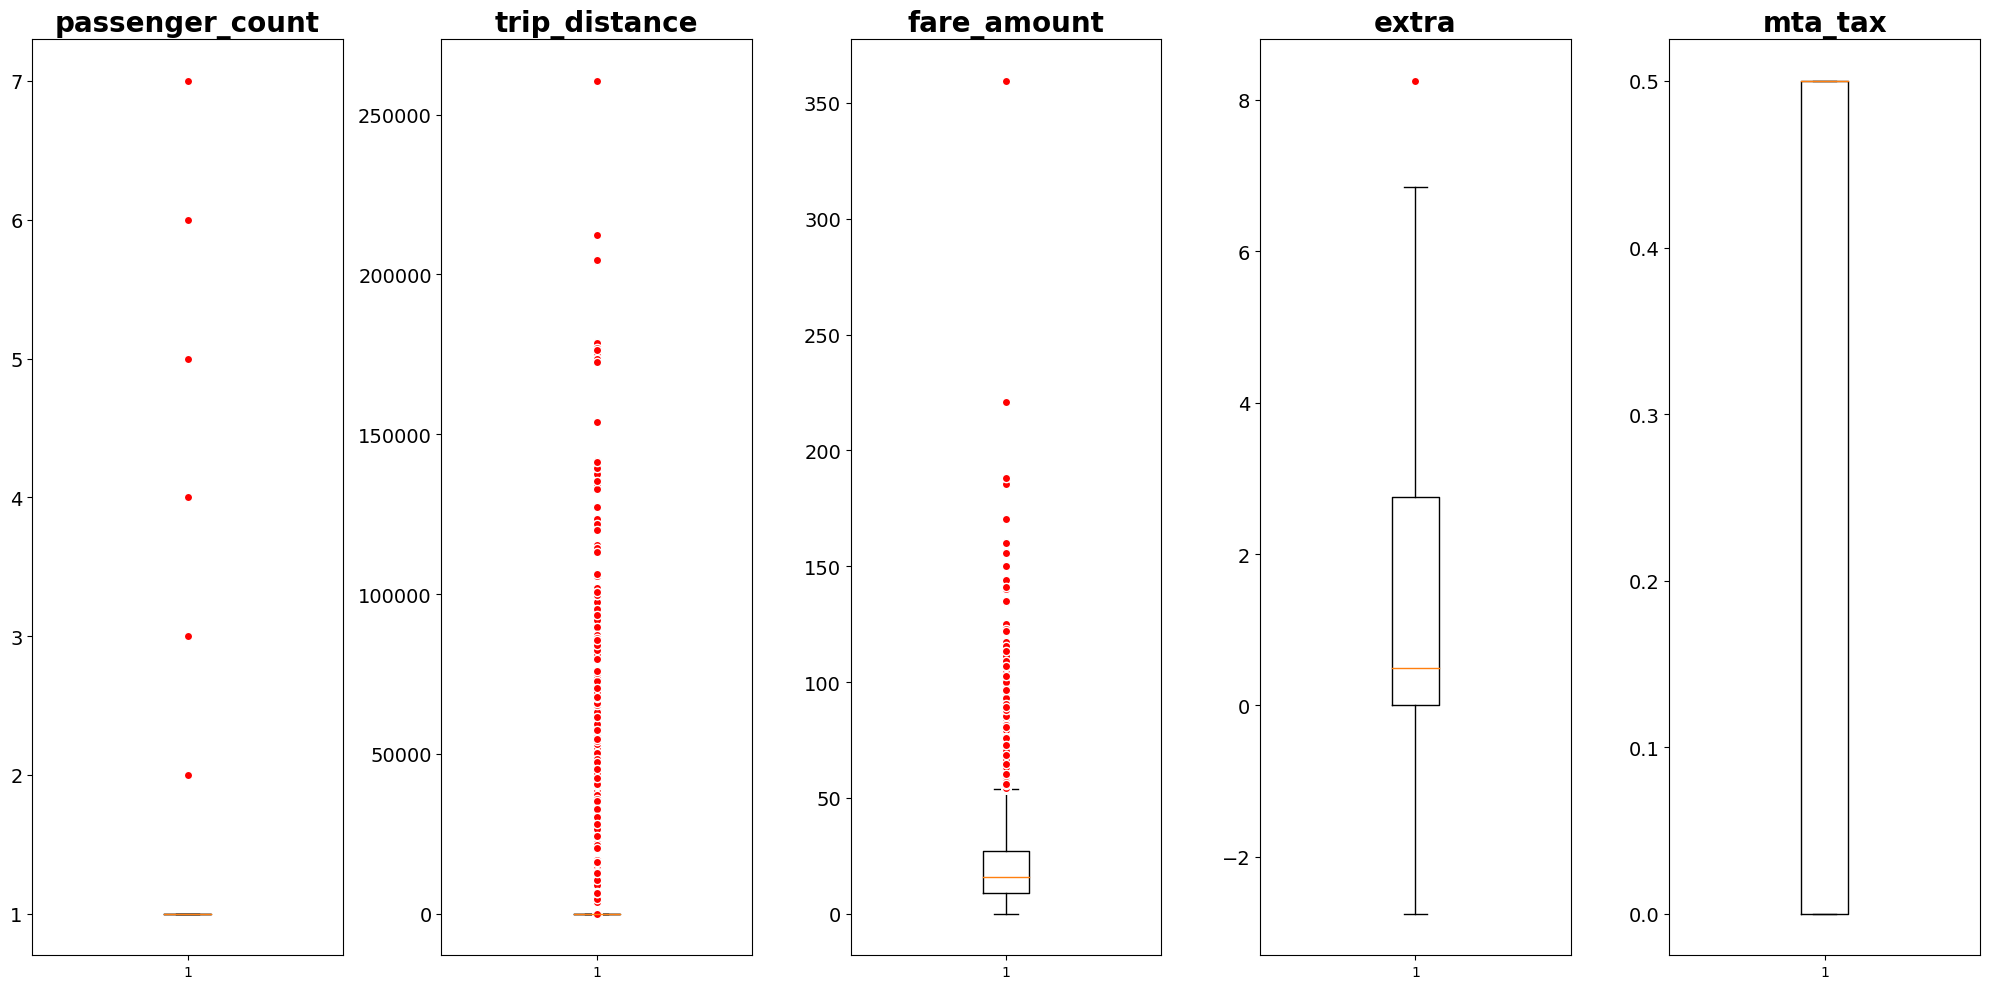

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numericals1), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df_c[numericals1].iloc[:,i], flierprops=red_circle)
      ax.set_title(df_c[numericals1].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)

  plt.tight_layout()
except:
  print("Error")

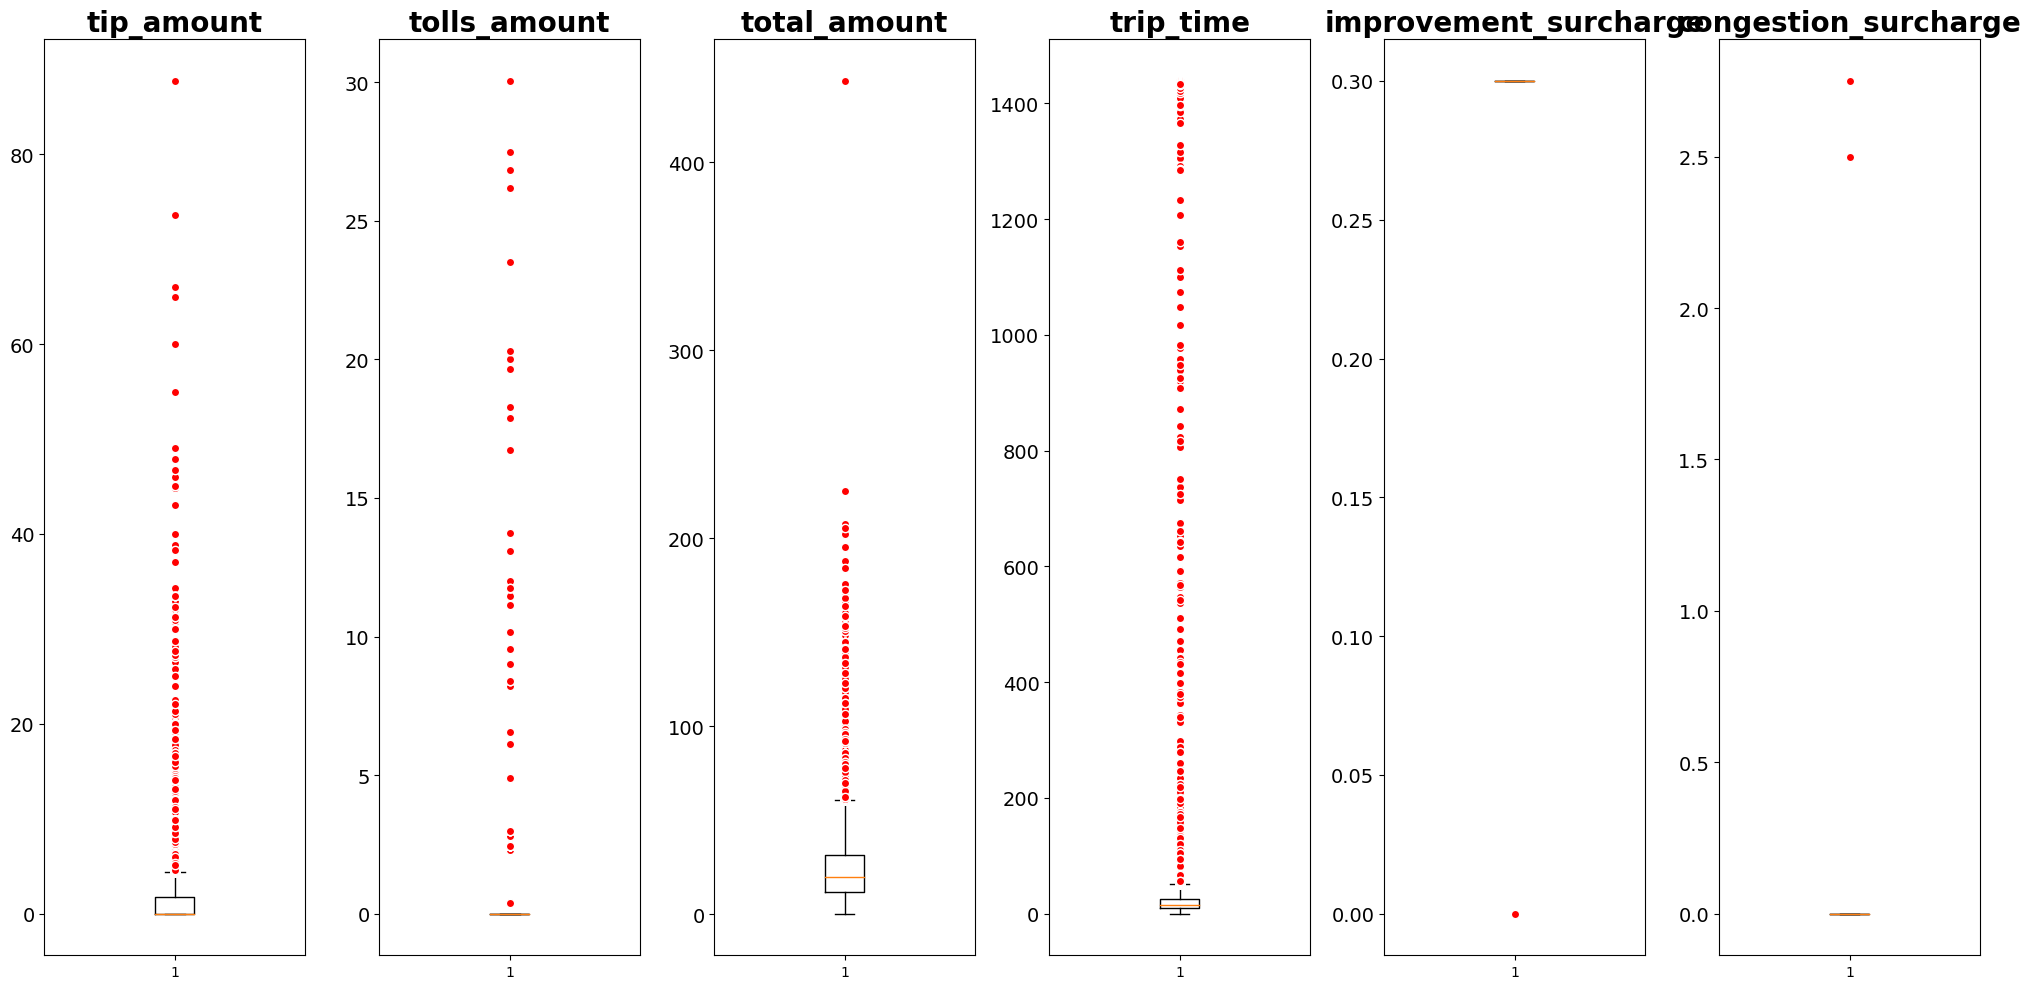

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numericals2), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df_c[numericals2].iloc[:,i], flierprops=red_circle)
      ax.set_title(df_c[numericals2].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)

  plt.tight_layout()
except:
  print("Error")

- All columns all alright, except trip_distance, fare_amount, trip_time, total_amount

### Handling Outlier in fare_amount, total_amount, trip_distance and trip_time

In [ ]:
# Check fare amount that is > $150
df_c[df_c['fare_amount'] > 150]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
2852,2021-07-02 14:31:10,2021-07-02 18:01:27,1.0,1.0,35.36,156.00,0.0,0.5,0.00,0.00,0.3,156.80,2.0,1.0,0.00,210.283333,4,14,0,0
15390,2021-07-10 11:41:24,2021-07-10 13:24:45,4.0,1.0,43.06,185.50,0.0,0.5,0.00,0.00,0.3,188.25,1.0,1.0,0.00,103.350000,5,11,0,0
20602,2021-07-13 16:04:42,2021-07-13 18:01:03,1.0,1.0,57.61,160.00,1.0,0.5,0.00,13.75,0.3,175.55,1.0,1.0,0.00,116.350000,1,16,1,0
26455,2021-07-16 18:52:13,2021-07-16 21:21:07,4.0,1.0,109.87,359.50,1.0,0.5,73.57,6.55,0.3,443.37,1.0,1.0,0.00,148.900000,4,18,1,0
28992,2021-07-18 13:57:16,2021-07-18 18:44:24,1.0,2.0,31.60,170.50,0.0,0.5,0.00,0.00,0.3,171.30,2.0,1.0,0.00,287.133333,6,13,0,0
29821,2021-07-19 06:11:35,2021-07-19 06:57:01,5.0,1.0,33.96,155.55,0.0,0.0,46.76,0.00,0.3,202.61,1.0,2.0,0.00,45.433333,0,6,0,0
33596,2021-07-21 14:30:46,2021-07-21 19:10:15,1.0,1.0,43.42,188.00,0.0,0.5,0.00,13.75,0.3,205.30,2.0,1.0,2.75,279.483333,2,14,0,0
34444,2021-07-22 05:54:05,2021-07-22 06:05:19,5.0,1.0,0.37,160.00,0.0,0.0,0.00,0.00,0.3,160.30,2.0,2.0,0.00,11.233333,3,5,0,0
39589,2021-07-25 07:28:27,2021-07-25 09:17:53,1.0,1.0,85.81,221.00,0.0,0.5,3.20,0.00,0.3,225.00,1.0,1.0,0.00,109.433333,6,7,0,0


In [ ]:
# Check total_amount that is > $150
df_c[df_c['total_amount'] > 150]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
2852,2021-07-02 14:31:10,2021-07-02 18:01:27,1.0,1.0,35.36,156.00,0.00,0.5,0.00,0.00,0.3,156.80,2.0,1.0,0.00,210.283333,4,14,0,0
5436,2021-07-04 05:51:15,2021-07-04 06:29:00,5.0,1.0,33.38,150.00,0.00,0.0,47.88,6.55,0.3,207.48,1.0,2.0,2.75,37.750000,6,5,0,0
6645,2021-07-05 09:54:10,2021-07-05 10:26:45,5.0,1.0,32.94,150.00,0.00,0.0,45.09,0.00,0.3,195.39,1.0,2.0,0.00,32.583333,0,9,0,0
9657,2021-07-07 05:59:16,2021-07-07 06:40:28,5.0,1.0,34.20,150.00,0.00,0.0,45.09,0.00,0.3,195.39,1.0,2.0,0.00,41.200000,2,5,0,0
15390,2021-07-10 11:41:24,2021-07-10 13:24:45,4.0,1.0,43.06,185.50,0.00,0.5,0.00,0.00,0.3,188.25,1.0,1.0,0.00,103.350000,5,11,0,0
19532,2021-07-13 06:10:54,2021-07-13 06:59:03,5.0,1.0,33.97,150.00,0.00,0.0,45.09,0.00,0.3,195.39,1.0,2.0,0.00,48.150000,1,6,0,0
20408,2021-07-13 14:51:49,2021-07-13 16:37:07,1.0,1.0,32.61,100.50,0.00,0.5,40.00,6.55,0.3,150.60,1.0,1.0,2.75,105.300000,1,14,0,0
20602,2021-07-13 16:04:42,2021-07-13 18:01:03,1.0,1.0,57.61,160.00,1.00,0.5,0.00,13.75,0.3,175.55,1.0,1.0,0.00,116.350000,1,16,1,0
21358,2021-07-14 06:17:33,2021-07-14 07:05:08,5.0,1.0,34.02,123.00,0.00,0.0,36.99,0.00,0.3,160.29,1.0,2.0,0.00,47.583333,2,6,0,0
22242,2021-07-14 14:37:07,2021-07-14 16:13:07,1.0,1.0,34.05,95.50,0.00,0.5,45.00,6.55,0.3,150.60,1.0,1.0,2.75,96.000000,2,14,0,0


In [ ]:
# Check trip_time that is > 600 minutes (10 hours)
df_c[df_c['trip_time'] > 600]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
70,2021-07-01 06:28:15,2021-07-02 06:17:23,1.0,1.0,15.63,52.00,0.00,0.5,0.0,6.55,0.3,59.35,1.0,1.0,0.0,1429.133333,3,6,0,0
115,2021-07-01 06:53:11,2021-07-02 06:41:45,1.0,1.0,19.68,60.00,0.00,0.5,0.0,6.55,0.3,67.35,1.0,1.0,0.0,1428.566667,3,6,0,0
364,2021-07-01 09:27:33,2021-07-02 00:00:00,1.0,1.0,15.84,50.50,0.00,0.5,0.0,6.55,0.3,57.85,1.0,1.0,0.0,872.450000,3,9,0,0
680,2021-07-01 12:34:45,2021-07-02 11:56:55,1.0,1.0,7.15,22.00,0.00,0.5,0.0,3.00,0.3,25.80,2.0,1.0,0.0,1402.166667,3,12,0,0
803,2021-07-01 13:30:38,2021-07-02 13:06:43,1.0,1.0,15.87,43.50,0.00,0.5,0.0,6.55,0.3,50.85,1.0,1.0,0.0,1416.083333,3,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63117,2021-07-17 18:24:00,2021-07-18 09:49:00,5.0,1.0,87.58,15.49,0.00,0.0,0.0,0.00,0.3,15.79,2.0,1.0,0.0,925.000000,5,18,0,0
64855,2021-07-11 19:20:00,2021-07-12 11:08:00,5.0,1.0,14.20,47.35,0.00,0.0,0.0,6.55,0.3,54.20,2.0,1.0,0.0,948.000000,6,19,0,0
69342,2021-07-20 15:14:00,2021-07-21 07:36:00,5.0,1.0,5.05,16.64,0.00,0.0,0.0,0.00,0.3,16.94,2.0,1.0,0.0,982.000000,1,15,0,0
76585,2021-07-27 11:04:00,2021-07-28 10:57:00,5.0,1.0,98.49,40.77,0.00,0.0,0.0,0.00,0.3,43.82,2.0,1.0,0.0,1433.000000,1,11,0,0


In [ ]:
# Check trip_distance that is > 150.000 miles
df_c[df_c['trip_distance'] > 150000]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
53741,2021-07-27 18:51:00,2021-07-27 19:19:00,5.0,1.0,177051.35,36.50,1.35,0.0,0.0,0.00,0.3,38.15,2.0,1.0,0.0,28.0,1,18,1,0
53742,2021-07-27 18:00:00,2021-07-27 18:02:00,5.0,1.0,177050.84,28.74,2.75,0.0,0.0,0.00,0.3,31.79,2.0,1.0,0.0,2.0,1,18,1,0
55239,2021-07-13 10:10:00,2021-07-13 10:22:00,5.0,1.0,175524.70,29.56,2.75,0.0,0.0,0.00,0.3,32.61,2.0,1.0,0.0,12.0,1,10,0,0
56042,2021-07-13 11:00:00,2021-07-13 12:20:00,5.0,1.0,175537.35,12.39,2.75,0.0,0.0,0.00,0.3,15.44,2.0,1.0,0.0,80.0,1,11,0,0
57419,2021-07-05 09:32:00,2021-07-05 09:46:00,5.0,1.0,177102.84,19.41,2.75,0.0,0.0,0.00,0.3,22.46,2.0,1.0,0.0,14.0,0,9,0,0
57537,2021-07-31 19:47:00,2021-07-31 20:12:00,5.0,1.0,204333.20,24.71,0.00,0.0,0.0,0.00,0.3,25.01,2.0,1.0,0.0,25.0,5,19,0,0
61611,2021-07-17 16:14:00,2021-07-17 16:23:00,5.0,1.0,173446.05,21.26,2.75,0.0,0.0,0.00,0.3,24.31,2.0,1.0,0.0,9.0,5,16,0,0
62631,2021-07-20 08:06:00,2021-07-20 08:43:00,5.0,1.0,177961.51,33.51,2.75,0.0,0.0,6.55,0.3,43.11,2.0,1.0,0.0,37.0,1,8,0,0
64788,2021-07-24 10:19:00,2021-07-24 11:11:00,5.0,1.0,178623.50,46.64,2.75,0.0,0.0,6.55,0.3,56.24,2.0,1.0,0.0,52.0,5,10,0,0
69141,2021-07-18 11:39:00,2021-07-18 11:57:00,5.0,1.0,173520.39,20.34,2.75,0.0,0.0,0.00,0.3,23.39,2.0,1.0,0.0,18.0,6,11,0,0


some of data in trip_time and trip_distance doesn't make sense if we compare between distance, time and fare amount, consider remove outlier

Reference:
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
- https://www.scaler.com/topics/data-science/handling-outliers-in-data-science/

In [ ]:
df_c2 = df_c.copy()
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79938 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   79938 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  79938 non-null  datetime64[ns]
 2   RatecodeID             79938 non-null  float64       
 3   passenger_count        79938 non-null  float64       
 4   trip_distance          79938 non-null  float64       
 5   fare_amount            79938 non-null  float64       
 6   extra                  79938 non-null  float64       
 7   mta_tax                79938 non-null  float64       
 8   tip_amount             79938 non-null  float64       
 9   tolls_amount           79938 non-null  float64       
 10  improvement_surcharge  79938 non-null  float64       
 11  total_amount           79938 non-null  float64       
 12  payment_type           79938 non-null  float64       
 13  t

In [ ]:
# Berfore remove outlier
df_c2[['trip_distance', 'trip_time']].describe()

,trip_distance,trip_time
count,79938.000000,79938.000000
mean,203.449322,24.554370
std,4507.577485,78.024577
min,0.010000,0.016667
25%,1.480000,8.983333
50%,2.910000,15.033333
75%,6.430000,26.000000
max,260517.930000,1438.766667


In [ ]:
# trip_distance

# Calculate the upper and lower limits
Q1_dist = df_c2['trip_distance'].quantile(0.05)
Q3_dist = df_c2['trip_distance'].quantile(0.95)
IQR = Q3_dist - Q1_dist
lower_dist = Q1_dist - 1.5*IQR
upper_dist = Q3_dist + 1.5*IQR

# Removing the outliers
df_c2 = df_c2[~(df_c2['trip_distance'] <= lower_dist)]
df_c2 = df_c2[~(df_c2['trip_distance'] >= upper_dist)]

In [ ]:
# trip_time

# Calculate the upper and lower limits
Q1_fare = df_c2['trip_time'].quantile(0.05)
Q3_fare = df_c2['trip_time'].quantile(0.95)
IQR = Q3_fare - Q1_fare
lower_fare = Q1_fare - 1.5*IQR
upper_fare = Q3_fare + 1.5*IQR

# Removing the outliers
df_c2 = df_c2[~(df_c2['trip_time'] <= lower_fare)]
df_c2 = df_c2[~(df_c2['trip_time'] >= upper_fare)]

In [ ]:
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79353 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   79353 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  79353 non-null  datetime64[ns]
 2   RatecodeID             79353 non-null  float64       
 3   passenger_count        79353 non-null  float64       
 4   trip_distance          79353 non-null  float64       
 5   fare_amount            79353 non-null  float64       
 6   extra                  79353 non-null  float64       
 7   mta_tax                79353 non-null  float64       
 8   tip_amount             79353 non-null  float64       
 9   tolls_amount           79353 non-null  float64       
 10  improvement_surcharge  79353 non-null  float64       
 11  total_amount           79353 non-null  float64       
 12  payment_type           79353 non-null  float64       
 13  t

In [ ]:
# How many data left from the original dataset?
print("How many data left from the original dataset?")
print(f'{df_c2.shape[0] / df.shape[0] * 100:.2f}%')

How many data left from the original dataset?
94.82%


In [ ]:
# After remove outlier
df_c2[['trip_distance', 'trip_time']].describe()

,trip_distance,trip_time
count,79353.000000,79353.000000
mean,4.927535,19.945523
std,5.254228,16.097929
min,0.010000,0.016667
25%,1.470000,8.933333
50%,2.900000,15.000000
75%,6.360000,26.000000
max,41.060000,128.750000


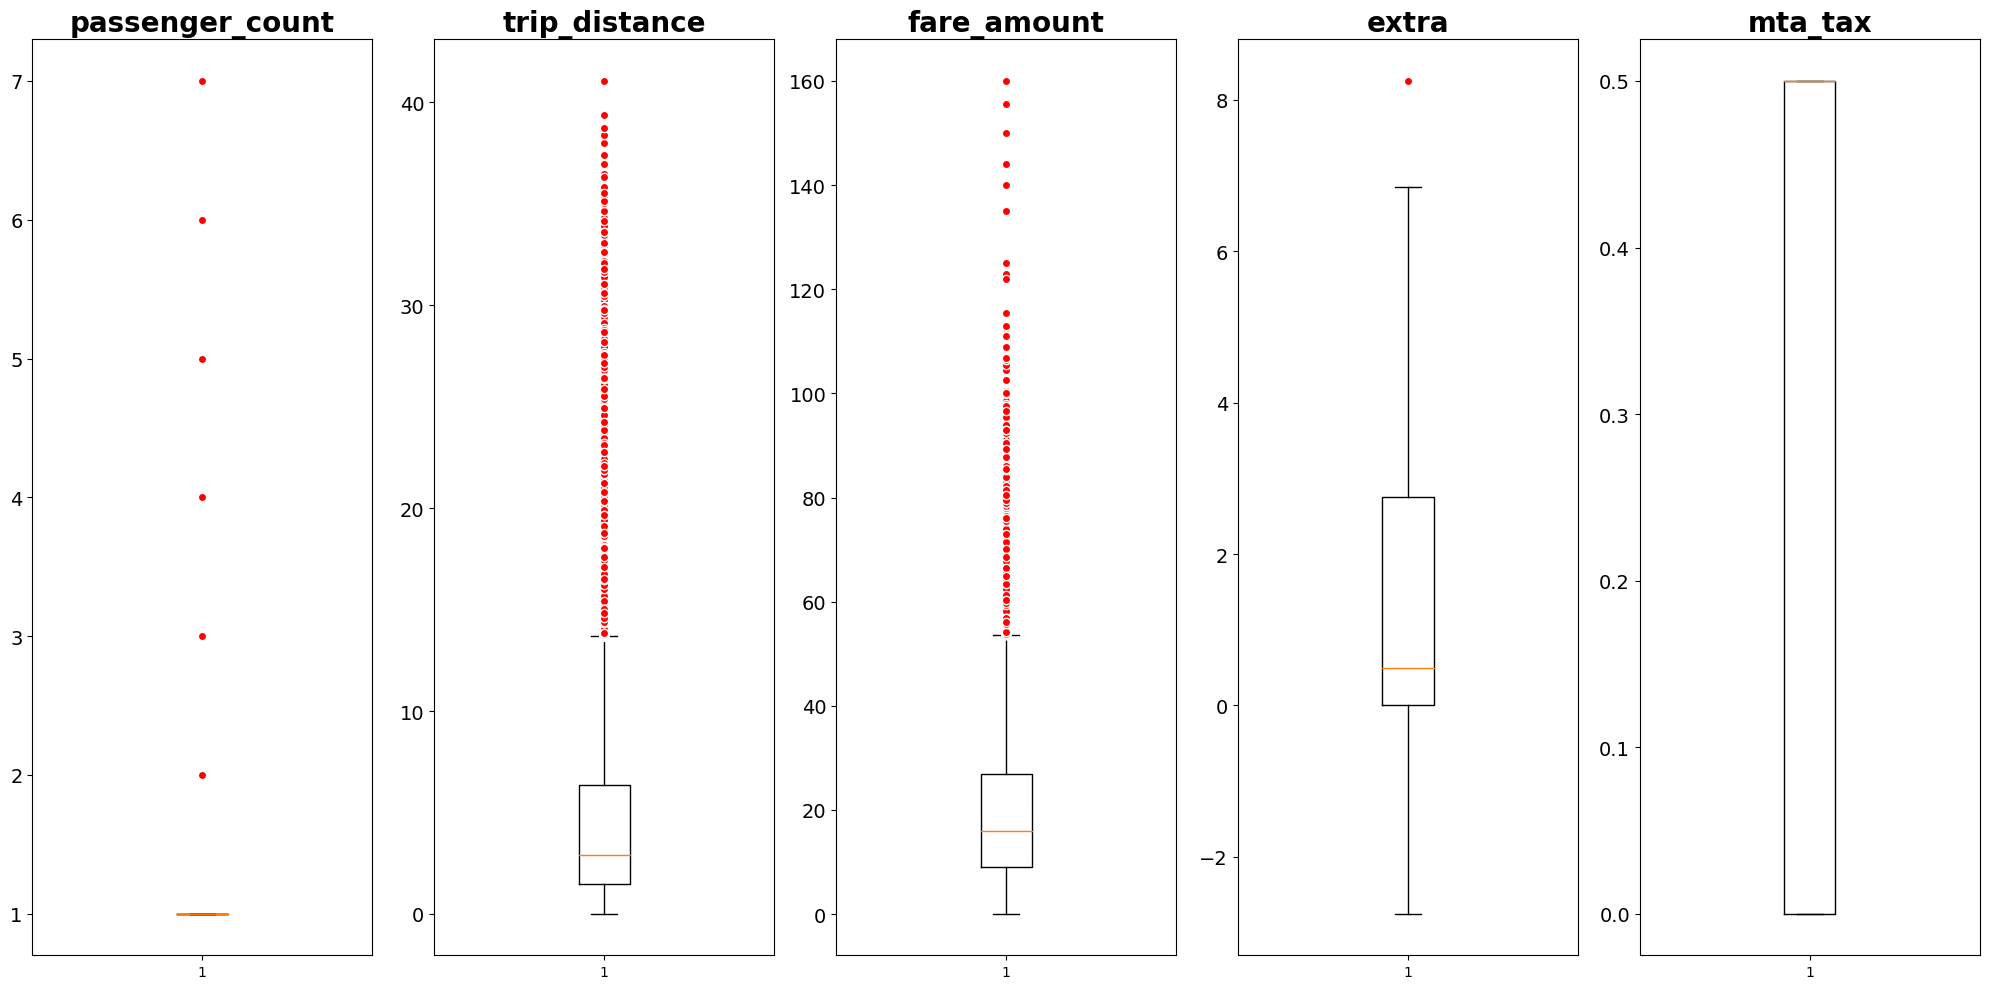

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numericals1), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df_c2[numericals1].iloc[:,i], flierprops=red_circle)
      ax.set_title(df_c2[numericals1].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)

  plt.tight_layout()
except:
  print("Error")

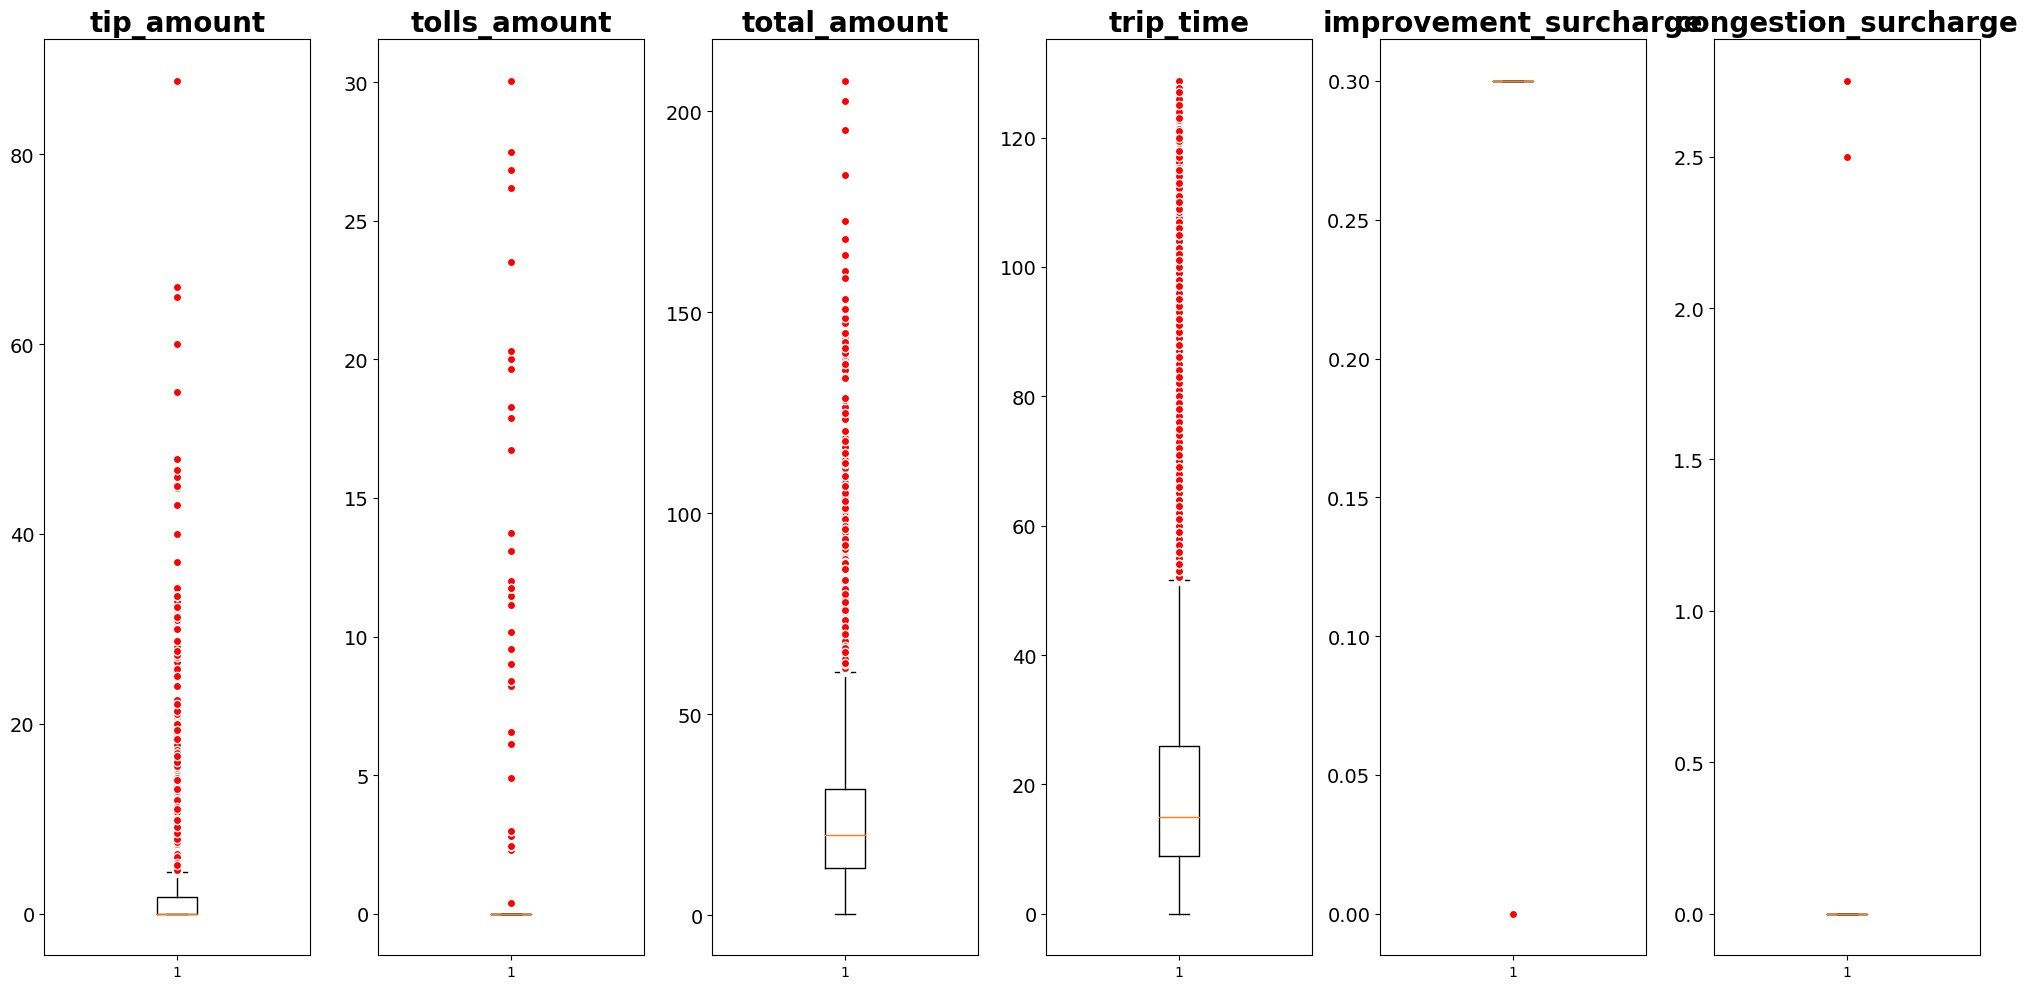

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(numericals2), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df_c2[numericals2].iloc[:,i], flierprops=red_circle)
      ax.set_title(df_c2[numericals2].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)

  plt.tight_layout()
except:
  print("Error")

After seeing the total amount and fare_amount, it's still make sense that the fare max around \$200

## Save data to CSV

In [ ]:
# data clean and ready to use
df_c2.to_csv('data_ready_use_taxi4.csv', index=False)

In [ ]:
# data that still have outlier
df_c.to_csv('data_contain_outlier_taxi4.csv', index=False)

# Exploratory Data Analytics (EDA)
Descriptive Statistics Analysis

## Read Ready-Use Data

In [ ]:
df_use = pd.read_csv('data_ready_use_taxi4.csv', parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
df_use.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79353 entries, 0 to 79352
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   79353 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  79353 non-null  datetime64[ns]
 2   RatecodeID             79353 non-null  float64       
 3   passenger_count        79353 non-null  float64       
 4   trip_distance          79353 non-null  float64       
 5   fare_amount            79353 non-null  float64       
 6   extra                  79353 non-null  float64       
 7   mta_tax                79353 non-null  float64       
 8   tip_amount             79353 non-null  float64       
 9   tolls_amount           79353 non-null  float64       
 10  improvement_surcharge  79353 non-null  float64       
 11  total_amount           79353 non-null  float64       
 12  payment_type           79353 non-null  float64       
 13  t

## To Do dan Objective

Objective:
- Understand Descriptive Statistics of Data

To Do:

**EDA 1 Variable**
> Descriptive Analysis 1 Variable
- Numerical columns
  - Average, Max, Min, Median, and Standard Deviation of each numerical column
  - Check Data Distribution using kdplot and boxplot
- Categorical plot (Using Bar Chart / Pie Chart) to know the proportion of categorical columns

**EDA 2 Variable**
> Descriptive Analysis 2 Variable
- Look at the Scatterplot of each numerical predictor variable (Variable X) compare to response variable (Variable Y)
  - Look if the data has correlation
  - Look if the data has non-linear shape
- For Categorical Predictor:
  - Average of total_amount with each categorical variable

**EDA Multivariable**
> Descriptive Analysis Multivariable
- Create correlation table (heatmap) to know the colinearity and eliminate it
- Compare average distance trip - fare - total order in each RatecodeID when the customer at rush hour or overnight

## EDA 1 Variable

### Descriptive Statistics of Numerical Columns

In [ ]:
df_use.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
# Determine which columns are numerical column
col_numerical = ['trip_distance', 'fare_amount',
                  'total_amount', 'trip_time',
                  'extra','mta_tax',
                  'tip_amount',	'tolls_amount',
                 'improvement_surcharge',
                 'congestion_surcharge']

In [ ]:
# Descriptive Statistics of Numerical Columns
df_use[col_numerical].describe()

,trip_distance,fare_amount,total_amount,trip_time,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
count,79353.000000,79353.000000,79353.000000,79353.000000,79353.000000,79353.000000,79353.000000,79353.000000,79353.000000,79353.000000
mean,4.927535,20.475317,24.362591,19.945523,1.189281,0.294708,1.077883,0.624984,0.299932,0.410794
std,5.254228,15.259662,16.928023,16.097929,1.371620,0.245971,2.294293,1.987910,0.004518,0.980266
min,0.010000,0.080000,0.380000,0.016667,-2.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.470000,9.000000,11.800000,8.933333,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000
50%,2.900000,16.000000,19.860000,15.000000,0.500000,0.500000,0.000000,0.000000,0.300000,0.000000
75%,6.360000,26.850000,31.310000,26.000000,2.750000,0.500000,1.760000,0.000000,0.300000,0.000000
max,41.060000,160.000000,207.480000,128.750000,8.250000,0.500000,87.710000,30.050000,0.300000,2.750000


Analysis Result:

<!-- > passenger_count
- Average of passenger_count is ~1 with a standard deviation of 0.78. That means the data the passenger_count typically lying around 0.7 ~ 1 to 1.97 ~ 2
- The max passenger_count is 7 and the min passenger_count is 1.
- If we look at the Q1, median and Q3, most of the data has value of 1. -->

> trip_distance
- Average of trip_distance is 4.93 miles with a standard deviation of 5.25 miles. That means in this data the trip_distance typically lying around 5.25 miles below or above 4.93 miles (the average).
- The standard deviation higher than the average, that means the distance(miles) is more varied
- The max trip_distance is 41.06 miles and the min trip_distance is 0.01 miles.
- If we look at the Q1, median and Q3, then compare it to max data, we can guess that this column has positive skew.

> fare_amount
- Average of fare_amount is \$20.47 with a standard deviation of \$15.25. That means in this data the fare_amount typically lying around \$15.25 below or above \$20.47 (the average).
- The standard deviation is almost the same as the average, that means the fare_amount is varied
- The max fare_amount is \$160 and the min fare_amount is \$0.08.
- If we look at the Q1, median and Q3, then compare it to max data, we can guess that this column has positive skew.

> total_amount
- Average of total_amount is \$24.36 with a standard deviation of \$16.92. That means in this data the total_amount typically lying around \$16.92 below or above \$24.36 (the average).
- The max total_amount is \$207.48 and the min total_amount is \$0.38.
- If we look at the Q1, median and Q3, then compare it to max data, we can guess that this column has positive skew.

> trip_time
- Average of trip_time is 19.94 minutes with a standard deviation of 16.09 minutes. That means in this data the trip_time typically lying around 16.09 minutes below or above 19.94 minutes (the average).
- The standard deviation is almost the same as the average, that means the trip_time is varied
- The max trip_time is 128.75 minutes and the min trip_time is 0.016 minutes.
- If we look at the Q1, median and Q3, then compare it to max data, we can guess that this column has positive skew.

> extra
- Average of extra is \$1.18 with a standard deviation of \$1.37. That means in this data the extra typically lying around \$1.37 below or above \$1.18 (the average).
- The standard deviation higher than the average, that means the extra is more varied
- The max extra is \$8.25 and the min extra is \-$2.75.

In [ ]:
df_use['mta_tax'].value_counts()

0.5    46772
0.0    32581
Name: mta_tax, dtype: int64

> mta_tax
- Average of mta_tax is \$0.25 with a standard deviation of \$0.29. That means in this data the mta_tax typically lying around \$0.29 below or above \$0.25 (the average).
- The mta_tax only consist with \$0 and \$0.5
- The max mta_tax is \$0.5 and the min mta_tax is \$0.

> tip_amount
- Average of tip_amount is \$1.07 with a standard deviation of \$2.29. That means in this data the tip_amount typically lying around \$2.29 below or above \$1.07 (the average).
- The standard deviation higher than the average, that means the tip_amount is more varied
- The max tip_amount is \$87.71 and the min tip_amount is \$0.
- If we look at the Q1, median and Q3, then compare it to max data, we can guess that this column has positive skew.

> tolls_amount
- Average of tolls_amount is \$0.62 with a standard deviation of \$1.98. That means in this data the tolls_amount typically lying around \$1.98 below or above \$0.62 (the average).
- The standard deviation higher than the average, that means the tolls_amount is more varied
- The max tolls_amount is \$30.05 and the min tolls_amount is \$0.
- If we look at the Q1, median and Q3, then compare it to max data, we can guess that this column has positive skew.

In [ ]:
df_use['improvement_surcharge'].value_counts()

0.3    79335
0.0       18
Name: improvement_surcharge, dtype: int64

> improvement_surcharge
- Average of improvement_surcharge is \$0.29 with a standard deviation of \$0.0045. That means in this data the improvement_surcharge typically lying around \$0.0045 below or above \$0.29 (the average).
- The improvement_surcharge only consist with \$0.3 and \$0

In [ ]:
df_use['congestion_surcharge'].value_counts()

0.00    67499
2.75    11851
2.50        3
Name: congestion_surcharge, dtype: int64

> congestion_surcharge
- Average of congestion_surcharge is \$0.41 with a standard deviation of \$0.98. That means in this data the congestion_surcharge typically lying around \$0.98 below or above \$0.41 (the average).
- The congestion_surcharge only consist with \$0, \$2.50 and \$2.75

Reference:
- https://statisticsbyjim.com/basics/standard-deviation/

### Numerical Data Distribution

In [ ]:
# # Chek skewness
# for i in range(len(col_numerical)):
#     skewness_score = scipy.stats.skew(df_use[col_numerical[i]])
#     if skewness_score <= 1 and skewness_score>=-1:
#         print(f'Skewness score of {col_numerical[i]} : {scipy.stats.skew(df_use[col_numerical[i]])}\n(Normal Distribution)')
#     elif skewness_score >1:
#         print(f'Skewness score of {col_numerical[i]} : {scipy.stats.skew(df_use[col_numerical[i]])}\n(Positive Skew)')
#     else:
#         print(f'Skewness score of {col_numerical[i]} : {scipy.stats.skew(df_use[col_numerical[i]])}\n(Negative Skew)')

Skewness score of trip_distance : 2.0560958054578093
(Positive Skew)
Skewness score of fare_amount : 1.6266870211989188
(Positive Skew)
Skewness score of total_amount : 1.656369488457612
(Positive Skew)
Skewness score of trip_time : 1.8660919462235268
(Positive Skew)
Skewness score of extra : 0.9535006684703095
(Normal Distribution)
Skewness score of mta_tax : -0.36352796441522267
(Normal Distribution)
Skewness score of tip_amount : 6.443354094907273
(Positive Skew)
Skewness score of tolls_amount : 3.3379204495021373
(Positive Skew)
Skewness score of improvement_surcharge : -66.37394237866236
(Negative Skew)
Skewness score of congestion_surcharge : 1.9671938651487617
(Positive Skew)


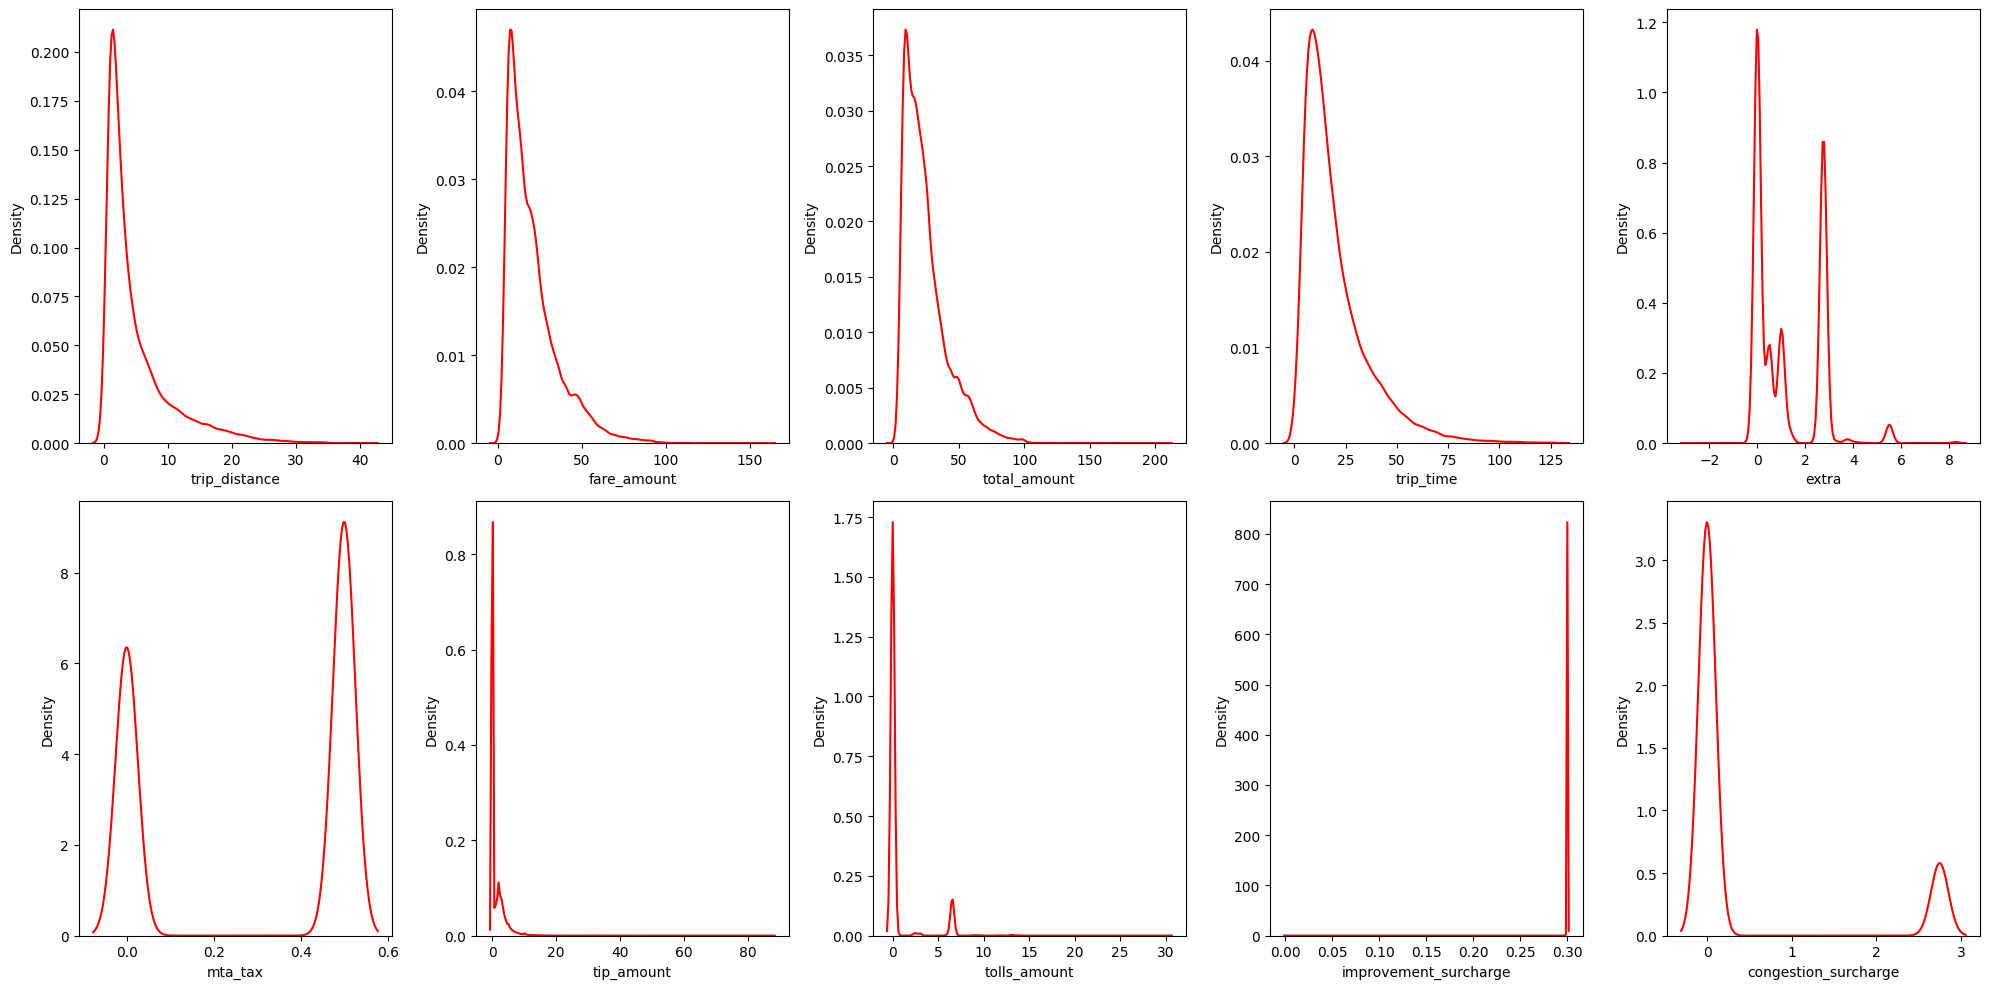

In [ ]:
# MLook at the Distribution of Numerical Columns
features_num = col_numerical

plt.figure(figsize=(20,10))

for i in range(0, len(col_numerical)):
  plt.subplot(2, 5, i+1) # 2x5 = 10 > len(col_numerical) = 5
  sns.kdeplot(x=df_use[features_num[i]], color = 'red')
  plt.xlabel(features_num[i])
  plt.tight_layout()


- trip_distance, fare_amount, total_amount and trip_time has positive skew
- Extra has multimodal distribution
- mta_tax & congestion_surcharge has bimodal distribution

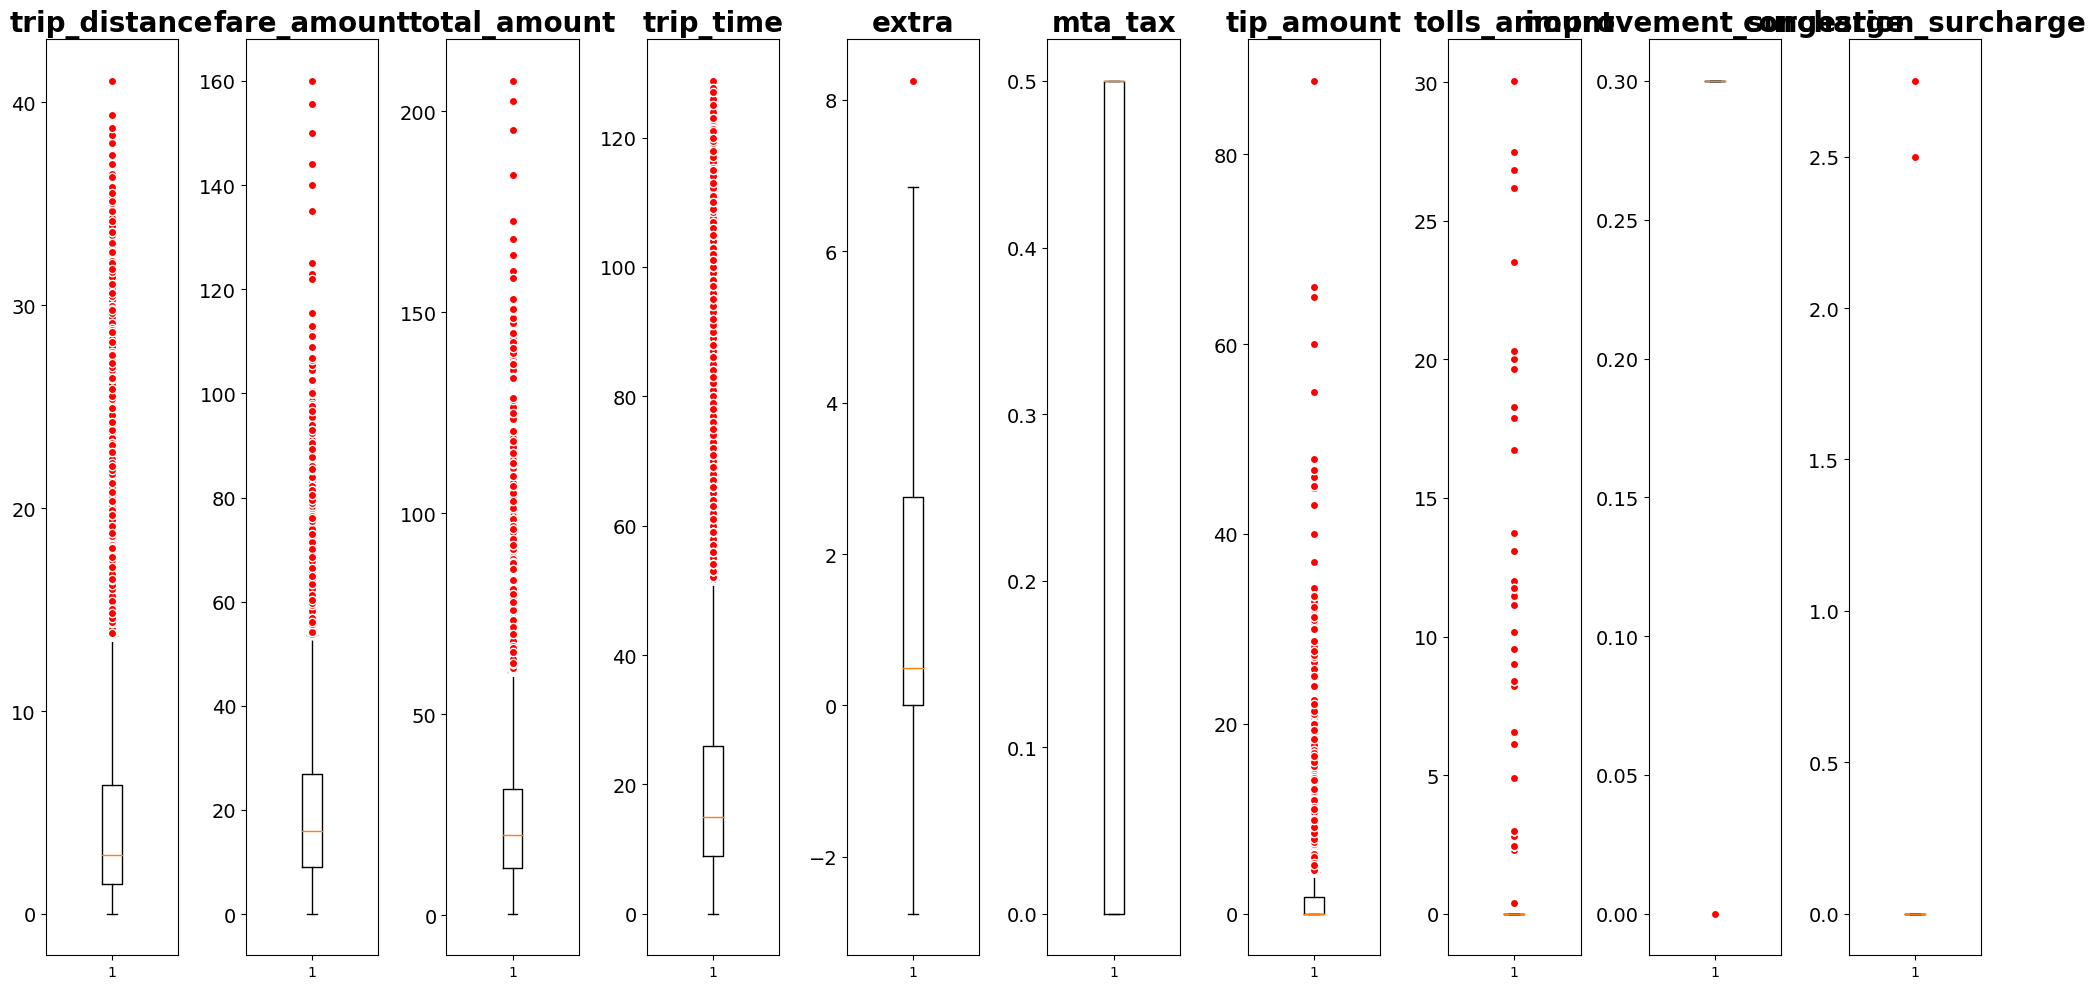

In [ ]:
#Creating subplot of each column with its own scale
try:
  red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

  fig, axs = plt.subplots(1, len(col_numerical), figsize=(20,10))

  for i, ax in enumerate(axs.flat):
      ax.boxplot(df_use[col_numerical].iloc[:,i], flierprops=red_circle)
      ax.set_title(df_use[col_numerical].columns[i], fontsize=20, fontweight='bold')
      ax.tick_params(axis='y', labelsize=14)

  plt.tight_layout()
except:
  print("Error")

Analysis Result
> Data Distribution
- Almost all distribution of the data is skewed positive
- If we look at the box plot above, almost all numerical columns have outliers
- But, the data are still making sense, so leave it as it is

### Descriptive Statistics of Categorical Columns

In [ ]:
df_use.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,0


In [ ]:
# Determine which columns are categorical column
col_categorical = ['passenger_count', 'RatecodeID', 'payment_type',
                   'trip_type', 'is_rushour', 'is_overnight']

In [ ]:
# Only take categorical columns
df_use_cat = df_use[col_categorical].copy()

df_use_cat.head()

,passenger_count,RatecodeID,payment_type,trip_type,is_rushour,is_overnight
0,1.0,1.0,2.0,1.0,0,0
1,2.0,1.0,2.0,1.0,0,0
2,1.0,1.0,1.0,1.0,0,0
3,1.0,1.0,2.0,1.0,0,0
4,1.0,1.0,2.0,1.0,0,0


In [ ]:
# Descriptive Statistics of categorical Columns
# df_desc_cat = df_use_cat.describe(include='object').T
# df_desc_cat = df_use_cat.describe()

# # create new columns, percentage_of_mode
# df_desc_cat['percentage_of_mode'] = (df_desc_cat['freq'] /
#                                     df_desc_cat['count'] ) * 100

# df_desc_cat

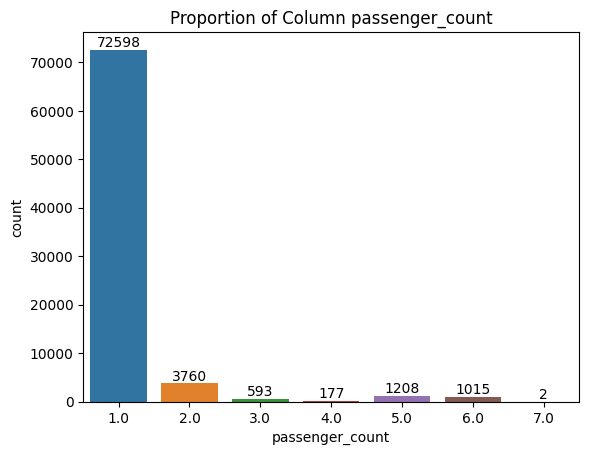

In [ ]:
# Create Proportion of column passenger_count
df_psg_cnt_prp = df_use.groupby('passenger_count').agg(count=('passenger_count', 'count'))
df_psg_cnt_prp.reset_index(inplace=True)
# df_psg_cnt_prp


# plotting data on chart
ax = sns.barplot(df_psg_cnt_prp,
            x = 'passenger_count', y = 'count', errwidth=0)

# Add Data label
ax.bar_label(ax.containers[0], fontsize=10)

# Create title
plt.title('Proportion of Column passenger_count')

# displaying chart
plt.show()

In [ ]:
df_psg_cnt_prp

,passenger_count,count
0,1.0,72598
1,2.0,3760
2,3.0,593
3,4.0,177
4,5.0,1208
5,6.0,1015
6,7.0,2


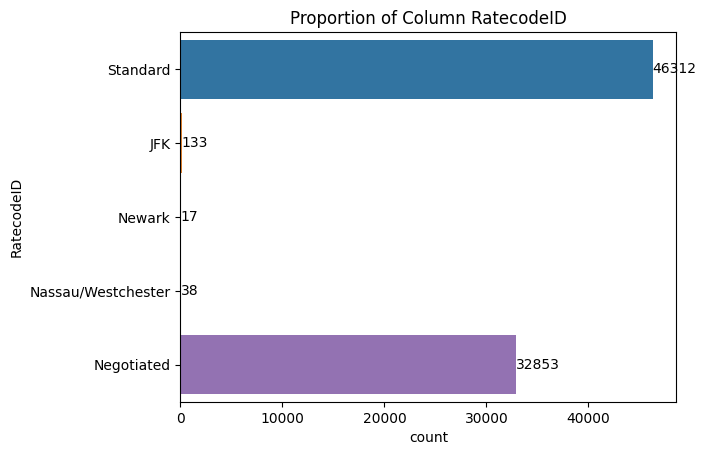

In [ ]:
# Create Proportion of column RatecodeID
df_ratecode_prp = df_use.groupby('RatecodeID').agg(count=('RatecodeID', 'count'))
df_ratecode_prp.reset_index(inplace=True)
# df_ratecode_prp

# replace value in RatecodeID to more valuable
df_ratecode_prp['RatecodeID'] = df_ratecode_prp['RatecodeID'].replace([1, 2, 3, 4, 5], ['Standard', 'JFK', 'Newark', 'Nassau/Westchester', 'Negotiated'])


# plotting data on chart
ax = sns.barplot(df_ratecode_prp,
            y = 'RatecodeID', x = 'count', errwidth=0)

# Add Data label
ax.bar_label(ax.containers[0], fontsize=10)

# Create title
plt.title('Proportion of Column RatecodeID')

# displaying chart
plt.show()

In [ ]:
df_ratecode_prp

,RatecodeID,count
0,Standard,46312
1,JFK,133
2,Newark,17
3,Nassau/Westchester,38
4,Negotiated,32853


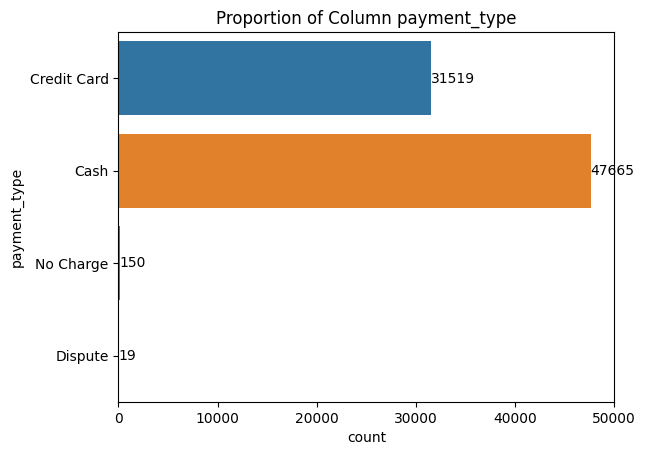

In [ ]:
# Create Proportion of column payment_type
pay_type_prp = df_use.groupby('payment_type').agg(count=('payment_type', 'count'))
pay_type_prp.reset_index(inplace=True)
# pay_type_prp

# replace value in payment_type to more valuable
pay_type_prp['payment_type'] = pay_type_prp['payment_type'].replace([1, 2, 3, 4], ['Credit Card', 'Cash', 'No Charge', 'Dispute'])


# plotting data on chart
ax = sns.barplot(pay_type_prp,
            y = 'payment_type', x = 'count', errwidth=0)

# Add Data label
ax.bar_label(ax.containers[0], fontsize=10)

# Create title
plt.title('Proportion of Column payment_type')

# displaying chart
plt.show()

In [ ]:
pay_type_prp

,payment_type,count
0,Credit Card,31519
1,Cash,47665
2,No Charge,150
3,Dispute,19


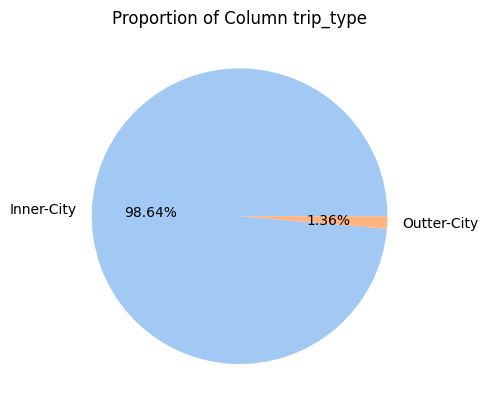

In [ ]:
# Create Proportion of column trip_type
df_trip_type_proportion = df_use.groupby('trip_type').agg(count=('trip_type', 'count'))
df_trip_type_proportion.reset_index(inplace=True)
# df_trip_type_proportion

# Look at the proportion of the trip_type
keys = ['Inner-City', 'Outter-City']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_trip_type_proportion['count'], labels=keys, colors=palette_color,
        autopct='%.2f%%')

# Create title
plt.title('Proportion of Column trip_type')

# displaying chart
plt.show()

In [ ]:
df_trip_type_proportion

,trip_type,count
0,1.0,78272
1,2.0,1081


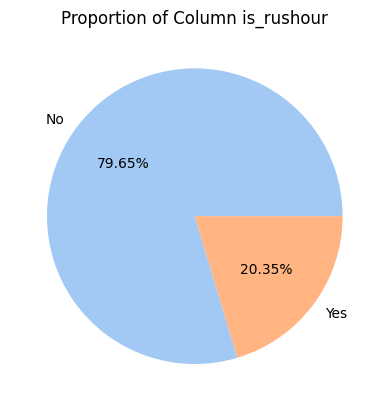

In [ ]:
# Create Proportion of column is_rushour
df_is_rushour_proportion = df_use.groupby('is_rushour').agg(count=('is_rushour', 'count'))
df_is_rushour_proportion.reset_index(inplace=True)
# df_is_rushour_proportion

# Look at the proportion of the is_rushour
keys = ['No', 'Yes']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_is_rushour_proportion['count'], labels=keys, colors=palette_color,
        autopct='%.2f%%')

# Create title
plt.title('Proportion of Column is_rushour')

# displaying chart
plt.show()

In [ ]:
df_is_rushour_proportion

,is_rushour,count
0,0,63204
1,1,16149


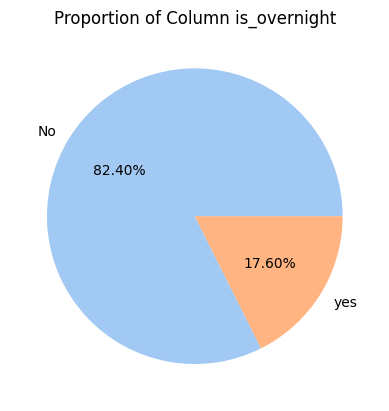

In [ ]:
# Create Proportion of column is_overnight
df_is_overnight_proportion = df_use.groupby('is_overnight').agg(count=('is_overnight', 'count'))
df_is_overnight_proportion.reset_index(inplace=True)
# df_is_overnight_proportion

# Look at the proportion of the is_overnight
keys = ['No', 'yes']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(df_is_overnight_proportion['count'], labels=keys, colors=palette_color,
        autopct='%.2f%%')

# Create title
plt.title('Proportion of Column is_overnight')

# displaying chart
plt.show()

In [ ]:
df_is_overnight_proportion

,is_overnight,count
0,0,65383
1,1,13970


Analysis Result
> Descriptive Statistic of Categorical Column
- The mode data of column passenger_count is 1 (1 Passenger)
- The mode data of column RatecodeID is 1 (Standard)
- The mode data of column payment_type is 2 (Cash)
- The mode data of column trip_type is 1 (Inner-City)
- The mode data of column is_rushour is 0 (Order Not in Rush Hour)
- The mode data of column is_overnight is 0 (Order Not at Overnight)

## EDA 2 Variables

### Numerical and Numerical Columns


#### total_amount vs trip distance

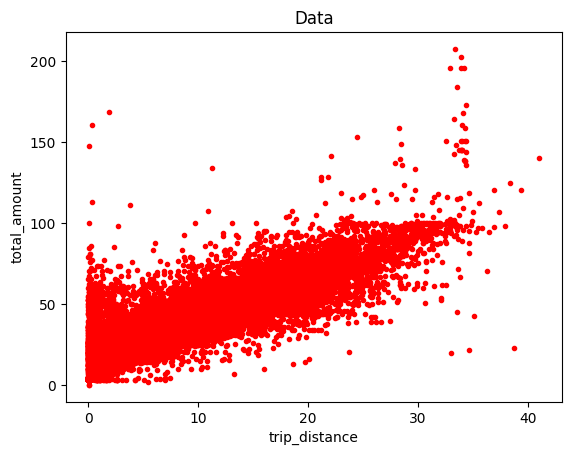

In [ ]:
# Define x and y variable
x = df_use['trip_distance']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("trip_distance")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
# Check correlation
df_use[['trip_distance', 'total_amount']].corr()

,trip_distance,total_amount
trip_distance,1.000000,0.904797
total_amount,0.904797,1.000000


Analysis Result
- The column trip_distance and total_amount has positive correlation

#### total_amount vs extra

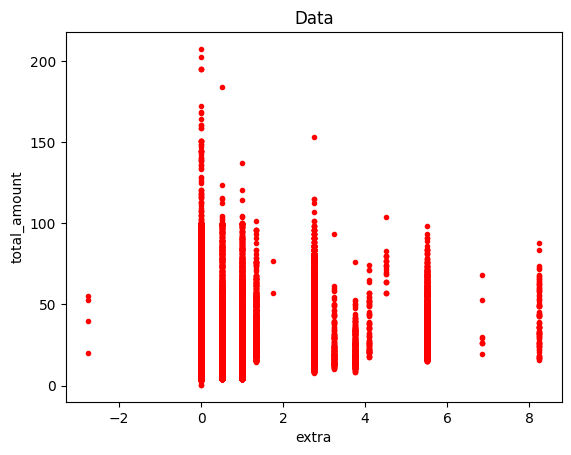

In [ ]:
# Define x and y variable
x = df_use['extra']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("extra")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
# Check correlation
df_use[['extra', 'total_amount']].corr()

,extra,total_amount
extra,1.00000,0.36066
total_amount,0.36066,1.00000


Analysis Result
- The column extra and total_amount has positive correlation
- But, the scatter plot does not make any linear line resemblance. It makes the extra look like categorical data, but it's actually numerical data

#### total_amount vs mta_tax

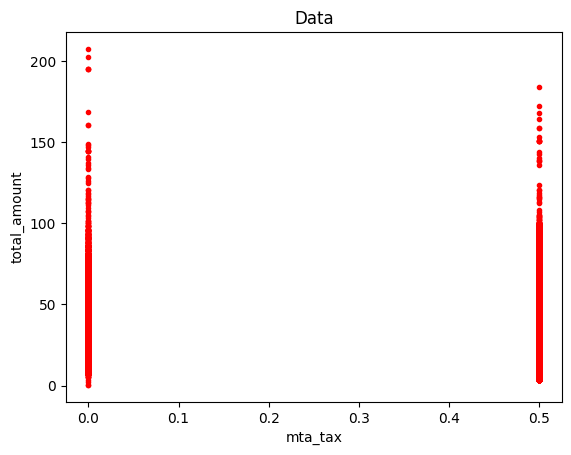

In [ ]:
# Define x and y variable
x = df_use['mta_tax']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("mta_tax")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
df_use['mta_tax'].unique()

array([0.5, 0. ])

In [ ]:
# Check correlation
df_use[['mta_tax', 'total_amount']].corr()

,mta_tax,total_amount
mta_tax,1.000000,-0.429367
total_amount,-0.429367,1.000000


Analysis Result
- The column mta_tax and total_amount has negative correlation
- But, the scatter plot makes the mta_tax look like categorical data, that's because the data only consist of 0 and 0.5

#### total_amount vs tip_amount

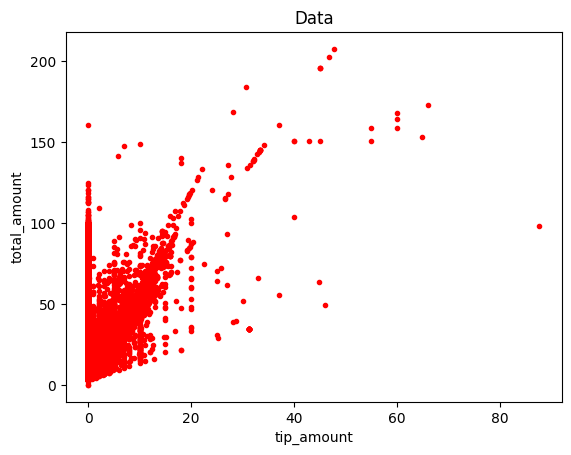

In [ ]:
# Define x and y variable
x = df_use['tip_amount']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("tip_amount")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
# Check correlation
df_use[['tip_amount', 'total_amount']].corr()

,tip_amount,total_amount
tip_amount,1.000000,0.164538
total_amount,0.164538,1.000000


Analysis Result
- The column tip_amount and total_amount has positive correlation

#### total_amount vs tolls_amount

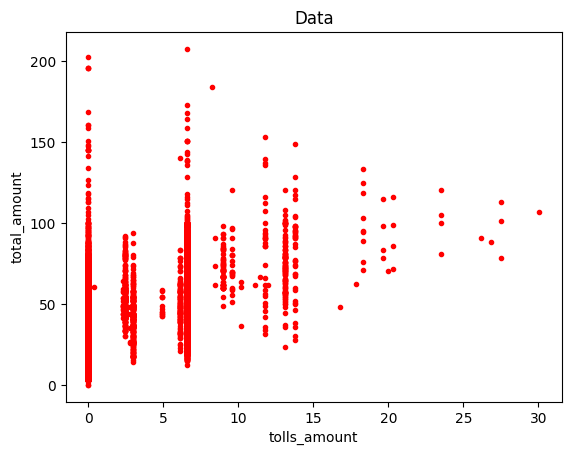

In [ ]:
# Define x and y variable
x = df_use['tolls_amount']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("tolls_amount")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
# Check correlation
df_use[['tolls_amount', 'total_amount']].corr()

,tolls_amount,total_amount
tolls_amount,1.000000,0.590737
total_amount,0.590737,1.000000


Analysis Result
- The column tolls_amount and total_amount has positive correlation
- But, the scatter plot does not make any linear line resemblance. It makes the tolls_amount look like categorical data, but it's actually numerical data

#### total_amount vs trip_time

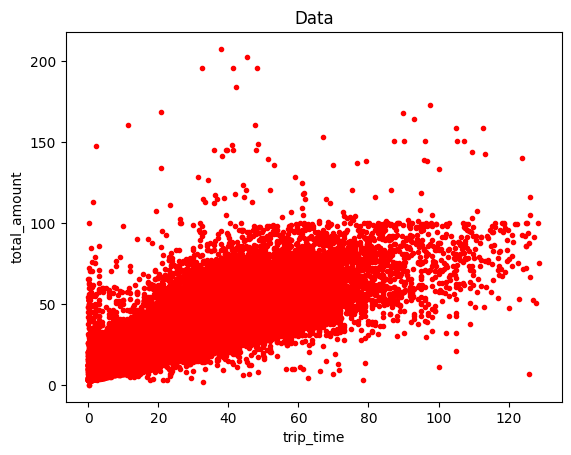

In [ ]:
# Define x and y variable
x = df_use['trip_time']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("trip_time")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
# Check correlation
df_use[['trip_time', 'total_amount']].corr()

,trip_time,total_amount
trip_time,1.000000,0.828568
total_amount,0.828568,1.000000


Analysis Result
- The column trip_time and total_amount has positive correlation

#### total_amount vs improvement_surcharge

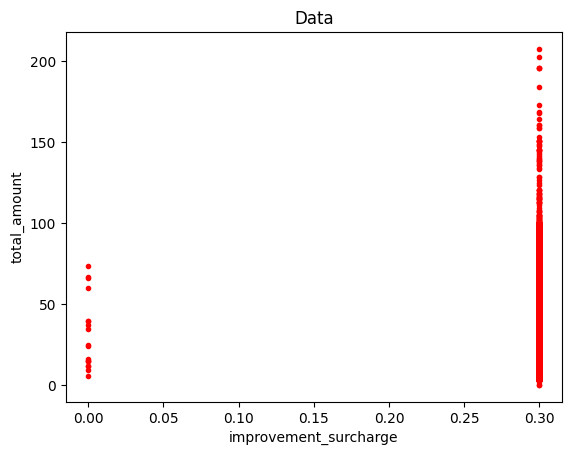

In [ ]:
# Define x and y variable
x = df_use['improvement_surcharge']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("improvement_surcharge")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
df_use['improvement_surcharge'].unique()

array([0.3, 0. ])

In [ ]:
# Check correlation
df_use[['improvement_surcharge', 'total_amount']].corr()

,improvement_surcharge,total_amount
improvement_surcharge,1.0000,-0.0064
total_amount,-0.0064,1.0000


Analysis Result
- The column improvement_surcharge and total_amount has negative correlation
- But, the scatter plot makes the improvement_surcharge look like categorical data, that's because the data only consist of 0 and 0.3

#### total_amount vs congestion_surcharge

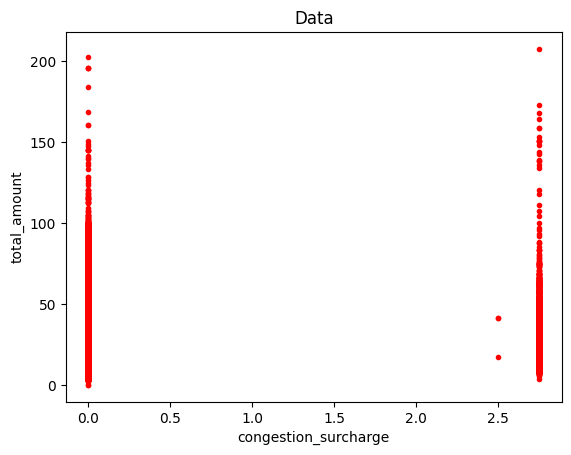

In [ ]:
# Define x and y variable
x = df_use['congestion_surcharge']
y = df_use['total_amount']

# Plot the data
plt.scatter(x, y, color = "red", marker=".")

# Add a legend and labels
plt.xlabel("congestion_surcharge")
plt.ylabel("total_amount")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
df_use['congestion_surcharge'].unique()

array([0.  , 2.75, 2.5 ])

In [ ]:
df_use['congestion_surcharge'].value_counts()

0.00    67499
2.75    11851
2.50        3
Name: congestion_surcharge, dtype: int64

In [ ]:
# Check correlation
df_use[['congestion_surcharge', 'total_amount']].corr()

,congestion_surcharge,total_amount
congestion_surcharge,1.000000,-0.048893
total_amount,-0.048893,1.000000


Analysis Result
- The column congestion_surcharge and total_amount has negative correlation
- But, the scatter plot makes the congestion_surcharge look like categorical data, that's because the data only consist of 0, 2.75 and 2.5

### Categorical and Numerical Columns

In [ ]:
df_use.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


#### passenger_count vs total_amount

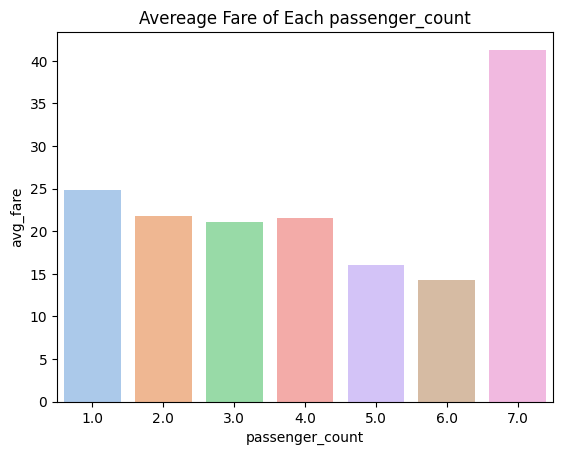

In [ ]:
# passenger_count and total_amount
df_passenger_count_total = df_use.groupby('passenger_count').agg(avg_fare=('total_amount', 'mean'),
                                                                 std_fare=('total_amount', 'std'))
df_passenger_count_total.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_passenger_count_total, x = 'passenger_count', y = 'avg_fare', palette=palette_color)

# Create title
plt.title('Avereage Fare of Each passenger_count')

# displaying chart
plt.show()

In [ ]:
# average fare of each passenger_count
df_passenger_count_total

,passenger_count,avg_fare,std_fare
0,1.0,24.806580,16.867571
1,2.0,21.801593,19.246736
2,3.0,21.124300,17.216317
3,4.0,21.562090,18.465922
4,5.0,16.070728,10.820569
5,6.0,14.308729,8.861169
6,7.0,41.300000,48.083261


In [ ]:
df_use['passenger_count'].value_counts()

1.0    72598
2.0     3760
5.0     1208
6.0     1015
3.0      593
4.0      177
7.0        2
Name: passenger_count, dtype: int64

In [ ]:
psg_dist = df_use.groupby(['passenger_count']).agg(avg_dist=('trip_distance', 'mean'))
psg_dist

,avg_dist
passenger_count,
1.0,5.014499
2.0,4.718513
3.0,4.179477
4.0,4.282768
5.0,2.919959
6.0,2.417044
7.0,6.725000


- Most of the customer uses taxi alone (passenger_Count = 1). Compared to passenger_count = 1 to assenger_count = 6, passenger_count = 1 has the highest avg_fare.
- If we compare the price of Taxi, distance and passenger_count, the price is more correlated with distance rather than passenger_count
- It'll be more cheap as the customer to use taxi with their friend or accompany, so they can share the price

#### RatecodeID vs total_amount

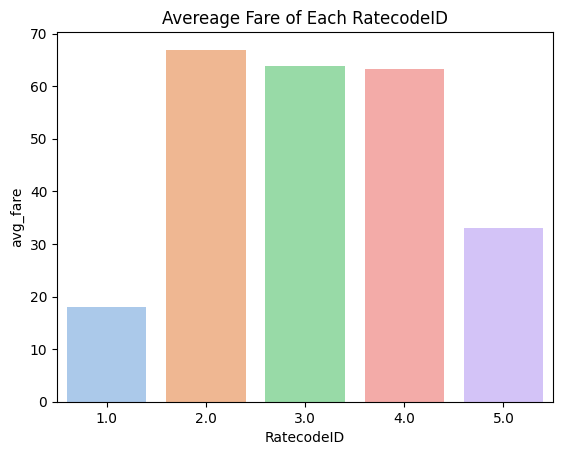

In [ ]:
# RatecodeID and total_amount
df_RatecodeID_total = df_use.groupby('RatecodeID').agg(avg_fare=('total_amount', 'mean'))
df_RatecodeID_total.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_RatecodeID_total, x = 'RatecodeID', y = 'avg_fare', palette=palette_color)

# Create title
plt.title('Avereage Fare of Each RatecodeID')

# displaying chart
plt.show()

In [ ]:
# Table of average fare in RatecodeID
df_RatecodeID_total

,RatecodeID,avg_fare
0,1.0,18.083037
1,2.0,66.931805
2,3.0,63.830588
3,4.0,63.231316
4,5.0,32.976996


In [ ]:
df_use['RatecodeID'].value_counts()

1.0    46312
5.0    32853
2.0      133
4.0       38
3.0       17
Name: RatecodeID, dtype: int64

Most of the customer use taxi for Standard Rate (RatecodeID = 1; Standard Rate) and/or Negotiated Fare (RatecodeID = 5; Negotiated Fare). Compared to RatecodeID 1 and 5, Ratecode = 2 (Trip To JFK Airport), Ratecode = 2 (Trip To Newark Airport), and Ratecode = 4 (Trip To Nassau County or Westchester County) has higher average fare.

#### payment_type vs total_amount

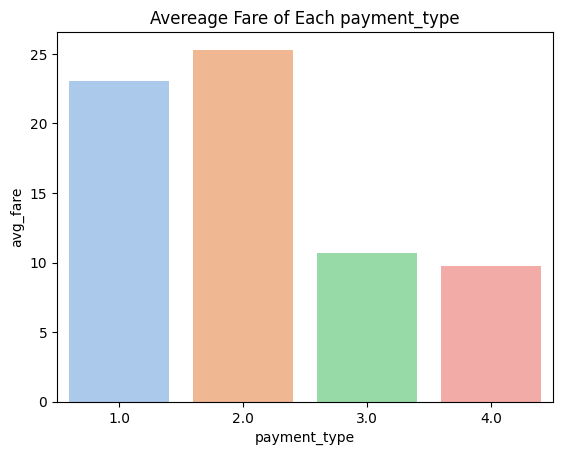

In [ ]:
# payment_type and total_amount
df_payment_type_total = df_use.groupby('payment_type').agg(avg_fare=('total_amount', 'mean'))
df_payment_type_total.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_payment_type_total, x = 'payment_type', y = 'avg_fare', palette=palette_color)

# Create title
plt.title('Avereage Fare of Each payment_type')

# displaying chart
plt.show()

In [ ]:
# Table of average fare in payment_type
df_payment_type_total

,payment_type,avg_fare
0,1.0,23.022399
1,2.0,25.297744
2,3.0,10.665333
3,4.0,9.734211


Payment Type 1 (Credit Card) and payment type 2 (Cash) has higher average fare compared to payment type 3 (No Charge) and Payment Type 4 (Dispute).

#### trip_type vs total_amount

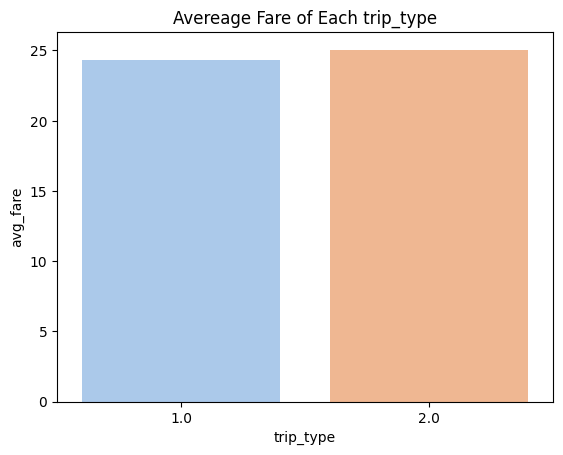

In [ ]:
# trip_type and total_amount
df_trip_type_total = df_use.groupby('trip_type').agg(avg_fare=('total_amount', 'mean'))
df_trip_type_total.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_trip_type_total, x = 'trip_type', y = 'avg_fare', palette=palette_color)

# Create title
plt.title('Avereage Fare of Each trip_type')

# displaying chart
plt.show()

In [ ]:
# Table of average fare in trip_type
df_trip_type_total

,trip_type,avg_fare
0,1.0,24.352935
1,2.0,25.061795


Average fare in trip_type 1 and trip_type 2 is not that much different

#### is_rushour vs total_amount

In this section we try to know what is the average fare of Taxi at Rush Hour

In [ ]:
# create column rush_hour
df_rush = df_use.copy()
df_rush.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


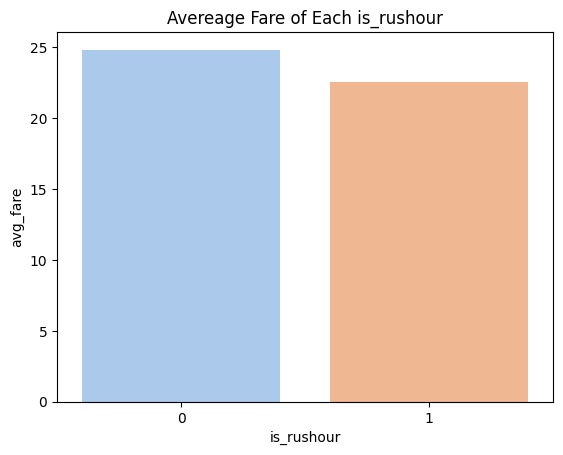

In [ ]:
# trip_extra and total_amount
df_rush_gb = df_rush.groupby('is_rushour').agg(avg_fare=('total_amount', 'mean'))
df_rush_gb.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_rush_gb, x = 'is_rushour', y = 'avg_fare', palette=palette_color)

# Create title
plt.title('Avereage Fare of Each is_rushour')

# displaying chart
plt.show()

In [ ]:
# Table of average fare in trip_type
df_rush_gb

,rush_hour_midnight,avg_fare
0,no,20.001887
1,yes,27.644002


- The average customer that using Taxi in Not Rush hour is higher than customer that in rush hour.

#### is_overnight vs total_amount

In this section we try to know what is the average fare of Taxi at Rush Hour

In [ ]:
# create column hour_ovnight
df_ovnight = df_use.copy()
df_ovnight.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


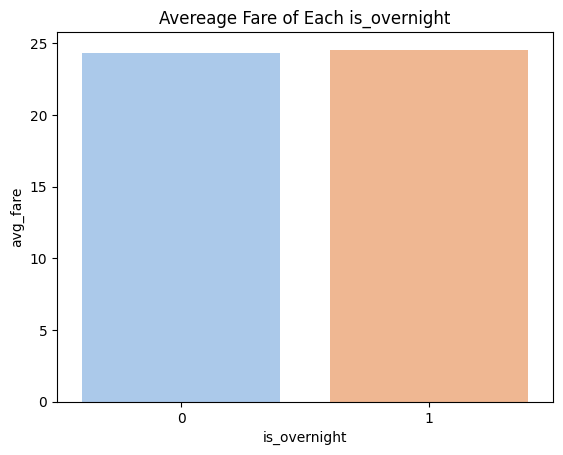

In [ ]:
# trip_extra and total_amount
df_ovnight_gb = df_ovnight.groupby('is_overnight').agg(avg_fare=('total_amount', 'mean'))
df_ovnight_gb.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_ovnight_gb, x = 'is_overnight', y = 'avg_fare', palette=palette_color)

# Create title
plt.title('Avereage Fare of Each is_overnight')

# displaying chart
plt.show()

In [ ]:
# Table of average fare in trip_type
df_ovnight_gb

,is_overnight,avg_fare
0,0,24.322480
1,1,24.550319


- The average customer that using Taxi at over night is higher than customer that is not.

Analysis Result
- passenger_count of 7 has the highest average_fare which is \$16.8 compare to other passenger_count of 1 which is \$41.3
- RatecodeID of 2 (Trip to JFK Airport) has the highest average_fare which is \$66.93 compareable to other trips
- payment_type of 2 has the highest fare which is \$25.29 compare to other payment type
- The average fare of trip_type 1 and 2 is not different that much, type 1 is \$24.35 and type 2 is \$25.06
- The average customer that using Taxi in Not Rush hour is higher than customer that in rush hour.
- The average customer that using Taxi in over night is higher than customer that is not.


##  EDA Multi Variable

### Correlation table

In [ ]:
df_use.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
# Create data dummy for RatecodeID

# Copy data
df_use_f = df_use.copy()

# create data dummy
ohe_RatecodeID = pd.get_dummies(df_use_f['RatecodeID'], prefix='rate_code_')

# concat data
df_use_f = pd.concat([df_use_f,ohe_RatecodeID],axis=1)

# Drop RatecodeID column
df_use_f.drop(['RatecodeID'],axis=1,inplace=True)

In [ ]:
# Create data dummy for payment_type

# # Copy data
# df_use_f = df_use.copy()

# create data dummy
ohe_payment_type = pd.get_dummies(df_use_f['payment_type'], prefix='pay_')

# concat data
df_use_f = pd.concat([df_use_f,ohe_payment_type],axis=1)

# Drop payment_type column
df_use_f.drop(['payment_type'],axis=1,inplace=True)

In [ ]:
df_use_f.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,is_overnight,rate_code__1.0,rate_code__2.0,rate_code__3.0,rate_code__4.0,rate_code__5.0,pay__1.0,pay__2.0,pay__3.0,pay__4.0
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,...,1,1,0,0,0,0,0,1,0,0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,...,1,1,0,0,0,0,0,1,0,0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,...,1,1,0,0,0,0,1,0,0,0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,...,1,1,0,0,0,0,0,1,0,0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
# create correlation table using data after one hot encoding
columns1 = ['passenger_count', 'trip_distance', 'fare_amount',
           'total_amount', 'trip_type',	'trip_time',
           'extra',	'mta_tax',	'tip_amount',	'tolls_amount',
            'improvement_surcharge', 'congestion_surcharge',
            'is_rushour',	'is_overnight',
            'rate_code__1.0',	'rate_code__2.0',
            'rate_code__3.0',	'rate_code__4.0',	'rate_code__5.0',
            'pay__1.0',	'pay__2.0',	'pay__3.0',	'pay__4.0']
corr1 = df_use_f[columns1].corr()

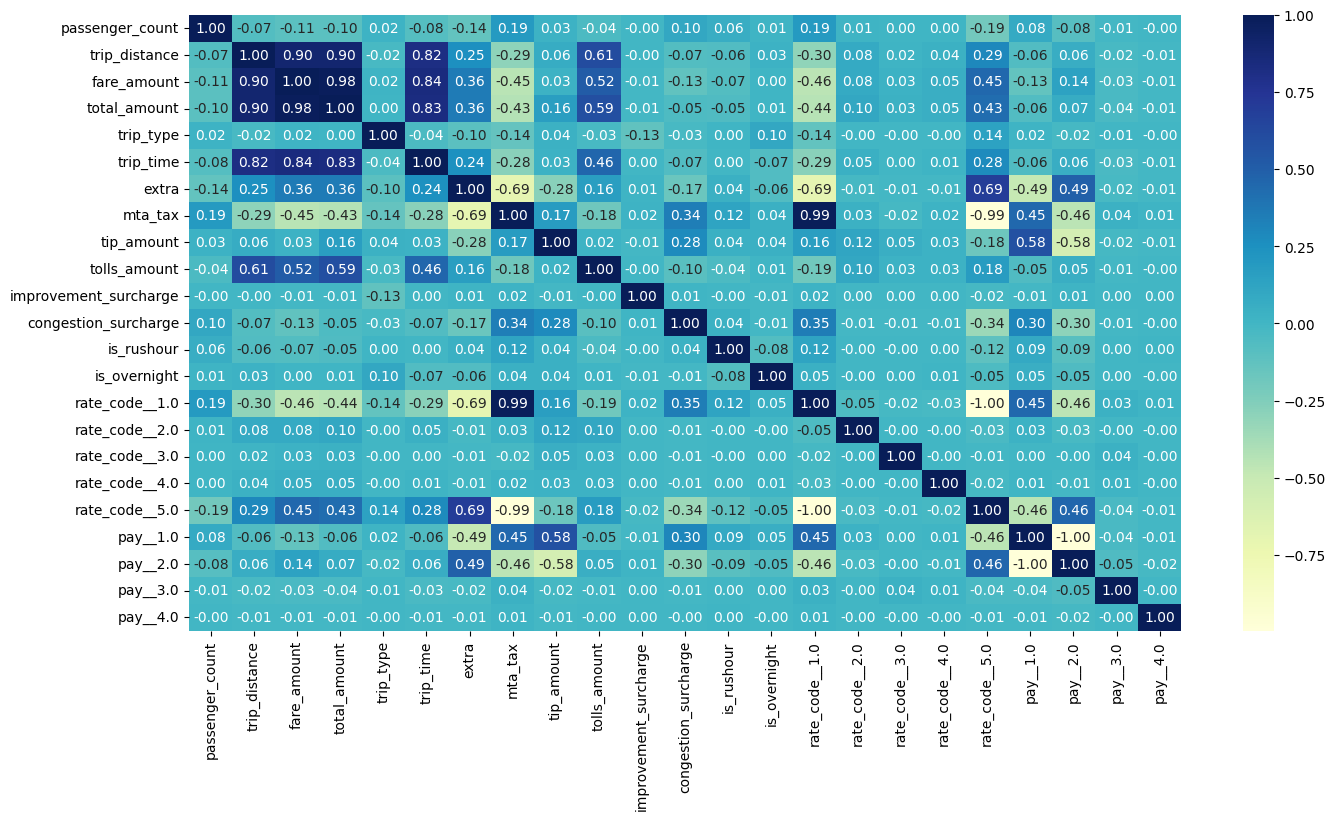

In [ ]:
# Create heatmap chart
plt.figure(figsize=(16, 8))
sns.heatmap(corr1, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [ ]:
# create correlation table
columns2 = ['RatecodeID', 'passenger_count', 'trip_distance', 'fare_amount',
           'total_amount', 'payment_type', 'trip_type',	'trip_time',
           'extra',	'mta_tax',	'tip_amount',	'tolls_amount',
            'improvement_surcharge', 'congestion_surcharge',
            'is_rushour',	'is_overnight']
corr2 = df_use[columns2].corr()

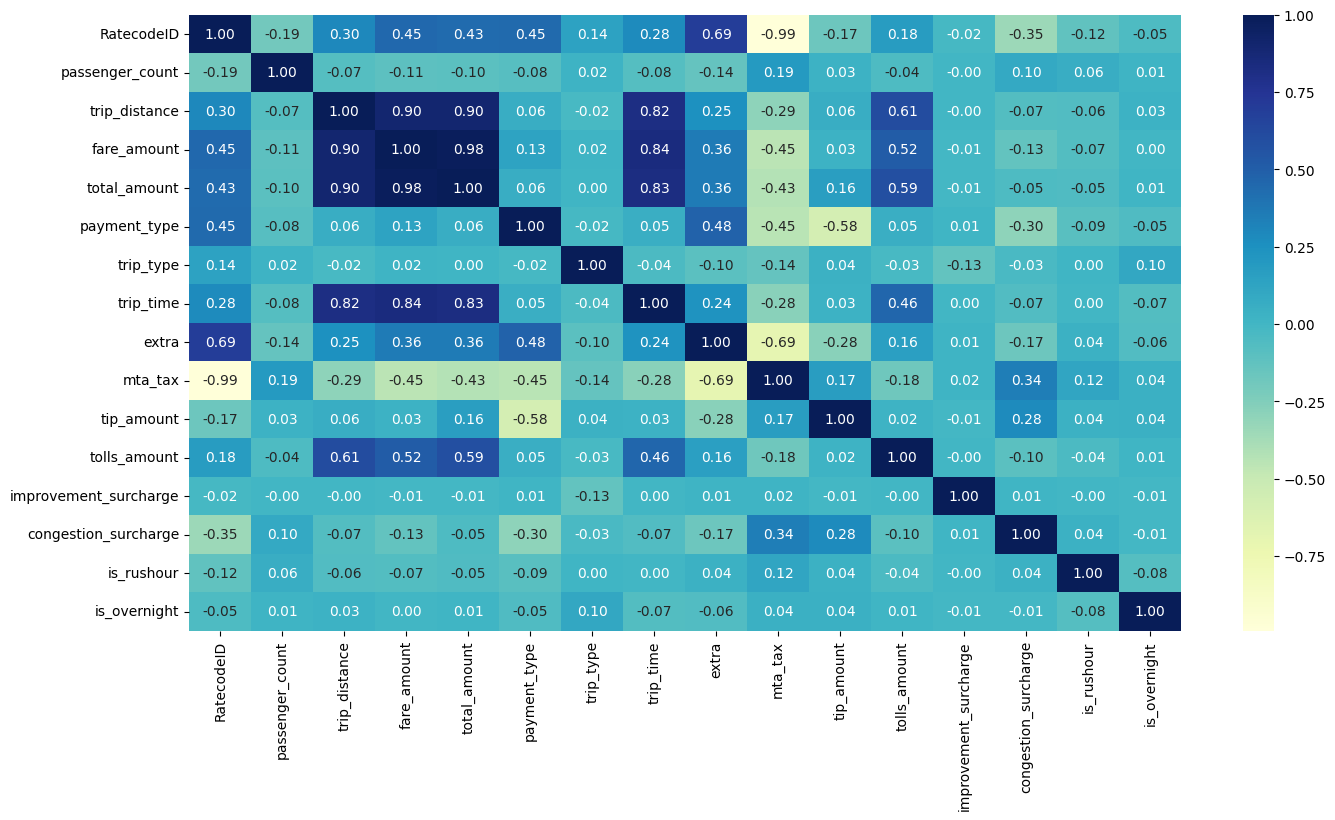

In [ ]:
# Create heatmap chart
plt.figure(figsize=(16, 8))
sns.heatmap(corr2, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

Analysis Result
- fare_amount and total_amount has a high correlation (0.98), that's because both columns represent almost the same thing (total_amount is sum of fare_amount and other charges). For linear regression only use total_amount as the dependent variable
- trip_distance and trip_time has moderate correlation (0.82). To avoid collinearity, only use one from both columns. For linear regression, consider using trip distance, because it has the highest correlation with total_amount (dependent variable) compare to trip_time
- mta_tax and RatecodeID has a high correlation (-0.99). To avoid collinearity, only use one from both columns. For linear regression, we will use RatecodeID

reference: https://www.stratascratch.com/blog/a-beginner-s-guide-to-collinearity-what-it-is-and-how-it-affects-our-regression-model/#:~:text=The%20first%20one%20is%20by,and%20thus%2C%20they%20are%20collinear.


Dependent Variable:
- total_amount

Independent Variable:

- Numerical:
  - trip_distance
  - passenger_count
  - extra
  - tip_amount
  - tolls_amount
  - improvement_surcharge
  - congestion_surcharge
  - is_rushour
  - is_overnight
- Categorical:
  - RatecodeID
  - payment_type
  - trip_type

### Compare average distance - fare - time - total order in each RatecodeID when the customer In rush hour

**Average Fare**

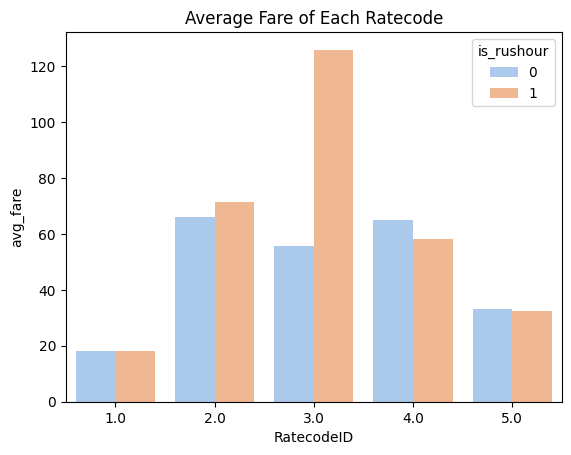

In [ ]:
# Compare average fare in each RatecodeID when the customer in rush hour

# fare, RatecodeID and is_rushour
df_avg_fare = df_use.groupby(['RatecodeID', 'is_rushour']).agg(avg_fare=('total_amount', 'mean'))
df_avg_fare.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_avg_fare, x = 'RatecodeID', y = 'avg_fare', hue = 'is_rushour',
            palette=palette_color)

# Create title
plt.title('Average Fare of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_avg_fare

,RatecodeID,is_rushour,avg_fare
0,1.0,0,18.013275
1,1.0,1,18.298406
2,2.0,0,65.885327
3,2.0,1,71.238462
4,3.0,0,55.560667
5,3.0,1,125.855000
6,4.0,0,64.848621
7,4.0,1,58.020000
8,5.0,0,33.093596
9,5.0,1,32.292368


**Total Order**

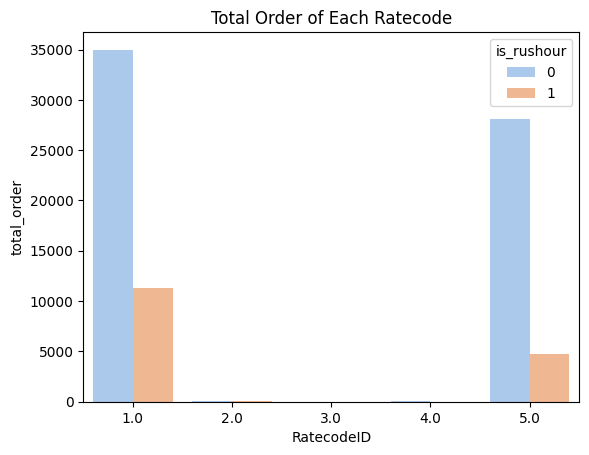

In [ ]:
# Compare total order in each RatecodeID when the customer in rush hour

# total_order, RatecodeID and payment_type
df_orders = df_use.groupby(['RatecodeID', 'is_rushour']).agg(total_order=('RatecodeID', 'count'))
df_orders.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_orders, x = 'RatecodeID', y = 'total_order', hue = 'is_rushour',
            palette=palette_color)

# Create title
plt.title('Total Order of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_orders

,RatecodeID,is_rushour,total_order
0,1.0,0,34981
1,1.0,1,11331
2,2.0,0,107
3,2.0,1,26
4,3.0,0,15
5,3.0,1,2
6,4.0,0,29
7,4.0,1,9
8,5.0,0,28072
9,5.0,1,4781


**Average Trip Distance**

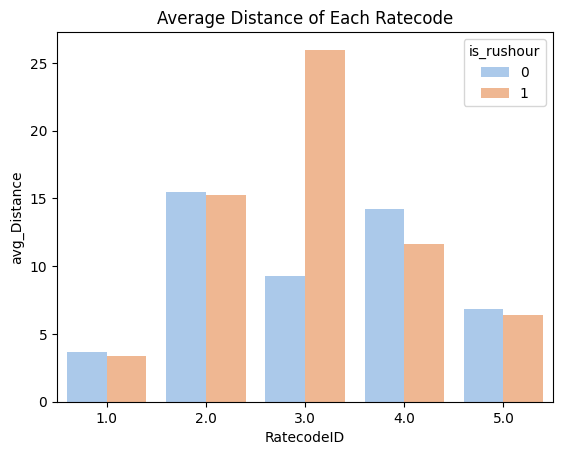

In [ ]:
# Compare average trip_distance in each RatecodeID when the customer in rush hour

# trip_distance, RatecodeID and payment_type
df_avg_dist = df_use.groupby(['RatecodeID', 'is_rushour']).agg(avg_Distance=('trip_distance', 'mean'))
df_avg_dist.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_avg_dist, x = 'RatecodeID', y = 'avg_Distance', hue = 'is_rushour',
            palette=palette_color)

# Create title
plt.title('Average Distance of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_avg_dist

,RatecodeID,is_rushour,avg_Distance
0,1.0,0,3.665375
1,1.0,1,3.347216
2,2.0,0,15.485514
3,2.0,1,15.293846
4,3.0,0,9.264000
5,3.0,1,25.980000
6,4.0,0,14.240000
7,4.0,1,11.613333
8,5.0,0,6.818828
9,5.0,1,6.418697


**Average Trip Time**

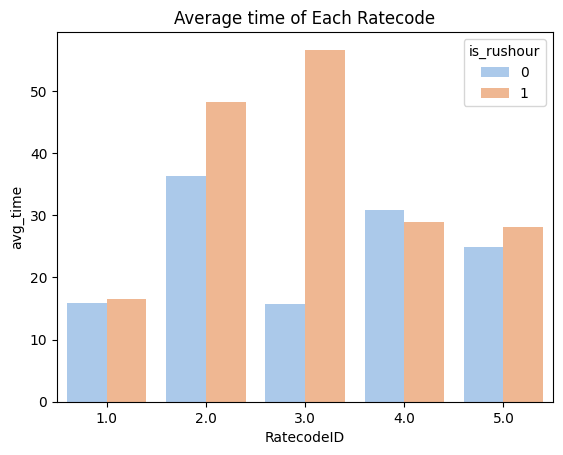

In [ ]:
# Compare average trip_time in each RatecodeID when the customer in rush hour

# trip_time, RatecodeID and payment_type
df_avg_time = df_use.groupby(['RatecodeID', 'is_rushour']).agg(avg_time=('trip_time', 'mean'))
df_avg_time.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_avg_time, x = 'RatecodeID', y = 'avg_time', hue = 'is_rushour',
            palette=palette_color)

# Create title
plt.title('Average time of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_avg_time

,RatecodeID,is_rushour,avg_time
0,1.0,0,15.932096
1,1.0,1,16.460886
2,2.0,0,36.374611
3,2.0,1,48.158974
4,3.0,0,15.692222
5,3.0,1,56.650000
6,4.0,0,30.860345
7,4.0,1,28.911111
8,5.0,0,24.855381
9,5.0,1,28.134243


Analysis Result

- Between RatecodeID 1 (Standard Rate) and RatecodeID 5 (Negotiated Fare)
  - On Average, customer that's on longer trip use RatecodeID 5
  - On average, a customer pays more (has higher fare) when using RatecodeID 5, that's also because they have a longer trip distance and longer trip time
  - Overall, the total order RatecodeID 1 is higher than RatecodeID 5
  - Overall customer prefer to use RatecodeID 1 on shorter distance and RatecodeID 5 on longer distance
  - In Rush Hour, Average Distance Ratecode 1 and Ratecode 5 is a little bit lower than when in not Rush Hour
  - But, when in Rush Hour, Average Time Trip Ratecode 1 and Ratecode 5 is higher than when in not Rush Hour
  - On average, the average fare is not that much different between in Rush Hour and not In Rush Hour

- Between RatecodeID 2 (Trip to JFK Airport), RatecodeID 3 (Trip to Newark Airport) and RatecodeID 4 (Trip To Nassau County or Westchester County)
  - On average, Trip to JFK (RatecodeID 2) and Trip to Newark Airport (RatecodeID 3) has higher average Fare and time trip in the rush hour
  - On Average, Trip To Nassau County or Westchester County(ratecodeID 4) has lower Average Fare and trip time when not in rush hour

### Compare average distance - fare - time - total order in each RatecodeID when the customer In overnight

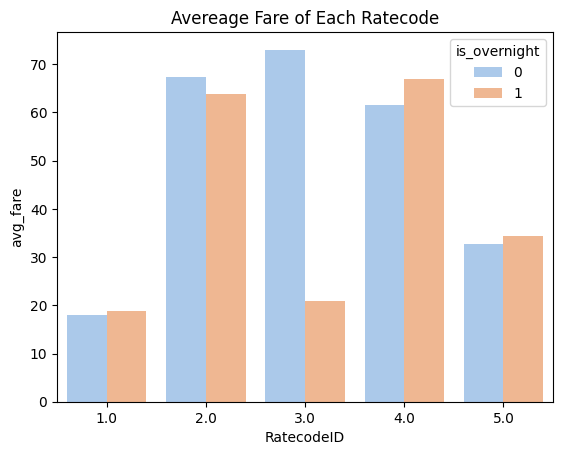

In [ ]:
# Compare average fare in each RatecodeID when the customer in overnight

# fare, RatecodeID and is_overnight
df_avg_fare = df_use.groupby(['RatecodeID', 'is_overnight']).agg(avg_fare=('total_amount', 'mean'))
df_avg_fare.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_avg_fare, x = 'RatecodeID', y = 'avg_fare', hue = 'is_overnight',
            palette=palette_color)

# Create title
plt.title('Avereage Fare of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_avg_fare

,RatecodeID,is_overnight,avg_fare
0,1.0,0,17.930970
1,1.0,1,18.728990
2,2.0,0,67.433158
3,2.0,1,63.923684
4,3.0,0,73.015714
5,3.0,1,20.966667
6,4.0,0,61.502308
7,4.0,1,66.977500
8,5.0,0,32.722579
9,5.0,1,34.357942


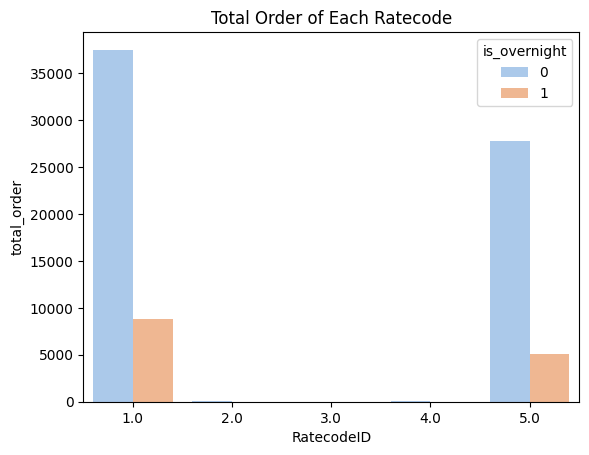

In [ ]:
# Compare total order in each RatecodeID when the customer in overnight

# Total Order, RatecodeID and payment_type
df_orders = df_use.groupby(['RatecodeID', 'is_overnight']).agg(total_order=('RatecodeID', 'count'))
df_orders.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_orders, x = 'RatecodeID', y = 'total_order', hue = 'is_overnight',
            palette=palette_color)

# Create title
plt.title('Total Order of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_orders

,RatecodeID,is_overnight,total_order
0,1.0,0,37487
1,1.0,1,8825
2,2.0,0,114
3,2.0,1,19
4,3.0,0,14
5,3.0,1,3
6,4.0,0,26
7,4.0,1,12
8,5.0,0,27742
9,5.0,1,5111


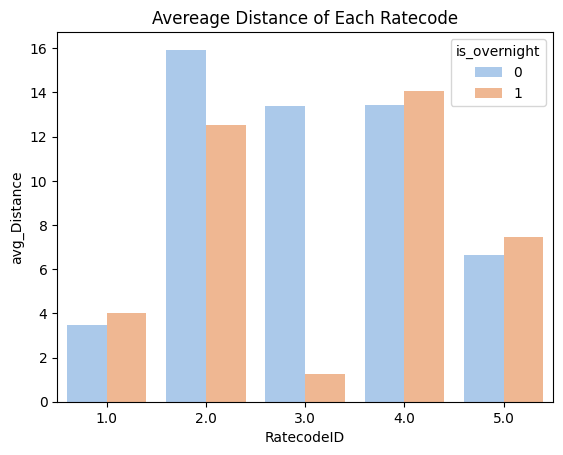

In [ ]:
# Compare average trip_distance in each RatecodeID when the customer in overnight

# trip_distance, RatecodeID and payment_type
df_avg_dist = df_use.groupby(['RatecodeID', 'is_overnight']).agg(avg_Distance=('trip_distance', 'mean'))
df_avg_dist.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_avg_dist, x = 'RatecodeID', y = 'avg_Distance', hue = 'is_overnight',
            palette=palette_color)

# Create title
plt.title('Avereage Distance of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_avg_dist

,RatecodeID,is_overnight,avg_Distance
0,1.0,0,3.481428
1,1.0,1,4.038245
2,2.0,0,15.932982
3,2.0,1,12.538421
4,3.0,0,13.372857
5,3.0,1,1.233333
6,4.0,0,13.418846
7,4.0,1,14.049167
8,5.0,0,6.635898
9,5.0,1,7.437456


**Average Trip Time**

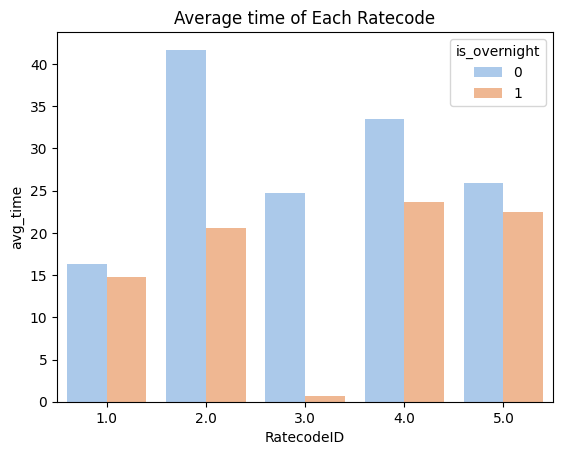

In [ ]:
# Compare average trip_time in each RatecodeID when the customer in overnight

# trip_time, RatecodeID and payment_type
df_avg_time = df_use.groupby(['RatecodeID', 'is_overnight']).agg(avg_time=('trip_time', 'mean'))
df_avg_time.reset_index(inplace=True)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
sns.barplot(df_avg_time, x = 'RatecodeID', y = 'avg_time', hue = 'is_overnight',
            palette=palette_color)

# Create title
plt.title('Average time of Each Ratecode')

# displaying chart
plt.show()

In [ ]:
df_avg_time

,RatecodeID,is_overnight,avg_time
0,1.0,0,16.359526
1,1.0,1,14.795398
2,2.0,0,41.695175
3,2.0,1,20.577193
4,3.0,0,24.751190
5,3.0,1,0.722222
6,4.0,0,33.528846
7,4.0,1,23.616667
8,5.0,0,25.852198
9,5.0,1,22.511919


Analysis Result

- Between RatecodeID 1 (Standard Rate) and RatecodeID 5 (Negotiated Fare)
  - On Average, customer that's on longer trip use RatecodeID 5
  - On average, a customer pays more (has higher fare) when using RatecodeID 5, that's also because they have a longer trip distance and longer trip time
  - Overall, the total order RatecodeID 1 is higher than RatecodeID 5
  - Overall customer prefer to use RatecodeID 1 on shorter distance and RatecodeID 5 on longer distance
  - In Overnight, Average Distance Ratecode 1 and Ratecode 5 is a little bit higher than when in not Overnight
  - But, when in Overnight, Average Time Trip Ratecode 1 and Ratecode 5 is lower than when in not Overnight
  - On Average, the average fare in overnight is higher than when in not overnight

- Between RatecodeID 2 (Trip to JFK Airport), RatecodeID 3 (Trip to Newark Airport) and RatecodeID 4 (Trip To Nassau County or Westchester County)
  - On average, Trip to JFK (RatecodeID 2) and Trip to Newark Airport (RatecodeID 3) has lower average Fare, trip distance and time trip in the Overnight
  - On Average, Trip To Nassau County or Westchester County(ratecodeID 4) has higher Average Fare and distance when in Overnight

### Conclusion on Trip in Rush Hour and Overnight

- If you want to use NYC Taxi with shorter distance, use RatecodeID 1 (Standard Rate)
- If you want to use NYC Taxi with long distance, use RatecodeID 5 (Negotiated Fare)
- Between RatecodeID 1 and Ratecode 5, it'll be cheaper to use it in Rush Hour compared to use it in Over Night
- Between Trip To JFK Airport and Newark Airport, it'll be cheaper to use it in Over Night rather than in Rush Hour

# Hypotesis Testing

**Statistical Inference**
- Statistical inference is about making inference about population from sample data
  - Statistical Test
  - Confidence Interval
- Statistical test need hypothesis, is what we can claim from data.
  - Null hyphotesis ($H_0$): Condition that associate with default action
  - Alternative hyphotesis ($H_1$): Condition that we want to test to do new action
- Test Statistics is a sample statistic that estimates a population of parameters determined by hypotheses
- Significance Level ($\alpha$): a value of probability falsely rejecting $H_0$ (Type I Error)
  - The smaller alpha, the smaller chance of rejecting $H_0$
- Type of test
     - One Sided (Right)
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta > \theta_0]$$
     - One sided (Left)
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta < \theta_0]$$
     - Two Sided
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta \neq \theta_0]$$
      
- Confidence Interval is a range of parameter values is roughly consistent with the data in a sample.


## **Information about Two-Sample t-test**

- Statistics Test
  - Define Null and Alternative Hypothesis
  - Compute two-sample t-test if population standard deviation is unknown or either the number of each sample doesn't greater than 30
$$ t = \frac{\bar{x}_1-\bar{x}_2-D_0}{\sqrt{(s_1^2+s_2^2)(\frac{1}{n_1}+\frac{1}{n_2})}} $$
  - Make Decision based on alpha and type of test
      - Compare statistics test and critical value
          - One-tailed (lower), t-test $<$ t-crit ; reject $H_0$
          - One-tailed (greater), t-test $>$ t-crit ; reject $H_0$
          - Two-tailed, z-test $>$ t-crit or t-test $<$ -t-crit; reject $H_0$
      - Compare p-value and significance level ($\alpha$)
          - pvalue  $<\alpha$ ; reject h0
  
- Confidence Interval of two-sample t-test for proportions. The 100(1-$\alpha$) Confidence interval for two-sample proportion differnce is
$$ \bar{x_1}-\bar{x_2} \pm t_{\alpha/2}\sqrt{(s_1^2+s_2^2)(\frac{1}{n_1}+\frac{1}{n_2})}$$

The t-Test Paired Two Sample for Means does not assume that the variances of both populations are equal. (https://www.solver.com/t-test-paired-two-sample-means)

Notes:
- Difference between z-test and t-test:
  - https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/#:~:text=A.,the%20population%20variance%20is%20unknown.
  - https://vitalflux.com/when-to-use-z-test-vs-t-test-differences-examples/
- Supplement about t-test: https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%20test%20is%20a,are%20different%20from%20one%20another.
- Assumption Homogenity of Variance: https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/


### Test on average fare of Ratecode 1 and 5
Test if the Average of Fare from Ratecode 1 and 5 and the distance above 5 miles are equal or not


#### Create Data Sample & Pre analysis

In [ ]:
df_use.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
# Create Data Sample

df_hipot = df_use.copy()
df_code1 = df_hipot[(df_hipot['RatecodeID'] == 1) & (df_hipot['trip_distance'] > 5)]
df_code1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8682 entries, 1 to 47734
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   8682 non-null   datetime64[ns]
 1   lpep_dropoff_datetime  8682 non-null   datetime64[ns]
 2   RatecodeID             8682 non-null   float64       
 3   passenger_count        8682 non-null   float64       
 4   trip_distance          8682 non-null   float64       
 5   fare_amount            8682 non-null   float64       
 6   extra                  8682 non-null   float64       
 7   mta_tax                8682 non-null   float64       
 8   tip_amount             8682 non-null   float64       
 9   tolls_amount           8682 non-null   float64       
 10  improvement_surcharge  8682 non-null   float64       
 11  total_amount           8682 non-null   float64       
 12  payment_type           8682 non-null   float64       
 13  tr

In [ ]:
df_code1['total_amount'].describe()

count    8682.000000
mean       41.597404
std        19.793716
min         3.300000
25%        27.550000
50%        34.775000
75%        50.287500
max       172.600000
Name: total_amount, dtype: float64

In [ ]:
df_code5 = df_hipot[(df_hipot['RatecodeID'] == 5) & (df_hipot['trip_distance'] > 5)]
df_code5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16398 entries, 21 to 79352
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   16398 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  16398 non-null  datetime64[ns]
 2   RatecodeID             16398 non-null  float64       
 3   passenger_count        16398 non-null  float64       
 4   trip_distance          16398 non-null  float64       
 5   fare_amount            16398 non-null  float64       
 6   extra                  16398 non-null  float64       
 7   mta_tax                16398 non-null  float64       
 8   tip_amount             16398 non-null  float64       
 9   tolls_amount           16398 non-null  float64       
 10  improvement_surcharge  16398 non-null  float64       
 11  total_amount           16398 non-null  float64       
 12  payment_type           16398 non-null  float64       
 13  

In [ ]:
df_code5['total_amount'].describe()

count    16398.000000
mean        43.076356
std         14.322607
min          2.300000
25%         32.500000
50%         39.760000
75%         51.367500
max        207.480000
Name: total_amount, dtype: float64

#### Define Null & Alternate Hypothesis

- What to prove: **average fare** of NYC Taxi from RatecodeID 5 with trip distance above 5 miles has bigger average fare than RatecodeID 1 with trip distance above 5 miles.
- Let $\mu_A$ is the average of RatecodeID 5 with trip distance above 5 miles and $\mu_B$ is the average of RatecodeID 1 with trip distance above 5 miles

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level
- Then we state Null hypothesis ($H_0$) as status quo, where we shouldn't do anything and have no data
 - $H_0$: The Average of total_amount (fare) of order between RatecodeID 1 and 5 are equal
$$ H_0:\mu_A = \mu_B $$
- Alternative hypothesis ($H_1$) is the opposite claim from null hypothesis
  - $H_1$:  The Average of total_amount (fare) of order between RatecodeID 1 and 5 are not equal
$$ H_1:\mu_A > \mu_B $$

- Set siginificance level (alpha)
 - Significance level = 0.05

In [ ]:
# iniziation alpha
alpha = 0.05

#### Statistical Test

- Although we have large samples (both samples have more than 30 observations), we don't know about the population standard deviation ($\sigma$), so we use t-test instead of z-test
- Before conducting the two-sample t-test we need to find if the given data groups have the same variance.

In [ ]:
# Group A: Order RatecodeID 5
group_a = df_code5['total_amount'].values

# Group B: Order RatecodeID 1
group_b = df_code1['total_amount'].values

# variance
np.var(group_a), np.var(group_b)

(205.12456399479888, 391.74608111981024)

- Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value using spicy library.
- The t-Test Paired Two Sample for Means does not assume that the variances of both populations are equal. (https://www.solver.com/t-test-paired-two-sample-means)

*   To calculate two sample mean t test, we can use stats.ttest_ind
1. import library
  - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
  - `a`: First data group
  - `b`: Second data group
  - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
  - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.
  - `alternative`:
    - ‘two-sided’: the means of the distributions underlying the samples are unequal.
    - ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.
    - ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.
3.The function will be able to return 2 output, namely statistic test and p_value.

In [ ]:
# Statistical Test
from scipy import stats
result = stats.ttest_ind(a = group_a,
                         b = group_b,
                         equal_var=False,
                         alternative = "greater")

In [ ]:
# result p value
result.pvalue

3.7317509980191815e-10

In [ ]:
# result statistical test
result.statistic

6.160338437204858

In [ ]:
# Decide
if result.pvalue<0.05:
    print("Reject the null hypothesis | Two group means are different (Reject H0)")
else:
    print("Failed to reject the Null hypothesis | Two group means are equal")

Reject the null hypothesis | Two group means are different (Reject H0)


Degree of freedom from two-samples

In [ ]:
df_data = len(group_a)+len(group_b)-2
df_data

25078

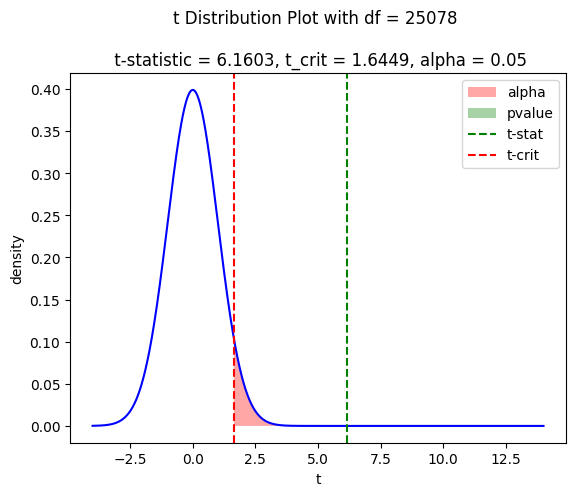

In [ ]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

There is enough evidence that the average of fare between Ratecode is 1 and Ratecode is 5 when the distance above 5 miles is not equal

After that, we will compute confidence level for the difference in means



*   To calculate confidence interval for the difference in means, we can use CompareMeans
1. import library
  - from statsmodels.stats.weightstats import DescrStatsW,[CompareMeans](https://https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.tconfint_diff.html#statsmodels.stats.weightstats.CompareMeans.tconfint_diff)
2. Use function `CompareMeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')`

  `alpha` = significance level for the confidence interval

  `alternative` = It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to value, we use `two-sided`
    - if $H_1$ is larger than value, we use `larger`
    - if $H_1$ is smaller than value, we use `smaller`
  
  `usevar` = ‘pooled’ or ‘unequal’
  - `pooled` indicates that the standard deviation of the samples is assumed to be the same.
  - `unequal` shows that Welch ttest with Satterthwait degrees of freedom is used.
3. The function will return lower and upper limits of the confidence interval


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=group_b),
                  d2 = DescrStatsW(data=group_a))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 1.0083693044439497 1.9495355734670698 ]


Based on the result, we can 95% confident that the average difference the average fare in RatecodeID 1 and RatecodeID 5 lies between \$1 and \$1.95



#### Conclusion
- As the p value < alpha(0.05) , we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 1 and Ratecode of 5 when the distance above 5 miles is not equal
  - The average fare of Ratecode 5 is higher
  - That's because they tend to have more distance

- We can be 95% confidence that the difference between average fare of RatecodeId = 5 and RatecodeID = 1 above 5 miles lies between 1 us dollar and 1.94 us dollar. Therefore, we can say that order Taxi using Ratecode = 5 has higher average fare.

### Test on average fare of Ratecode 1 when in rush hour and not in rush hour
Test if the Average of Fare from Ratecode 1 has difference in Rush Hour and not in Rush Hour

#### Create Data Sample & Pre analysis

In [ ]:
df_hipot.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
# Create Data Sample

# df_hipot = df_use.copy()
df_rush = df_hipot[(df_hipot['RatecodeID'] == 1) & (df_hipot['is_rushour'] == 1)]
df_rush.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 1019 to 46032
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   11331 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  11331 non-null  datetime64[ns]
 2   RatecodeID             11331 non-null  float64       
 3   passenger_count        11331 non-null  float64       
 4   trip_distance          11331 non-null  float64       
 5   fare_amount            11331 non-null  float64       
 6   extra                  11331 non-null  float64       
 7   mta_tax                11331 non-null  float64       
 8   tip_amount             11331 non-null  float64       
 9   tolls_amount           11331 non-null  float64       
 10  improvement_surcharge  11331 non-null  float64       
 11  total_amount           11331 non-null  float64       
 12  payment_type           11331 non-null  float64       
 13

In [ ]:
df_rush['total_amount'].describe()

count    11331.000000
mean        18.298406
std         13.853374
min          3.800000
25%          9.960000
50%         14.050000
75%         21.060000
max        120.720000
Name: total_amount, dtype: float64

In [ ]:
df_not_rush = df_hipot[(df_hipot['RatecodeID'] == 1) & (df_hipot['is_rushour'] == 0)]
df_not_rush.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34981 entries, 0 to 47739
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   34981 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  34981 non-null  datetime64[ns]
 2   RatecodeID             34981 non-null  float64       
 3   passenger_count        34981 non-null  float64       
 4   trip_distance          34981 non-null  float64       
 5   fare_amount            34981 non-null  float64       
 6   extra                  34981 non-null  float64       
 7   mta_tax                34981 non-null  float64       
 8   tip_amount             34981 non-null  float64       
 9   tolls_amount           34981 non-null  float64       
 10  improvement_surcharge  34981 non-null  float64       
 11  total_amount           34981 non-null  float64       
 12  payment_type           34981 non-null  float64       
 13  t

In [ ]:
df_not_rush['total_amount'].describe()

count    34981.000000
mean        18.013275
std         15.385897
min          3.300000
25%          8.800000
50%         13.300000
75%         20.760000
max        172.600000
Name: total_amount, dtype: float64

#### Define Null & Alternate Hypothesis

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: The Average of fare_amount of RatecodeID 1 When In Rush Hour and Not In Rush Hour equal
$$ H_0:\mu_A = \mu_B $$

$H_1$:  The Average of fare_amount of RatecodeID 1 When In Rush Hour and Not In Rush Hour are not equal
$$ H_1:\mu_A > \mu_B $$

Significance level = 0.05

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### Statistical Test

- Although we have large samples (both samples have more than 30 observations), we don't know about the population standard deviation ($\sigma$), so we use t-test instead of z-test
- Before conducting the two-sample t-test we need to find if the given data groups have the same variance.

In [ ]:
# Group A: Order RatecodeID 1 and Rush Hour
group_a = df_rush['total_amount'].values

# Group B: Order RatecodeID 1 and Not Rush Hour
group_b = df_not_rush['total_amount'].values

# variance
np.var(group_a), np.var(group_b)

(191.899044922331, 236.71906991394144)

- Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value using spicy library.
- The t-Test Paired Two Sample for Means does not assume that the variances of both populations are equal. (https://www.solver.com/t-test-paired-two-sample-means)

*   To calculate two sample mean t test, we can use stats.ttest_ind
1. import library
  - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
  - `a`: First data group
  - `b`: Second data group
  - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
  - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.
  - `alternative`:
    - ‘two-sided’: the means of the distributions underlying the samples are unequal.
    - ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.
    - ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.
3.The function will be able to return 2 output, namely statistic test and p_value.

In [ ]:
# Statistical Test
from scipy import stats
result2 = stats.ttest_ind(a = group_a,
                         b = group_b,
                         equal_var=False,
                         alternative = "greater")

In [ ]:
# result p value
result2.pvalue

0.03202363159486184

In [ ]:
# result statistical test
result2.statistic

1.8519478966398366

In [ ]:
# Decide
if result2.pvalue<0.05:
    print("Reject the null hypothesis | Two group means are different (Reject H0)")
else:
    print("Failed to reject the Null hypothesis | Two group means are equal")

Reject the null hypothesis | Two group means are different (Reject H0)


Degree of freedom from two-samples

In [ ]:
df_data = len(group_a)+len(group_b)-2
df_data

46310

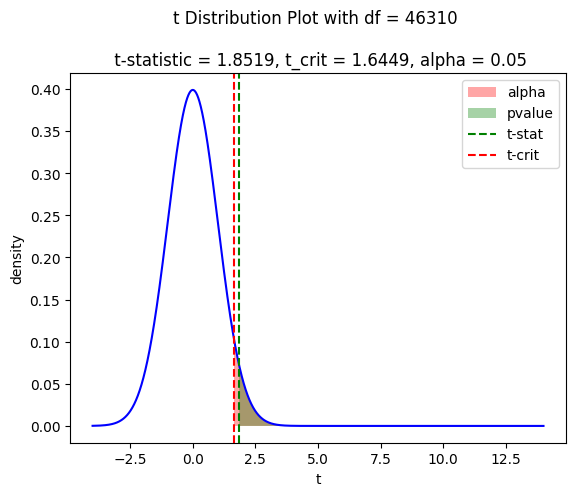

In [ ]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result2.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result2.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result2.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

There is enough evidence that the average of fare between Ratecode is 1 in Rush Hour and Not In Rush Hour is not equal

After that, we will compute confidence level for the difference in means



*   To calculate confidence interval for the difference in means, we can use CompareMeans
1. import library
  - from statsmodels.stats.weightstats import DescrStatsW,[CompareMeans](https://https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.tconfint_diff.html#statsmodels.stats.weightstats.CompareMeans.tconfint_diff)
2. Use function `CompareMeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')`

  `alpha` = significance level for the confidence interval

  `alternative` = It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to value, we use `two-sided`
    - if $H_1$ is larger than value, we use `larger`
    - if $H_1$ is smaller than value, we use `smaller`
  
  `usevar` = ‘pooled’ or ‘unequal’
  - `pooled` indicates that the standard deviation of the samples is assumed to be the same.
  - `unequal` shows that Welch ttest with Satterthwait degrees of freedom is used.
3. The function will return lower and upper limits of the confidence interval


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=group_b),
                  d2 = DescrStatsW(data=group_a))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -0.5869096323554532 0.016647760554025393 ]


Based on the result, we can 95% confident that the average difference the average fare in RatecodeID 1 when in Rush Hour and Not in Rush Hour lies between \-$0.586 and \$0.0166


#### Conclusion
- As the p value < alpha(0.05), we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 1 in Rush Hour and not in Rush Hour is not equal
  - The average fare of Ratecode 1 in Rush Hour is higher

- We can be 95% confidence that the difference between average fare of RatecodeId = 1 in Rush Hour and Not In Rush Hour lies between -0.586 US dollar and 0.0166 US dollar. Therefore, we can say that order Taxi using Ratecode = 1 in Rush Hour has higher average fare compared to not in Rush Hour.

### Test on average fare of Ratecode 1 when in Over Night and in Rush Hour
Test if the Average of Fare from Ratecode 1 has difference in Over Night and in Rush Hour

#### Create Data Sample & Pre analysis

In [ ]:
df_hipot.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
# Create Data Sample

# df_hipot = df_use.copy()
df_rush = df_hipot[(df_hipot['RatecodeID'] == 1) & (df_hipot['is_rushour'] == 1)]
df_rush.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11331 entries, 1019 to 46032
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   11331 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  11331 non-null  datetime64[ns]
 2   RatecodeID             11331 non-null  float64       
 3   passenger_count        11331 non-null  float64       
 4   trip_distance          11331 non-null  float64       
 5   fare_amount            11331 non-null  float64       
 6   extra                  11331 non-null  float64       
 7   mta_tax                11331 non-null  float64       
 8   tip_amount             11331 non-null  float64       
 9   tolls_amount           11331 non-null  float64       
 10  improvement_surcharge  11331 non-null  float64       
 11  total_amount           11331 non-null  float64       
 12  payment_type           11331 non-null  float64       
 13

In [ ]:
df_rush['total_amount'].describe()

count    11331.000000
mean        18.298406
std         13.853374
min          3.800000
25%          9.960000
50%         14.050000
75%         21.060000
max        120.720000
Name: total_amount, dtype: float64

In [ ]:
df_ovnight = df_hipot[(df_hipot['RatecodeID'] == 1) & (df_hipot['is_overnight'] == 1)]
df_ovnight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8825 entries, 0 to 47739
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   8825 non-null   datetime64[ns]
 1   lpep_dropoff_datetime  8825 non-null   datetime64[ns]
 2   RatecodeID             8825 non-null   float64       
 3   passenger_count        8825 non-null   float64       
 4   trip_distance          8825 non-null   float64       
 5   fare_amount            8825 non-null   float64       
 6   extra                  8825 non-null   float64       
 7   mta_tax                8825 non-null   float64       
 8   tip_amount             8825 non-null   float64       
 9   tolls_amount           8825 non-null   float64       
 10  improvement_surcharge  8825 non-null   float64       
 11  total_amount           8825 non-null   float64       
 12  payment_type           8825 non-null   float64       
 13  tr

In [ ]:
df_ovnight['total_amount'].describe()

count    8825.000000
mean       18.728990
std        15.742987
min         3.300000
25%         9.300000
50%        13.550000
75%        21.360000
max       117.720000
Name: total_amount, dtype: float64

#### Define Null & Alternate Hypothesis

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: The Average of fare_amount of RatecodeID 1 When In Overnight and In Rush Hour are equal
$$ H_0:\mu_A = \mu_B $$

$H_1$:  The Average of fare_amount of RatecodeID 1 When In Overnight and In Rush Hour are not equal
$$ H_1:\mu_A > \mu_B $$

Significance level = 0.05

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### Statistical Test

- Although we have large samples (both samples have more than 30 observations), we don't know about the population standard deviation ($\sigma$), so we use t-test instead of z-test
- Before conducting the two-sample t-test we need to find if the given data groups have the same variance.

In [ ]:
# Group A: Order RatecodeID 1 and Over Night
group_a = df_ovnight['total_amount'].values

# Group B: Order RatecodeID 1 and Rush Hour
group_b = df_rush['total_amount'].values

# variance
np.var(group_a), np.var(group_b)

(247.81356320727264, 191.899044922331)

- Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value using spicy library.
- The t-Test Paired Two Sample for Means does not assume that the variances of both populations are equal. (https://www.solver.com/t-test-paired-two-sample-means)

*   To calculate two sample mean t test, we can use stats.ttest_ind
1. import library
  - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
  - `a`: First data group
  - `b`: Second data group
  - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
  - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.
  - `alternative`:
    - ‘two-sided’: the means of the distributions underlying the samples are unequal.
    - ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.
    - ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.
3.The function will be able to return 2 output, namely statistic test and p_value.

In [ ]:
# Statistical Test
from scipy import stats
result3 = stats.ttest_ind(a = group_a,
                         b = group_b,
                         equal_var=False,
                         alternative = "greater")

In [ ]:
# result p value
result3.pvalue

0.021220661790782306

In [ ]:
# result statistical test
result3.statistic

2.029313527632967

In [ ]:
# Decide
if result3.pvalue<0.05:
    print("Reject the null hypothesis | Two group means are different (Reject H0)")
else:
    print("Failed to reject the Null hypothesis | Two group means are equal")

Reject the null hypothesis | Two group means are different (Reject H0)


Degree of freedom from two-samples

In [ ]:
df_data = len(group_a)+len(group_b)-2
df_data

20154

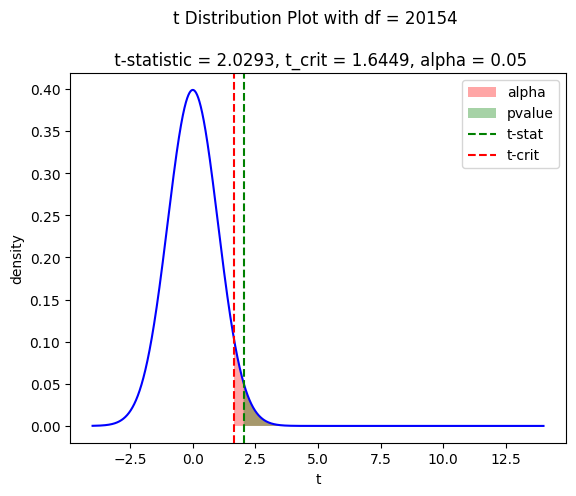

In [ ]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result3.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result3.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result3.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

There is enough evidence that the average of fare between Ratecode is 1 in Over Night and In Rush Hour is not equal

After that, we will compute confidence level for the difference in means



*   To calculate confidence interval for the difference in means, we can use CompareMeans
1. import library
  - from statsmodels.stats.weightstats import DescrStatsW,[CompareMeans](https://https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.tconfint_diff.html#statsmodels.stats.weightstats.CompareMeans.tconfint_diff)
2. Use function `CompareMeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')`

  `alpha` = significance level for the confidence interval

  `alternative` = It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to value, we use `two-sided`
    - if $H_1$ is larger than value, we use `larger`
    - if $H_1$ is smaller than value, we use `smaller`
  
  `usevar` = ‘pooled’ or ‘unequal’
  - `pooled` indicates that the standard deviation of the samples is assumed to be the same.
  - `unequal` shows that Welch ttest with Satterthwait degrees of freedom is used.
3. The function will return lower and upper limits of the confidence interval


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=group_b),
                  d2 = DescrStatsW(data=group_a))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -0.8464821989336769 -0.014686252727857174 ]


Based on the result, we can 95% confident that the average difference the average fare in RatecodeID 1 when in Over Night and in Rush Hour lies between \-$0.846 and -\$0.0147


#### Conclusion
- As the p value < alpha(0.05), we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 1 in Over Night and in Rush Hour is not equal
  - The average fare of Ratecode 1 in Over Night is higher

- We can be 95% confidence that the difference between average fare of RatecodeId = 1 in Over Night and In Rush Hour lies between -0.846 US dollar and -0.0147 US dollar. Therefore, we can say that order Taxi using Ratecode = 1 in Over Night has higher average fare compared to in Rush Hour.

### Test on average fare of Ratecode 2 (Trip to JFK) when in Over Night and in Rush Hour
Test if the Average of Fare from Ratecode 2 (Trip to JFK) has difference in Over Night and in Rush Hour

#### Create Data Sample & Pre analysis

In [ ]:
df_hipot.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_time,weekday,hour,is_rushour,is_overnight
0,2021-07-01 00:30:52,2021-07-01 00:35:36,1.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0,4.733333,3,0,0,1
1,2021-07-01 00:25:36,2021-07-01 01:01:31,1.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0,35.916667,3,0,0,1
2,2021-07-01 00:05:58,2021-07-01 00:12:00,1.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0,6.033333,3,0,0,1
3,2021-07-01 00:41:40,2021-07-01 00:47:23,1.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0,5.716667,3,0,0,1
4,2021-07-01 00:51:32,2021-07-01 00:58:46,1.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0,7.233333,3,0,0,1


In [ ]:
# Create Data Sample

# df_hipot = df_use.copy()
df_2_rush = df_hipot[(df_hipot['RatecodeID'] == 2) & (df_hipot['is_rushour'] == 1)]
df_2_rush.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1098 to 45537
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   26 non-null     datetime64[ns]
 1   lpep_dropoff_datetime  26 non-null     datetime64[ns]
 2   RatecodeID             26 non-null     float64       
 3   passenger_count        26 non-null     float64       
 4   trip_distance          26 non-null     float64       
 5   fare_amount            26 non-null     float64       
 6   extra                  26 non-null     float64       
 7   mta_tax                26 non-null     float64       
 8   tip_amount             26 non-null     float64       
 9   tolls_amount           26 non-null     float64       
 10  improvement_surcharge  26 non-null     float64       
 11  total_amount           26 non-null     float64       
 12  payment_type           26 non-null     float64       
 13  t

In [ ]:
df_2_rush['total_amount'].describe()

count     26.000000
mean      71.238462
std       10.707815
min       52.800000
25%       63.850000
50%       72.850000
75%       76.620000
max      103.850000
Name: total_amount, dtype: float64

<Axes: xlabel='total_amount', ylabel='Density'>

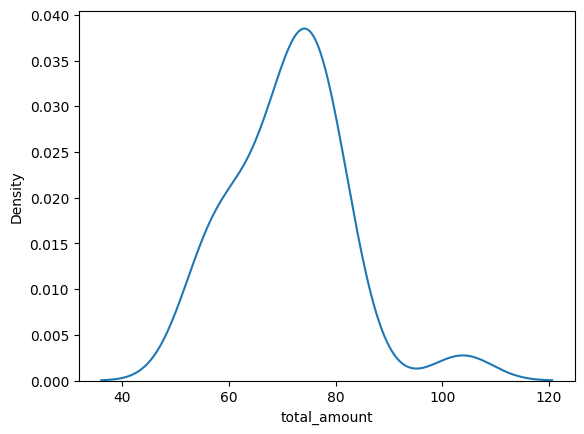

In [ ]:
# Look at the data distribution
sns.kdeplot(data=df_2_rush, x="total_amount")

In [ ]:
df_2_ovnight = df_hipot[(df_hipot['RatecodeID'] == 2) & (df_hipot['is_overnight'] == 1)]
df_2_ovnight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 46 to 44509
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   19 non-null     datetime64[ns]
 1   lpep_dropoff_datetime  19 non-null     datetime64[ns]
 2   RatecodeID             19 non-null     float64       
 3   passenger_count        19 non-null     float64       
 4   trip_distance          19 non-null     float64       
 5   fare_amount            19 non-null     float64       
 6   extra                  19 non-null     float64       
 7   mta_tax                19 non-null     float64       
 8   tip_amount             19 non-null     float64       
 9   tolls_amount           19 non-null     float64       
 10  improvement_surcharge  19 non-null     float64       
 11  total_amount           19 non-null     float64       
 12  payment_type           19 non-null     float64       
 13  tri

In [ ]:
df_2_ovnight['total_amount'].describe()

count    19.000000
mean     63.923684
std       8.126302
min      52.800000
25%      56.075000
50%      64.350000
75%      71.220000
max      74.190000
Name: total_amount, dtype: float64

<Axes: xlabel='total_amount', ylabel='Density'>

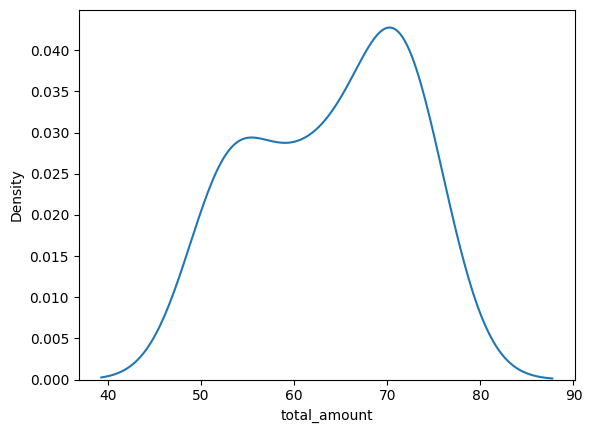

In [ ]:
# Look at the data distribution
sns.kdeplot(data=df_2_ovnight, x="total_amount")

#### Define Null & Alternate Hypothesis

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: The Average of fare_amount of RatecodeID 1 When In Overnight and In Rush Hour are equal
$$ H_0:\mu_A = \mu_B $$

$H_1$:  The Average of fare_amount of RatecodeID 1 When In Overnight and In Rush Hour are not equal
$$ H_1:\mu_A > \mu_B $$

Significance level = 0.05

In [ ]:
# inisialisasi nilai alpha
alpha = 0.05

#### Statistical Test

- Although we have large samples (both samples have more than 30 observations), we don't know about the population standard deviation ($\sigma$), so we use t-test instead of z-test
- Before conducting the two-sample t-test we need to find if the given data groups have the same variance.

In [ ]:
# Group A: Order RatecodeID 2 and Rush Hour
group_a = df_2_rush['total_amount'].values

# Group B: Order RatecodeID 2 and Over Night
group_b = df_2_ovnight['total_amount'].values

# variance
np.var(group_a), np.var(group_b)

(110.24740532544381, 62.56116011080334)

- Based on the result, we can see that the variance is not equal for both the samples. Afterward, we can calculate statistics test and p-value using spicy library.
- we have sample less than 30 from both samples. Because of that, we will use Welch’s t-test, in scipy stats.ttest_ind Welch’s t-test is automatic the flag equal_var is set to False.

reference: https://www.tutorialspoint.com/welch-rsquo-s-t-test-in-python

*   To calculate two sample mean t test, we can use stats.ttest_ind
1. import library
  - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
  - `a`: First data group
  - `b`: Second data group
  - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
  - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.
  - `alternative`:
    - ‘two-sided’: the means of the distributions underlying the samples are unequal.
    - ‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.
    - ‘greater’: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.
3.The function will be able to return 2 output, namely statistic test and p_value.

In [ ]:
# Statistical Test
# https://stackoverflow.com/questions/22611446/perform-2-sample-t-test
# stats.ttest_ind function performs Welch’s t-test when the flag equal_var is set to False.
from scipy import stats
result4 = stats.ttest_ind(a = group_a,
                         b = group_b,
                         equal_var=False,
                         alternative = "greater")

In [ ]:
# result p value
result4.pvalue

0.006289305308401676

In [ ]:
# result statistical test
result4.statistic

2.604869948466532

In [ ]:
# Decide
if result4.pvalue<0.05:
    print("Reject the null hypothesis | Two group means are different (Reject H0)")
else:
    print("Failed to reject the Null hypothesis | Two group means are equal")

Reject the null hypothesis | Two group means are different (Reject H0)


Degree of freedom from two-samples

In [ ]:
df_data = len(group_a)+len(group_b)-2
df_data

43

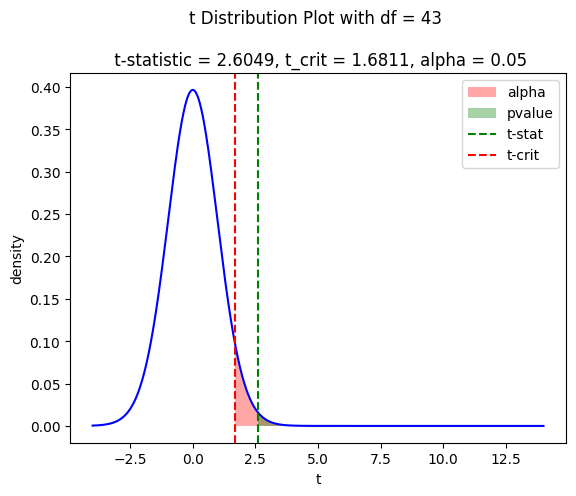

In [ ]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result4.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result4.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result4.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

There is enough evidence that the average of fare between Ratecode is 2 in Over Night and In Rush Hour is not equal

After that, we will compute confidence level for the difference in means



*   To calculate confidence interval for the difference in means, we can use CompareMeans
1. import library
  - from statsmodels.stats.weightstats import DescrStatsW,[CompareMeans](https://https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.tconfint_diff.html#statsmodels.stats.weightstats.CompareMeans.tconfint_diff)
2. Use function `CompareMeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')`

  `alpha` = significance level for the confidence interval

  `alternative` = It depends on the alternative hypothesis for the test
    - if $H_1$ is not equal to value, we use `two-sided`
    - if $H_1$ is larger than value, we use `larger`
    - if $H_1$ is smaller than value, we use `smaller`
  
  `usevar` = ‘pooled’ or ‘unequal’
  - `pooled` indicates that the standard deviation of the samples is assumed to be the same.
  - `unequal` shows that Welch ttest with Satterthwait degrees of freedom is used.
3. The function will return lower and upper limits of the confidence interval


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=group_b),
                  d2 = DescrStatsW(data=group_a))

lower, upper = cm.tconfint_diff(alpha=0.05,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -12.978213539199498 -1.651341116670924 ]


Based on the result, we can 95% confident that the average difference the average fare in RatecodeID 1 when in Over Night and in Rush Hour lies between \-$12.97 and -\$1.651


#### Conclusion
- As the p value < alpha(0.05), we reject $H_0$. Therefore, we can say that There is enough evidence the average of fare between Ratecode of 2 in Over Night and in Rush Hour is not equal
  - The average fare of Ratecode 2 in Rush Hour is higher

- We can be 95% confidence that the difference between average fare of RatecodeId = 2 in Over Night and In Rush Hour lies between -12.97 US dollar and -1.651 US dollar. Therefore, we can say that order Taxi using Ratecode = 2 in Rush Hour has higher average fare compared to in Over Night.